<h3 style="text-align: center;">
Emory University - Department of Economics
</h3>

<h4 style="text-align: center;">
Prof. Maria Arbatskaya, Ph.D.
</h4>

<h5 style="text-align: center;">
Student: Fareed Wajid Khan 

Date: December 11th, 2023
</h5>

### Table of contents

0. Packages and some specific settings
1. Access Keepa API
2. Amazon categories
3. Product history query
4. Variation query
5. Top sellers query

### 0. Packages and some specific settings

In [2]:
pip install aiohttp

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keepa

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install asyncio

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aiohttp
import tqdm
import keepa
import os
import asyncio

#plt.style.use('whitegrid') # Matplotlib style
plt.rcParams['figure.figsize'] = [6, 3] # Matplotlib figure size

# Set working directory (change to your own)
path = "/Users/fareedkhan/Documents/Thesis"
os.chdir(path)

### 1. Access Keepa API

In [8]:
# Read in Prof. Arbatskaya's API key
accesskey = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0' # enter real access key here
api = keepa.Keepa(accesskey)

### 2. Amazon Categories

In [7]:
categories = api.category_lookup(0) # api.category_lookup is a function defined by Keepa
for id in categories:
    print(id, categories[id]['name']) #37 root categories in total

133140011 Kindle Store
9013971011 Video Shorts
2350149011 Apps & Games
165796011 Baby Products
163856011 Digital Music
13727921011 Alexa Skills
165793011 Toys & Games
2972638011 Patio, Lawn & Garden
283155 Books
2617941011 Arts, Crafts & Sewing
229534 Software
3375251 Sports & Outdoors
2238192011 Gift Cards
468642 Video Games
11260432011 Handmade Products
7141123011 Clothing, Shoes & Jewelry
1064954 Office Products
16310101 Grocery & Gourmet Food
228013 Tools & Home Improvement
2625373011 Movies & TV
11091801 Musical Instruments
4991425011 Collectibles & Fine Art
2619525011 Appliances
2619533011 Pet Supplies
2335752011 Cell Phones & Accessories
16310091 Industrial & Scientific
10272111 Everything Else
5174 CDs & Vinyl
3760911 Beauty & Personal Care
1055398 Home & Kitchen
265523 Stores
172282 Electronics
15684181 Automotive
599858 Magazine Subscriptions
3760901 Health & Household
18145289011 Audible Books & Originals


In [9]:
import keepa
import pandas as pd

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the API
api = keepa.Keepa(access_key)

# Define the category ID for the best seller category
category_id = '3760901'  # Replace with actual category ID

# Query the best sellers in the category
best_sellers = api.best_sellers_query(category_id)

# The data structure of 'best_sellers' depends on Keepa's response format. 
# Assuming it returns a list of product information, you can directly convert it to a DataFrame.
# If the data structure is different, you might need to process it accordingly before creating the DataFrame.

df = pd.DataFrame(best_sellers)

In [2]:
import keepa
import pandas as pd

# Define the extract function to handle NumPy arrays (you will need to update this based on the actual structure of the Keepa API response)
def extract(product, data_key, info_key, var_name):
    # This function needs to be updated based on the actual data structure
    # For now, it assumes a simple list with alternating time and price values
    data_array = product[data_key][info_key]
    time_data = data_array[::2]  # Even indices: Time data
    value_data = data_array[1::2]  # Odd indices: Value data

    # Ensure both arrays are of the same length
    min_length = min(len(time_data), len(value_data))
    time_data = time_data[:min_length]
    value_data = value_data[:min_length]

    # Create a DataFrame
    df = pd.DataFrame({ 'time': time_data, var_name: value_data })
    return df

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Provided list of ASINs for the 50 top best sellers in Health and Household
asins_list = ["B07MHJFRBJ", "B002DYIZGM", "B07FKRBV8Y", "B079H53D2B", "B00C91Q86I",
    "B01DDMTX0Y", "B00DZR75G2", "B07QV942J6", "B098JJJ6SX", "B0798DVT68",
    "B09YKYG6W8", "B09YKYV9N9", "B07ND3WR64", "B002UXRXE6", "B0035LCFNQ",
    "B07QX36HYD", "B07QBXPT2F", "B09QV3XG8B", "B0CHWGV7GZ", "B00Y8MP4G6",
    "B0CB9NV7WJ", "B09F8NLMJ4", "B09R2H6LWC", "B081QWQFTX", "B00IL4HT06",
    "B07Y2FN64J", "B0B9ZYKL21", "B016OZN8U8", "B01IADXHZI", "B001F51QCK",
    "B00K6JUG4K", "B08XXDQY5M", "B071D4DKTZ", "B07ND5BB8V", "B00004YK1B",
    "B0B6GSQ61S", "B09NMJHY64", "B0BNLRJ2SQ", "B0B67Y8MB4", "B09NW92T8Q",
    "B09X1SHMRK", "B01IT9NLHW", "B00OBQZDXS", "B01MA6LPQR", "B07BVYZL88",
    "B07DY89QMT", "B07FF4WBV8", "B008KJEYLO", "B07TT8B1JJ", "B07HKR2QP9",
    "B09CY8G5HB", "B0B6ZXFRY7", "B0BQ2BSX1W", "B07P5K7DQP", "B01BZ0LXL8",
    "B0B24SV6BN", "B0BFM8TM19", "B0BDP6GN3W", "B0748J34WZ", "B00AHAWWO0",
    "B09N9WGLTC", "B0B4FFH4XW", "B00IRKRK9O", "B07ND3MW45", "B01NAPQ4QP",
    "B002R0DXQE", "B002CQU54Q", "B00MV8MWEQ", "B082TPDTM2", "B0C1PC29DX",
    "B0B68LPB96", "B00FQT4LX2", "B084HQ4DYQ", "B09KHK2FPF", "B010NE2XPC",
    "B07B8BSGPL", "B00R1CSN5E", "B013JZMG5Y", "B07QPRV62S", "B0C35XNRDF",
    "B0BJT5BLZ1", "B006ZBT0OA", "B00CC6XSRC", "B0C35921LF", "B09RTVD1GF",
    "B092VKZB89", "B07JMCS6TV", "B00WSWGVZQ", "B0CHRN4PYH", "B0C898BY2Y",
    "B09YKRZR22", "B074F297T8", "B01BUNHFQM", "B009108SGS", "B099HZG89P",
    "B01HI7WON8", "B01HI7WP0U", "B01HI7WP28", "B0BR9G2Y9H", "B06Y5ZG66K"]

# Initialize an empty DataFrame to store all product data
all_product_data = pd.DataFrame()

# Iterate over the best sellers ASINs and query each product
for asin in asins_list:
    try:
        products = api.query(asin, domain='US', history=True, rating=True)
        product = products[0]

        # Example: Extracting Amazon price data
        amazon_price_data = extract(product, 'data', 'AMAZON', 'Amazon Price')

        # Append this product's data to the DataFrame
        all_product_data = pd.concat([all_product_data, amazon_price_data], ignore_index=True)
    except Exception as e:
        print(f"Error processing ASIN {asin}: {e}")

# Save the combined data to a CSV file
all_product_data.to_csv('best_sellers_product_data.csv', index=False)


  0%|          | 0/1 [00:00<?, ?it/s]Waiting 45 seconds for additional tokens


Error processing ASIN B01BZ0LXL8: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3ce80>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B0B24SV6BN: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744a790>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B0BFM8TM19: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59310>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))




  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0BDP6GN3W: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f590a0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B0748J34WZ: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3cbe0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00AHAWWO0: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744a1f0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B09N9WGLTC: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744aee0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))





  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0B4FFH4XW: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364670>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00IRKRK9O: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744ac40>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B07ND3MW45: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1578b5310>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B01NAPQ4QP: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3cb50>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B002R0DXQE: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364d90>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))





  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B002CQU54Q: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768b850>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B00MV8MWEQ: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744a7f0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B082TPDTM2: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c340>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B0C1PC29DX: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364f70>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))






  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0B68LPB96: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1578b5430>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B00FQT4LX2: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f595e0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B084HQ4DYQ: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3cd00>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B09KHK2FPF: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744adc0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))





  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B010NE2XPC: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157634640>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B07B8BSGPL: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59dc0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00R1CSN5E: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364b20>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B013JZMG5Y: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c700>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B07QPRV62S: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744a460>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))






  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0C35XNRDF: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768b370>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B0BJT5BLZ1: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59c70>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B006ZBT0OA: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c130>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00CC6XSRC: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1573646d0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))




  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0C35921LF: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744ae20>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B09RTVD1GF: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768bb80>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B092VKZB89: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59df0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B07JMCS6TV: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364eb0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B00WSWGVZQ: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15744ac70>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))






  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B0CHRN4PYH: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768bc10>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B0C898BY2Y: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157364250>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B09YKRZR22: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c4f0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B074F297T8: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59ee0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))





  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B01BUNHFQM: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157634e20>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B009108SGS: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f59670>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B099HZG89P: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x15768b730>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B01HI7WON8: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c370>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B01HI7WP0U: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157634580>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))







  0%|          | 0/1 [00:00<?, ?it/s]


Error processing ASIN B01HI7WP28: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157634640>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


  0%|          | 0/1 [00:00<?, ?it/s]

Error processing ASIN B0BR9G2Y9H: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x156f595e0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


Error processing ASIN B06Y5ZG66K: HTTPSConnectionPool(host='api.keepa.com', port=443): Max retries exceeded with url: /token/?key=e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x157d3c4f0>: Failed to resolve 'api.keepa.com' ([Errno 8] nodename nor servname provided, or not known)"))


In [9]:
# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Provided list of ASINs for the 50 top best sellers in Health and Household
asins_list = ["B07MHJFRBJ", "B002DYIZGM", "B07FKRBV8Y", "B079H53D2B", "B00C91Q86I",
    "B01DDMTX0Y", "B00DZR75G2", "B07QV942J6", "B098JJJ6SX", "B0798DVT68",
    "B09YKYG6W8", "B09YKYV9N9", "B07ND3WR64", "B002UXRXE6", "B0035LCFNQ",
    "B07QX36HYD", "B07QBXPT2F", "B09QV3XG8B", "B0CHWGV7GZ", "B00Y8MP4G6",
    "B0CB9NV7WJ", "B09F8NLMJ4", "B09R2H6LWC", "B081QWQFTX", "B00IL4HT06",
    "B07Y2FN64J", "B0B9ZYKL21", "B016OZN8U8", "B01IADXHZI", "B001F51QCK",
    "B00K6JUG4K", "B08XXDQY5M", "B071D4DKTZ", "B07ND5BB8V", "B00004YK1B",
    "B0B6GSQ61S", "B09NMJHY64", "B0BNLRJ2SQ", "B0B67Y8MB4", "B09NW92T8Q",
    "B09X1SHMRK", "B01IT9NLHW", "B00OBQZDXS", "B01MA6LPQR", "B07BVYZL88",
    "B07DY89QMT", "B07FF4WBV8", "B008KJEYLO", "B07TT8B1JJ", "B07HKR2QP9",
    "B09CY8G5HB", "B0B6ZXFRY7", "B0BQ2BSX1W", "B07P5K7DQP", "B01BZ0LXL8",
    "B0B24SV6BN", "B0BFM8TM19", "B0BDP6GN3W", "B0748J34WZ", "B00AHAWWO0",
    "B09N9WGLTC", "B0B4FFH4XW", "B00IRKRK9O", "B07ND3MW45", "B01NAPQ4QP",
    "B002R0DXQE", "B002CQU54Q", "B00MV8MWEQ", "B082TPDTM2", "B0C1PC29DX",
    "B0B68LPB96", "B00FQT4LX2", "B084HQ4DYQ", "B09KHK2FPF", "B010NE2XPC",
    "B07B8BSGPL", "B00R1CSN5E", "B013JZMG5Y", "B07QPRV62S", "B0C35XNRDF",
    "B0BJT5BLZ1", "B006ZBT0OA", "B00CC6XSRC", "B0C35921LF", "B09RTVD1GF",
    "B092VKZB89", "B07JMCS6TV", "B00WSWGVZQ", "B0CHRN4PYH", "B0C898BY2Y",
    "B09YKRZR22", "B074F297T8", "B01BUNHFQM", "B009108SGS", "B099HZG89P",
    "B01HI7WON8", "B01HI7WP0U", "B01HI7WP28", "B0BR9G2Y9H", "B06Y5ZG66K"]
products = api.query(asins_list, domain='US', history=True, rating=True)
product = products[0]

def extract(product, data, info, var):
    "This function allows to extract the columns 'time' and 'value' that are stored in 'info', in turn stored in the dictionary 'data' of a specific product."
    "We rename the column  'value' as 'var'. Examples of value: Amazon rating, Amazon price, Amazon sales rank, etc."
    product[data][info]['time'] = product[data][info].index #Time is stored in the index, we create a column with this information
    name = f"product_{info}" #Name of the dataframe
    globals()[name] = pd.DataFrame(product[data][info]).reset_index(drop = True) #Create dataframe
    globals()[name] = globals()[name][['time', 'value']] #Keep only time and value columns
    globals()[name] = globals()[name].rename({'value': var}, axis = 1) #Rename value column as var
    return globals()[name] #Return dataframe

100%|██████████| 100/100 [01:07<00:00,  1.49it/s]

In [17]:
import keepa
import pandas as pd
import numpy as np

def extract(product, data_key, info_key, var_name):
    """
    Extracts time and value information from a product's data,
    which is assumed to be in the format of a NumPy array.
    The 'time' information is every even-indexed element,
    and the 'value' information is every odd-indexed element in the array.
    """
    data_array = product[data_key][info_key]

    # Extracting time and value data assuming they are alternating in the array
    time_data = data_array[::2]  # Even indices: Time data
    value_data = data_array[1::2]  # Odd indices: Value data

    # Ensure both arrays are of the same length
    min_length = min(len(time_data), len(value_data))
    time_data = time_data[:min_length]
    value_data = value_data[:min_length]

    # Create a DataFrame
    df = pd.DataFrame({ 'time': time_data, var_name: value_data })

    return df

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Define the category ID for "Health and Household"
health_household_category_id = '3760901'  # Replace with actual category ID

# Request best sellers data for "Health and Household"
best_sellers_asins = api.best_sellers_query(health_household_category_id)

# Initialize an empty DataFrame to store all product data
all_product_data = pd.DataFrame()

# Iterate over the best sellers ASINs and query each product
for asin in best_sellers_asins:
    products = api.query(asin, domain='US', history=True, rating=True)
    product = products[0]

    # Assuming you want to extract Amazon price data as an example
    amazon_price_data = extract(product, 'data', 'AMAZON', 'Amazon Price')

    # Append this product's data to the all_product_data DataFrame
    all_product_data = pd.concat([all_product_data, amazon_price_data], ignore_index=True)

# Save the combined data to a CSV file
all_product_data.to_csv('health_household_product_data.csv', index=False)

100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import keepa
import pandas as pd

# Your Keepa access key
access_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'

# Initialize the Keepa API
api = keepa.Keepa(access_key)

# Define the extract function
def extract(product, data, info, var):
    # Function description here
    product[data][info]['time'] = product[data][info].index
    name = f"product_{info}"
    globals()[name] = pd.DataFrame(product[data][info]).reset_index(drop=True)
    globals()[name] = globals()[name][['time', 'value']]
    globals()[name] = globals()[name].rename({'value': var}, axis=1)
    return globals()[name]
# Define the category ID for "Health and Household"
health_household_category_id = '3760901'  # Replace with actual category ID

# Request best sellers data for "Health and Household"
best_sellers_asins = api.best_sellers_query(health_household_category_id)

# Initialize an empty DataFrame to store all product data
all_product_data = pd.DataFrame()

# Iterate over the best sellers ASINs and query each product
for asin in best_sellers_asins:
    products = api.query(asin, domain='US', history=True, rating=True)
    product = products[0]

    # Assuming you want to extract Amazon price data as an example
    amazon_price_data = extract(product, 'data', 'AMAZON', 'Amazon Price')

    # Append this product's data to the all_product_data DataFrame
    all_product_data = pd.concat([all_product_data, amazon_price_data], ignore_index=True)

# Save the combined data to a CSV file
all_product_data.to_csv('health_household_product_data.csv', index=False)


In [ ]:
print(df)

### 3. Product History Query

In [11]:
# Access example product data (e.g., Apple EarPods Headphones with Lightning Connector)
products = api.query('B01M0GB8CC', domain = 'US', history = True,
                     rating = True) #List of products, even with one single request
product = products[0] #Access first product information

# Available variables
print(products[0].keys())

# Information of interest is stored in the 'data' key
print(product['data'].keys())






  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

dict_keys(['csv', 'categories', 'imagesCSV', 'manufacturer', 'title', 'lastUpdate', 'lastPriceChange', 'rootCategory', 'productType', 'parentAsin', 'variationCSV', 'asin', 'domainId', 'type', 'hasReviews', 'trackingSince', 'brand', 'productGroup', 'partNumber', 'model', 'color', 'size', 'edition', 'format', 'packageHeight', 'packageLength', 'packageWidth', 'packageWeight', 'packageQuantity', 'isAdultProduct', 'isEligibleForTradeIn', 'isEligibleForSuperSaverShipping', 'offers', 'buyBoxSellerIdHistory', 'isRedirectASIN', 'isSNS', 'author', 'binding', 'numberOfItems', 'numberOfPages', 'publicationDate', 'releaseDate', 'languages', 'lastRatingUpdate', 'ebayListingIds', 'lastEbayUpdate', 'eanList', 'upcList', 'liveOffersOrder', 'frequentlyBoughtTogether', 'features', 'description', 'promotions', 'newPriceIsMAP', 'coupon', 'availabilityAmazon', 'listedSince', 'fbaFees', 'variations', 'itemHeight', 'itemLength', 'itemWidth', 'itemWeight', 'salesRankReference', 'salesRanks', 'salesRankReferenc

##### Accessing product information

In [12]:
# --- Auxiliary function 'extract'
def extract(product, data, info, var):
    "This function allows to extract the columns 'time' and 'value' that are stored in 'info', in turn stored in the dictionary 'data' of a specific product."
    "We rename the column  'value' as 'var'. Examples of value: Amazon rating, Amazon price, Amazon sales rank, etc."
    product[data][info]['time'] = product[data][info].index #Time is stored in the index, we create a column with this information
    name = f"product_{info}" #Name of the dataframe
    globals()[name] = pd.DataFrame(product[data][info]).reset_index(drop = True) #Create dataframe
    globals()[name] = globals()[name][['time', 'value']] #Keep only time and value columns
    globals()[name] = globals()[name].rename({'value': var}, axis = 1) #Rename value column as var
    return globals()[name] #Return dataframe

                 time  Amazon Price
0 2016-05-30 12:56:00         21.30
1 2016-06-01 00:00:00           NaN
2 2016-08-28 06:06:00         23.99
3 2016-09-03 22:48:00         22.77
4 2016-09-04 02:48:00           NaN
5 2016-09-04 03:48:00         22.77
6 2016-09-04 22:48:00         22.90
7 2016-09-05 23:48:00         22.66
8 2016-09-06 22:48:00           NaN
9 2016-09-07 19:48:00         22.66


100%|██████████| 1/1 [01:41<00:00, 101.32s/it]


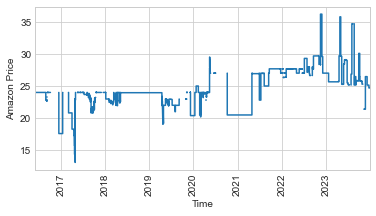

In [14]:
# --- Amazon price history
amazon_price = extract(product, 'data', 'df_AMAZON', 'Amazon Price')
print(amazon_price.head(10))

amazon_price['time'] = pd.to_datetime(amazon_price['time'])

# Remove non-numeric characters from 'Amazon Price' and convert to float
amazon_price['Amazon Price'] = amazon_price['Amazon Price'].replace('[\$,]', '', regex=True).astype(float)

time_data = amazon_price['time'].values
price_data = amazon_price['Amazon Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting x-axis limits to cover the full range of time data
ax.set_xlim(time_data.min(), time_data.max())

# Setting labels and rotating date labels for clarity
ax.set(xlabel='Time', ylabel='Amazon Price')
plt.xticks(rotation='vertical')

plt.show()

                 time  Marketplace Price
0 2016-05-30 12:56:00                NaN
1 2017-09-17 19:32:00              21.76
2 2017-09-17 20:48:00                NaN
3 2017-10-08 19:20:00              22.53
4 2017-10-08 21:46:00                NaN
5 2018-03-25 01:20:00              23.31
6 2018-03-25 02:08:00                NaN
7 2018-04-05 01:56:00              22.32
8 2018-04-05 02:48:00                NaN
9 2018-04-05 05:18:00              22.32


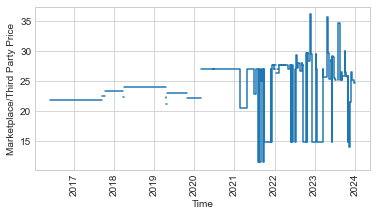

In [15]:
# --- Marketplace/3rd party new price history
marketplace_price = extract(product, 'data', 'df_NEW', 'Marketplace Price')
print(marketplace_price.head(10))

marketplace_price['Marketplace Price'] = marketplace_price['Marketplace Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'time' and 'Marketplace Price' to numpy arrays for plotting
time_data = marketplace_price['time'].values
price_data = marketplace_price['Marketplace Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting axes labels and rotating the x-axis labels for better readability
ax.set(xlabel='Time', ylabel='Marketplace/Third Party Price')
plt.xticks(rotation='vertical')

plt.show()


                 time  List Price
0 2016-08-16 03:36:00       24.99
1 2016-08-25 11:50:00       23.99
2 2019-05-07 08:38:00       22.00
3 2019-05-16 10:44:00       22.99
4 2019-06-02 20:34:00       22.84
5 2019-06-04 20:12:00       22.69
6 2019-06-07 21:24:00       22.63
7 2019-06-08 20:44:00       22.49
8 2019-06-10 07:46:00       22.50
9 2019-06-28 00:00:00       23.99


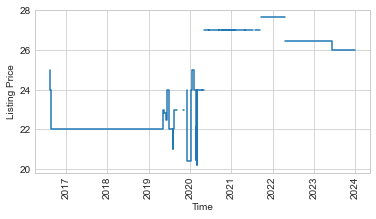

In [16]:
# --- List price history

list_price = extract(product, 'data', 'df_LISTPRICE', 'List Price')
print(list_price.head(10))
list_price['List Price'] = list_price['List Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'time' and 'List Price' to numpy arrays for plotting
time_data = list_price['time'].values
listprice_data = list_price['List Price'].values

fig, ax = plt.subplots()
plt.step(time_data, listprice_data)
ax.set(xlabel='Time', ylabel='Listing Price')
plt.xticks(rotation='vertical')

plt.show()

### 4. Variation Query

In [21]:
#Identify the ASINs of the variations of the Apple EarPods Headphones with Lightning Connector
print(product['variations'])
asins = [variation['asin'] for variation in product['variations']] #Variations are stored in a list of dictionaries called 'variations'
asins = np.asarray(asins) #Convert list to numpy array
print(asins)

[{'asin': 'B07ND3MW45', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '1950 sheet (Pack of 4)'}]}]
['B07ND3MW45']


In [22]:
# Query info on variations
list_products = api.query(asins, domain = 'US', history = True, rating = True) #api.query is a function defined by Keepa


100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

In [23]:
# Obtain data for each variation
for index, product in enumerate(list_products, start = 1):
    info_name = f"product{index}"
    globals()[info_name] = product

In [24]:
# Auxiliary function to extract the data of all the identified variations
def capture(product, data):
    values = {} #Create empty dictionary
    values['amazon_price'] = extract(product, 'data', 'df_AMAZON', 'Amazon Price') #Extract Amazon price
    values['marketplace_price'] = extract(product, 'data', 'df_NEW', 'Marketplace Price') #Extract Marketplace price
    values['list_price'] = extract(product, 'data', 'df_LISTPRICE', 'List Price') #Extract List price
    values['sales_rank'] = extract(product, 'data', 'df_SALES', 'Sales Rank') #Extract Sales rank
    values['rating'] = extract(product, 'data', 'df_RATING', 'Rating') #Extract Rating
    values['review_count'] = extract(product, 'data', 'df_COUNT_REVIEWS', 'Review Count') #Extract Review count
    return values

### 5. Top Sellers Query

In [27]:
# Query 'Health & Household' category
hh_bestsellers = api.best_sellers_query('3760901', domain = 'US')
len(hh_bestsellers) #The query gets the top 500,000 selling products in the category

500000

In [28]:
# Print top 10 bestsellers of HH as of 2023-12-12
for bestseller in hh_bestsellers[:10]:
    print(bestseller)

B079VP6DH5
B0CSSRN84Q
B07VMV19NL
B07ND3MW45
B0B1L72C36
B071D4DKTZ
B093X6VFN5
B0015R3AH2
B00C91Q86I
B079H53D2B


In [29]:
# Use the ASINs to query the top 10 bestsellers
hh_asins = hh_bestsellers[:10]
list_products = api.query(hh_asins, domain = 'US', history = True, rating = True)

100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

In [30]:
# Names of the top 10 bestsellers
for index, product in enumerate(list_products, start=1):
    print(f"Product {index}: ASIN - {product['asin']}, Name - {product['title']}")


Product 1: ASIN - B0015R3AH2, Name - Optimum Nutrition Gold Standard 100% Whey Protein Powder, Banana Cream, 2 Pound (Packaging May Vary)
Product 2: ASIN - B00C91Q86I, Name - Affresh Washing Machine Cleaner, 6 Month Supply, Cleans Front Load and Top Load Washers, Including HE
Product 3: ASIN - B071D4DKTZ, Name - LiCB CR2032 3V Lithium Battery(10-Pack)
Product 4: ASIN - B079H53D2B, Name - Physician's Choice Probiotics 60 Billion CFU - 10 Strains + Organic Prebiotics - Immune, Digestive & Gut Health - for Women & Men - 30ct
Product 5: ASIN - B079VP6DH5, Name - Bounty Quick-Size Paper Towels, White, 16 Family Rolls = 40 Regular Rolls
Product 6: ASIN - B07ND3MW45, Name - Cottonelle Ultra Comfort Toilet Paper with Cushiony CleaningRipples Texture, 24 Family Mega Rolls (24 Family Mega Rolls = 108 Regular Rolls) (4 Packs of 6), 325 Sheets per Roll, Packaging May Vary
Product 7: ASIN - B07VMV19NL, Name - Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liqu

### 6. Individual Price and Sales Rank Variant Comparison

In [31]:
# Access example product data (e.g., Apple EarPods Headphones with Lightning Connector)
products2 = api.query('B00OBQZDXS', domain = 'US', history = True,
                     rating = True) #List of products, even with one single request
product2 = products2[0] #Access first product information

# Available variables
print(products2[0].keys())

# Information of interest is stored in the 'data' key
print(product2['data'].keys())


100%|██████████| 1/1 [00:02<00:00,  2.21s/it]

dict_keys(['csv', 'categories', 'imagesCSV', 'manufacturer', 'title', 'lastUpdate', 'lastPriceChange', 'rootCategory', 'productType', 'parentAsin', 'variationCSV', 'asin', 'domainId', 'type', 'hasReviews', 'trackingSince', 'brand', 'productGroup', 'partNumber', 'model', 'color', 'size', 'edition', 'format', 'packageHeight', 'packageLength', 'packageWidth', 'packageWeight', 'packageQuantity', 'isAdultProduct', 'isEligibleForTradeIn', 'isEligibleForSuperSaverShipping', 'offers', 'buyBoxSellerIdHistory', 'isRedirectASIN', 'isSNS', 'author', 'binding', 'numberOfItems', 'numberOfPages', 'publicationDate', 'releaseDate', 'languages', 'lastRatingUpdate', 'ebayListingIds', 'lastEbayUpdate', 'eanList', 'upcList', 'liveOffersOrder', 'frequentlyBoughtTogether', 'features', 'description', 'promotions', 'newPriceIsMAP', 'coupon', 'availabilityAmazon', 'listedSince', 'fbaFees', 'variations', 'itemHeight', 'itemLength', 'itemWidth', 'itemWeight', 'salesRankReference', 'salesRanks', 'salesRankReferenc

In [32]:
# --- Auxiliary function 'extract'
def extract(product2, data, info, var):
    "This function allows to extract the columns 'time' and 'value' that are stored in 'info', in turn stored in the dictionary 'data' of a specific product."
    "We rename the column  'value' as 'var'. Examples of value: Amazon rating, Amazon price, Amazon sales rank, etc."
    product2[data][info]['time'] = product2[data][info].index #Time is stored in the index, we create a column with this information
    name = f"product2_{info}" #Name of the dataframe
    globals()[name] = pd.DataFrame(product2[data][info]).reset_index(drop = True) #Create dataframe
    globals()[name] = globals()[name][['time', 'value']] #Keep only time and value columns
    globals()[name] = globals()[name].rename({'value': var}, axis = 1) #Rename value column as var
    return globals()[name] #Return dataframe

100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


100%|██████████| 10/10 [00:15<00:00,  1.52s/it]

                 time  Amazon Price
0 2024-01-19 16:24:00           NaN
2024-01-19T16:24:00.000000000 2024-01-19T16:24:00.000000000


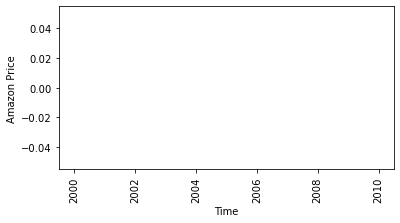

In [33]:
# --- Amazon price history
amazon_price = extract(product, 'data', 'df_AMAZON', 'Amazon Price')
print(amazon_price.head(10))

amazon_price['time'] = pd.to_datetime(amazon_price['time'])

# Remove non-numeric characters from 'Amazon Price' and convert to float
amazon_price['Amazon Price'] = amazon_price['Amazon Price'].replace('[\$,]', '', regex=True).astype(float)

time_data = amazon_price['time'].values
price_data = amazon_price['Amazon Price'].values

fig, ax = plt.subplots()

# Plotting the data
plt.step(time_data, price_data)

# Setting x-axis limits to cover the full range of time data
print(time_data.min(), time_data.max())
# Setting labels and rotating date labels for clarity
ax.set(xlabel='Time', ylabel='Amazon Price')
plt.xticks(rotation='vertical')

plt.show()

100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


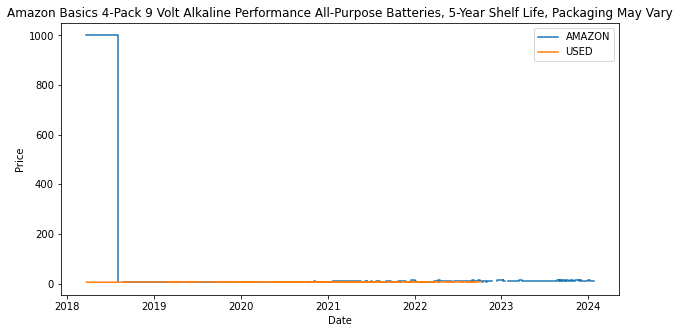

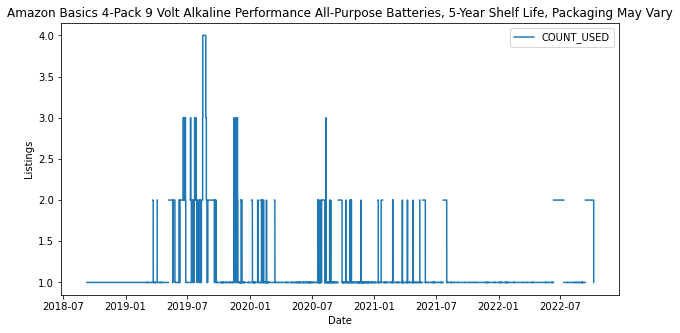

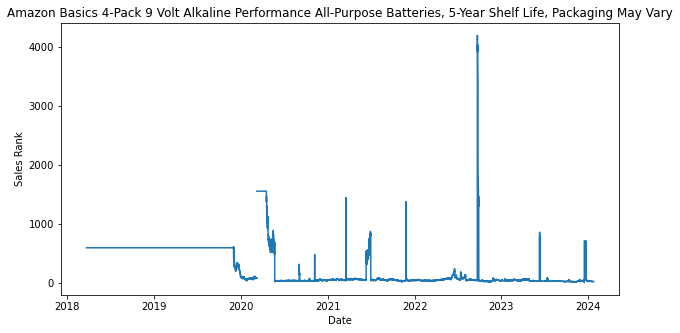

<Figure size 432x216 with 0 Axes>

In [34]:
api = keepa.Keepa(accesskey)

# Single ASIN query
asins = np.asarray(['B0774D64LT'])
products = api.query(asins)


# Plot result (requires matplotlib)
keepa.plot_product(products[0])

100%|██████████| 11/11 [00:03<00:00,  3.52it/s]


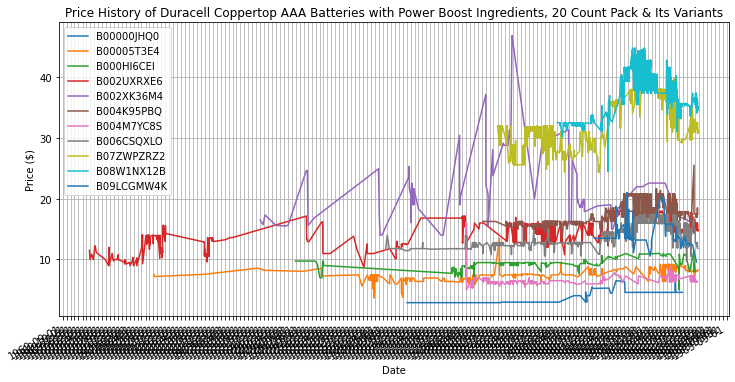

In [42]:
asins = ['B002UXRXE6', 'B000HI6CEI', 'B09LCGMW4K', 'B006CSQXLO', 
                      'B00000JHQ0', 'B002UXRXE6', 'B004K95PBQ', 'B07ZWPZRZ2', 
                      'B08W1NX12B', 'B004M7YC8S', 'B00005T3E4', 'B002XK36M4']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        if timestamps and prices:
            # Convert Keepa timestamps to datetime objects for plotting
            dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

            # Plot each product's Amazon price history
            plt.plot(dates, prices, label=product['asin'])


# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of Duracell Coppertop AAA Batteries with Power Boost Ingredients, 20 Count Pack & Its Variants')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


100%|██████████| 11/11 [00:03<00:00,  3.36it/s]


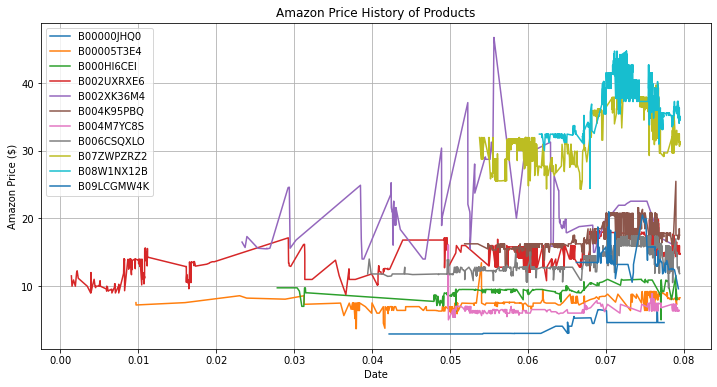

In [41]:
import matplotlib.dates as mdates
from datetime import datetime
asins = ['B002UXRXE6', 'B000HI6CEI', 'B09LCGMW4K', 'B006CSQXLO', 
         'B00000JHQ0', 'B002UXRXE6', 'B004K95PBQ', 'B07ZWPZRZ2', 
         'B08W1NX12B', 'B004M7YC8S', 'B00005T3E4', 'B002XK36M4']

# Query Keepa for the products
products = api.query(asins)

# Plotting
plt.figure(figsize=(12, 6))

for product in products:
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            if price != -1:
                # Convert timestamp from Unix time to datetime
                date = datetime.utcfromtimestamp(timestamp // 1000)
                timestamps.append(date)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert datetime objects to matplotlib date format
        dates = mdates.date2num(timestamps)

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])
        
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

100%|██████████| 2/2 [00:02<00:00,  1.00s/it]


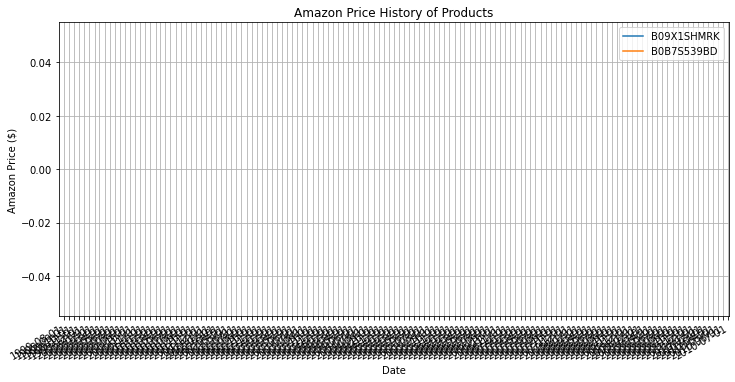

In [40]:
import matplotlib.dates as mdates
from datetime import datetime
asins = ['B0B7S539BD','B09X1SHMRK']

# Query Keepa for the products
products = api.query(asins)

# Plotting
plt.figure(figsize=(12, 6))

for product in products:
    # Check if CSV data is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        # Initialize lists for timestamps and prices
        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])


# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format date labels

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


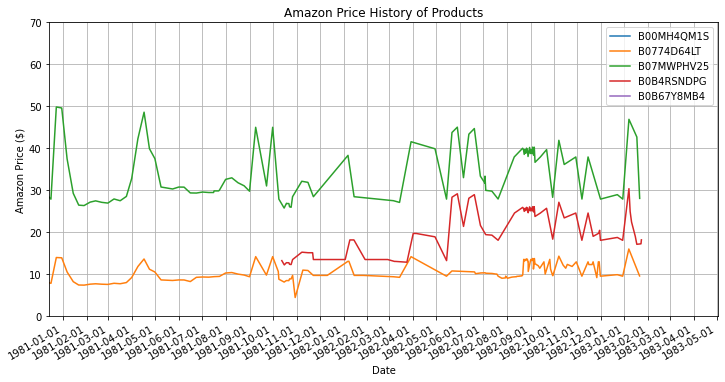

In [37]:
asins = ['B00MH4QM1S','B0B67Y8MB4','B0774D64LT','B0B4RSNDPG','B07MWPHV25']

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if CSV data is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

       
        # Initialize lists for timestamps and prices
        timestamps = []
        prices = []

        # Process the CSV data as alternating timestamps and prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format date labels
plt.xlabel('Date')
plt.ylabel('Amazon Price ($)')
plt.title('Amazon Price History of Products')
plt.legend()
plt.grid(True)

plt.xlim(xmin=4000)
plt.ylim(ymin=0, ymax=70)
# Display the plot
plt.show()

100%|██████████| 5/5 [00:01<00:00,  3.74it/s]


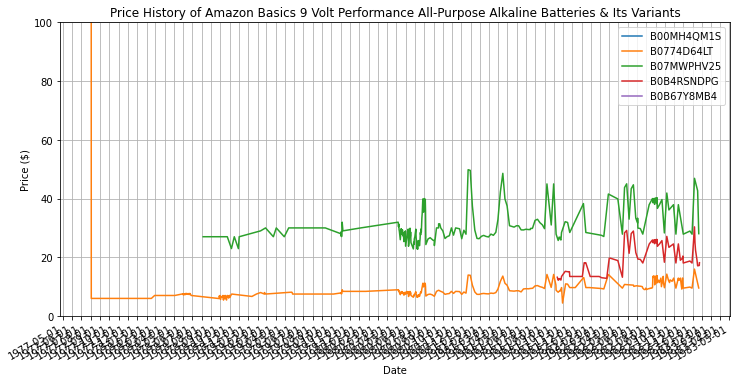

In [38]:
import keepa
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ASINs for the products
asins = ['B00MH4QM1S','B0B67Y8MB4','B0774D64LT','B0B4RSNDPG','B07MWPHV25']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if price history (Amazon price) is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        # Iterate over the csv_data list, treating even indices as timestamps and odd indices as prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps (minutes since epoch) to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of Amazon Basics 9 Volt Performance All-Purpose Alkaline Batteries & Its Variants')
plt.legend()
plt.grid(True)
plt.gca().set_ylim(bottom=0, top=100)

# Display the plot
plt.show()

100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


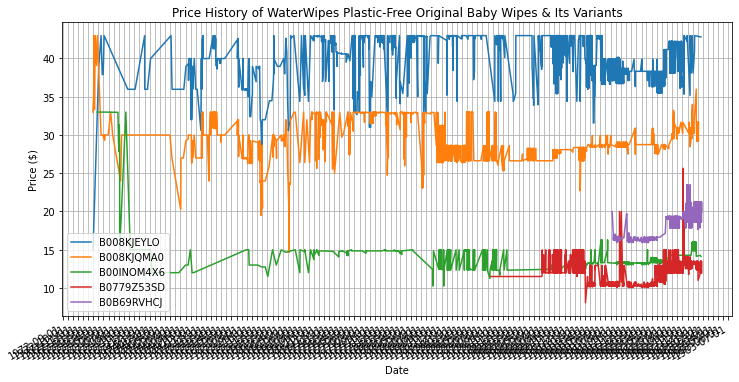

In [39]:
# ASINs for the products
asins = ['B0779Z53SD','B00INOM4X6','B0B69RVHCJ','B008KJQMA0','B008KJEYLO']  # Replace with actual ASINs

# Query Keepa for the products
products = api.query(asins)

# Plotting setup
plt.figure(figsize=(12, 6))

for product in products:
    # Check if price history (Amazon price) is available
    if 'csv' in product and product['csv'][0]:
        csv_data = product['csv'][0]

        timestamps = []
        prices = []

        # Iterate over the csv_data list, treating even indices as timestamps and odd indices as prices
        for i in range(0, len(csv_data), 2):
            timestamp = csv_data[i]   # Timestamp
            price = csv_data[i + 1]   # Price

            # Keep only valid prices and corresponding timestamps
            if price != -1:
                timestamps.append(timestamp)
                prices.append(price / 100.0)  # Convert price from cent to dollar

        # Convert Keepa timestamps (minutes since epoch) to datetime objects for plotting
        dates = [datetime.fromtimestamp(t * 60) for t in timestamps]

        # Plot each product's Amazon price history
        plt.plot(dates, prices, label=product['asin'])

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Price History of WaterWipes Plastic-Free Original Baby Wipes & Its Variants')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

count the number of variation asin
predict the sales rank 

In [111]:
original_data = pd.read_csv("Keepa BestSellers Jan 18.csv")
modified_data = original_data.drop(['Locale', 'Image'], axis =1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def parse_sales_rank(row):
    if isinstance(row, str):
        parts = row.split('|')
        absolute_rank = parts[0].strip()
        top_1_percent = parts[1].strip()

        category_part = parts[-1].strip()
        category = category_part.split(';')[0].strip()

        return pd.Series([absolute_rank, top_1_percent, category])
    else:
        return pd.Series([None,None,None])


new_columns = original_data['Sales Rank: Subcategory Sales Ranks'].apply(parse_sales_rank)
new_columns.columns = ['Absolute Rank', 'Top 1 Percent', 'Category']
modified_data = pd.concat([modified_data, new_columns], axis=1)


#modified_data[['Absolute Rank', 'Top 1 Percent', 'Category']] = original_data['Sales Rank: Subcategory Sales Ranks'].apply(parse_sales_rank)
modified_data = modified_data.drop(['Sales Rank: Subcategory Sales Ranks'], axis =1)
modified_data = modified_data.drop(['Sales Rank: Reference'], axis =1)
modified_data['Absolute Rank'] = modified_data['Absolute Rank'].str.strip('# ')
modified_data['Absolute Rank'] = pd.to_numeric(modified_data['Absolute Rank'],errors='coerce')
modified_data = modified_data.drop(['Top 1 Percent'], axis =1)
modified_data['Variation ASINs'] = modified_data['Variation ASINs'].fillna("")
modified_data['Count'] = modified_data['Variation ASINs'].apply(lambda x: len(x.split(',')))
modified_data.head()


100%|██████████| 1/1 [30:37<00:00, 1837.73s/it]


,Title,Sales Rank: Current,Sales Rank: 90 days avg.,Sales Rank: Drops last 90 days,Bought in past month,Reviews: Rating,Reviews: Review Count,Ratings - Format Specific,Review Count - Format Specific,Last Price Change,Buy Box 🚚: Current,Buy Box 🚚: 90 days avg.,Buy Box 🚚: Stock,Buy Box 🚚: 90 days OOS,Buy Box Seller,Buy Box: Is FBA,Buy Box: Unqualified,Amazon: Current,Amazon: 90 days avg.,Amazon: 90 days OOS,New: Current,New: 90 days avg.,New: 90 days OOS,"New, 3rd Party FBA: Current","New, 3rd Party FBA: 90 days avg.",FBA Pick&Pack Fee,Referral Fee %,Referral Fee based on current Buy Box price,"New, 3rd Party FBM 🚚: Current","New, 3rd Party FBM 🚚: 90 days avg.","New, Prime exclusive: Current","New, Prime exclusive: 90 days avg.",Lightning Deals: Current,Lightning Deals: Upcoming Deal,Buy Box Used 🚚: Current,Buy Box Used 🚚: 90 days avg.,Buy Box Used Seller,Buy Box Used: Is FBA,Buy Box Used: Condition,Used: Current,Used: 90 days avg.,Used: 90 days OOS,"Used, like new 🚚: Current","Used, like new 🚚: 90 days avg.","Used, very good 🚚: Current","Used, very good 🚚: 90 days avg.","Used, good 🚚: Current","Used, good 🚚: 90 days avg.","Used, acceptable 🚚: Current","Used, acceptable 🚚: 90 days avg.",Warehouse Deals: Current,Warehouse Deals: 90 days avg.,List Price: Current,List Price: 90 days avg.,Rental: Current,Rental: 90 days avg.,eBay New 🚚: Current,eBay New 🚚: 90 days avg.,eBay Used 🚚: Current,eBay Used 🚚: 90 days avg.,New Offer Count: Current,New Offer Count: 90 days avg.,"Count of retrieved live offers: New, FBA","Count of retrieved live offers: New, FBM",Used Offer Count: Current,Used Offer Count: 90 days avg.,Tracking since,Listed since,Categories: Root,Categories: Sub,Categories: Tree,Categories: Launchpad,ASIN,Product Codes: EAN,Product Codes: UPC,Product Codes: PartNumber,Parent ASIN,Variation ASINs,Freq. Bought Together,Type,Manufacturer,Brand,Product Group,Model,Variation Attributes,Color,Size,Edition,Format,Author,Contributors,Binding,Number of Items,Number of Pages,Publication Date,Release Date,Languages,Package: Dimension (cm³),Package: Weight (g),Package: Quantity,Item: Dimension (cm³),Item: Weight (g),Hazardous Materials,Adult Product,Trade-In Eligible,Prime Eligible (Buy Box),Subscribe and Save,One Time Coupon: Absolute,One Time Coupon: Percentage,Subscribe and Save Coupon: Percentage,Absolute Rank,Category,Count
0,"Bounty Quick-Size Paper Towels, White, 16 Fami...",2,5.0,121.0,100000.0,4.8,195453.0,85475.0,3418.0,2024/01/18 16:26,$ 43.49,$ 43.49,1000.0,0 %,Amazon,yes,no,$ 43.49,$ 43.49,0 %,$ 43.49,$ 43.48,0 %,NaN,$ 43.00,$ 29.89,12.74 %,$ 5.54,$ 64.35,$ 50.41,NaN,NaN,NaN,no,NaN,$ 41.47,NaN,no,NaN,$ 41.29,$ 41.17,0 %,$ 42.58,$ 42.18,$ 41.29,$ 41.18,NaN,$ 40.01,NaN,$ 33.78,$ 41.29,$ 41.16,NaN,$ 43.49,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17,1.0,15.0,6.0,4.0,2018/03/07,2018/04/02,Health & Household,Paper Towels,Health & Household › Household Supplies › Pape...,no,B079VP6DH5,NaN,NaN,1299292831,B0CS643755,"B07MHJFRBJ,B079VP6DH5","B079VP6DH6, B0798C1NYR",PAPER_TOWEL,Procter & Gamble (P&G-2),Bounty,Drugstore,1299292831,Color: White; Size: 16 Count (Pack of 1);,White,16 Count (Pack of 1),NaN,NaN,NaN,NaN,Office Product,16.0,NaN,2018-04-03,2018-04-03,NaN,110414.0,3878.0,1.0,106950.0,NaN,NaN,no,no,yes,yes,-,-,5 %,1.0,Paper Towels,2
1,Liquid I.V. Hydration Multiplier - Passion Fru...,3,124732.0,85.0,50.0,4.6,166350.0,0.0,0.0,2024/01/18 10:24,NaN,$ 19.98,NaN,64 %,NaN,no,yes,NaN,NaN,100 %,$ 23.99,$ 23.43,0 %,$ 28.99,$ 23.89,$ 4.24,14.99 %,-,$ 27.49,$ 28.66,NaN,NaN,NaN,no,NaN,NaN,NaN,no,NaN,NaN,NaN,100 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$ 28.99,$ 24.54,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3,1.0,3.0,NaN,NaN,2023/03/19,2023/03/07,Health & Household,Electrolyte Replacements,Health & Household › Diet & Sports Nutrition ›...,no,B0BXSFZ8FX,0850021474966,850021474966,LVM-1506,B0CKXZLX6Q,"B0B1LLKZ8S,B08MVF7XFZ,B08MV97LPH,B0BQ4J2879,B0...",NaN,NUTRITIONAL_SUPPLEMENT,The Liv Group Inc.,Liquid I.V.,Grocery,NaN,FlavorName: Passion Fruit; Size: 15 Servings (.

In [63]:
import requests
import json

# Keepa API endpoint and key
api_url = "https://keepaapi.readthedocs.io/en/latest/api_methods.html"
domain_id = 1
api_key = "e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0"  # Replace with your actual Keepa API key

# Query Parameters
category_id = 3760901  # Replace with the category ID you're interested in
query_json = {
    "rootCategory": category_id,
    "perPage": 100,
    "page": 0
}

# Prepare request
params = {
    "key": api_key,
    "domain": 1,  # Domain ID for Amazon.com, change as needed
    "selection": json.dumps(query_json)
}

# Send request
response = requests.post(f"{api_url}?domain={domain_id}&key={api_key}", json=query_json)

# Process response
if response.status_code == 200:
    data = response.json()
    asin_list = data.get('asinList', [])
    print("ASINs:", asin_list)
    # Now use these ASINs to fetch variant information for each product
else:
    print("Failed to retrieve data. Status code:", response.status_code)

Failed to retrieve data. Status code: 403


In [106]:
import keepa
api_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'  # Replace with your Keepa API key
category_id = 3760901  # Replace with your actual category ID

def fetch_asins_in_category(api_key, category_id):
    api = keepa.Keepa(api_key)
    
    # Define search parameters for the category
    # Use 'rootCategory' or 'categories_include' as per your requirement
    product_parms = {
        'rootCategory': category_id,  # Use 'categories_include': [category_id] if appropriate
        # Include other parameters as needed
    }

    # Query Keepa product database for ASINs in the category
    asins = api.product_finder(product_parms)
    return asins

def fetch_variant_titles(api_key, asins):
    api = keepa.Keepa(api_key)
    variant_titles = []

    for asin in asins:
        # Fetch product details
        product_data_list = api.query(asin)
        
        # Iterate over the list and extract titles
        for product_data in product_data_list:
            # The following line assumes each item in the list is a dictionary with a 'title' key
            # Adjust the key access as per the actual structure of product_data
            variant_titles = fetch_variant_titles(api_key, asins)
            print("Variant Titles:", variant_titles)
    return variant_titles
if not variant_titles:
    print("No variant titles extracted. Check the response structure and extraction logic.")

No variant titles extracted. Check the response structure and extraction logic.


In [107]:
import keepa

# Function to fetch ASINs from a given category
def fetch_asins_in_category(api_key, category_id):
    api = keepa.Keepa(api_key)
    product_parms = {
        'rootCategory': category_id  # Adjust the parameter key as per Keepa API requirements
    }
    asins = api.product_finder(product_parms)
    return asins

# Function to fetch variant titles for a list of ASINs
def fetch_variant_titles(api_key, asins):
    api = keepa.Keepa(api_key)
    variant_titles = []

    for asin in asins:
        product_data_list = api.query(asin)
        for product_data in product_data_list:
            variant_title = product_data.get('title', 'No Title')  # Default to 'No Title' if key not present
            variant_titles.append(variant_title)

    return variant_titles

# Main execution
api_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'  # Replace with your Keepa API key
category_id = 3760901  # Replace with your desired category ID

# Fetch ASINs from the specified category
asins = fetch_asins_in_category(api_key, category_id)
if not asins:
    print("No ASINs fetched. Check the category ID and API call.")
else:
    # Fetch variant titles for the fetched ASINs
    variant_titles = fetch_variant_titles(api_key, asins)
    if not variant_titles:
        print("No variant titles extracted. Check the response structure and extraction logic.")
    else:
        print("Variant Titles:", variant_titles)


100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:00<00:00,  1.22it/s]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:01<00:00,  1.26s/it]





  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:00<00:00,  1.24it/s]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.21s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:01<00:00,  1.22s/it]








  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:01<00:00,  1.25s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:02<00:00,  2.35s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:01<00:00,  1.06s/it]





100%|██████████| 1/1 [00:03<00:00,  3.16s/it]



100%|██████████| 1/1 [00:02<00:00,  2.04s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:01<00:00,  1.58s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:01<00:00,  1.98s/it]





  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:01<00:00,  1.91s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

Variant Titles: ['Amazon Basics 100-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life', 'Amazon Basics 36-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life', 'Bounty Quick-Size Paper Towels, White, 16 Family Rolls = 40 Regular Rolls', 'Earth Breeze - Liquid-less Laundry Detergent Sheets - No Plastic Jug, Liquidless Technology', 'Bounty Quick Size Paper Towels, White, 8 Family Rolls = 20 Regular Rolls', "Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liquid Vitamins for Adults & Kids | Mens Womens Multivitamin | Energy, Beauty Booster | 32 Fl Oz (3 Pack)", "Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liquid Vitamins for Adults & Kids | Mens, Womens Multivitamin | Energy & Beauty Booster | Non-GMO | 32 Fl Oz", "Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liquid Vitamins for Adults & Kids | Mens, Womens Multivitamin | En

In [109]:
import keepa

# Function to fetch ASINs from a given category
def fetch_asins_in_category(api_key, category_id):
    api = keepa.Keepa(api_key)
    product_parms = {
        'rootCategory': category_id  # Adjust the parameter key as per Keepa API requirements
    }
    asins = api.product_finder(product_parms)
    return asins

# Function to fetch variant titles and group by parent ASIN
def fetch_variant_titles_grouped(api_key, asins):
    api = keepa.Keepa(api_key)
    variants_by_parent_asin = {}

    for asin in asins:
        product_data_list = api.query(asin)
        for product_data in product_data_list:
            parent_asin = product_data.get('parentASIN')  # Replace 'parentASIN' with the correct key if different
            variant_title = product_data.get('title', 'No Title')

            if parent_asin:
                if parent_asin not in variants_by_parent_asin:
                    variants_by_parent_asin[parent_asin] = []
                variants_by_parent_asin[parent_asin].append(variant_title)
            else:
                # If no parent ASIN, treat it as its own group
                variants_by_parent_asin[asin] = [variant_title]

    return variants_by_parent_asin

# Main execution
api_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'  # Replace with your Keepa API key
category_id = 3760901  # Replace with your desired category ID

# Fetch ASINs from the specified category
asins = fetch_asins_in_category(api_key, category_id)
if not asins:
    print("No ASINs fetched. Check the category ID and API call.")
else:
    # Fetch variant titles grouped by parent ASIN
    variants_grouped = fetch_variant_titles_grouped(api_key, asins)
    if not variants_grouped:
        print("No variant titles extracted. Check the response structure and extraction logic.")
    else:
        for parent_asin, titles in variants_grouped.items():
            print(f"Parent ASIN: {parent_asin}")
            for title in titles:
                print(f"   Variant Title: {title}")










100%|██████████| 1/1 [1:06:44<00:00, 4004.51s/it]









100%|██████████| 1/1 [00:01<00:00,  1.28s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:01<00:00,  1.73s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:01<00:00,  1.91s/it]





  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:01<00:00,  1.26s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:06<00:00,  6.73s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:01<00:00,  1.35s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:01<00:00,  1.75s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.22s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.39s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:02<00

  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:01<00:00,  1.72s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:02<00:00,  2.20s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:01<00:00,  1.17s/it]
















  0%|          | 0/1 [00:00<?, ?it/s]
















100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


















 ... (more hidden) ...


















 ... (more hidden) ...

Parent ASIN: B01B8R6PF2
   Variant Title: Amazon Basics 100-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life
Parent ASIN: B094D541XW
   Variant Title: Amazon Basics 36-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life
Parent ASIN: B079VP6DH5
   Variant Title: Bounty Quick-Size Paper Towels, White, 16 Family Rolls = 40 Regular Rolls
Parent ASIN: B091JHW9B6
   Variant Title: Earth Breeze - Liquid-less Laundry Detergent Sheets - No Plastic Jug, Liquidless Technology
Parent ASIN: B07MHJFRBJ
   Variant Title: Bounty Quick Size Paper Towels, White, 8 Family Rolls = 20 Regular Rolls
Parent ASIN: B0CNF8FJ1B
   Variant Title: Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liquid Vitamins for Adults & Kids | Mens Womens Multivitamin | Energy, Beauty Booster | 32 Fl Oz (3 Pack)
Parent ASIN: B07VMV19NL
   Variant Title: Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liquid

In [110]:
import keepa

def fetch_asins_in_category(api_key, category_id):
    api = keepa.Keepa(api_key)
    product_params = {
        'rootCategory': category_id,  # Use 'categories_include': [category_id] if appropriate
    }
    asins = api.product_finder(product_params)
    return asins

def fetch_variant_titles(api_key, asins):
    api = keepa.Keepa(api_key)
    variant_titles = []

    for asin in asins:
        product_data_list = api.query(asin)
        
        for product_data in product_data_list:
            variant_title = product_data['title']
            parent_asin = product_data.get('parentASIN', None)
            variant_titles.append((parent_asin, variant_title))

    return variant_titles

def group_variants_by_parent(variant_titles):
    grouped_variants = {}
    for parent_asin, title in variant_titles:
        if parent_asin not in grouped_variants:
            grouped_variants[parent_asin] = []
        grouped_variants[parent_asin].append(title)
    return grouped_variants

# Main execution
api_key = 'e6k5nbifl5893th591pnruok9h28f08ruia5nc8qrppq3f31dvmm7iravqgrhvp0'  # Replace with your actual Keepa API key
category_id = 3760901  # Replace with your actual category ID

asins = fetch_asins_in_category(api_key, category_id)
variant_titles = fetch_variant_titles(api_key, asins)

# Grouping by parent ASIN
grouped_variants = group_variants_by_parent(variant_titles)

# Output the results
for parent_asin, titles in grouped_variants.items():
    print(f"Parent ASIN: {parent_asin}")
    for title in titles:
        print(f" - {title}")


100%|██████████| 1/1 [06:38<00:00, 398.51s/it]






100%|██████████| 1/1 [00:01<00:00,  1.31s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:00<00:00,  1.20it/s]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:01<00:00,  1.37s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:00<00:00,  1.08it/s]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.30s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:00<00:00,  1.27it/s]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:01<00:00,  1.18s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:01<00:00,  1.17s/it]
















  0%|          | 0/1 [00:00<?, ?it/s]
















100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

















  0%|          | 0/1 [

Parent ASIN: None
 - Amazon Basics 100-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life
 - Amazon Basics 36-Pack AA Alkaline High-Performance Batteries, 1.5 Volt, 10-Year Shelf Life
 - Bounty Quick-Size Paper Towels, White, 16 Family Rolls = 40 Regular Rolls
 - Earth Breeze - Liquid-less Laundry Detergent Sheets - No Plastic Jug, Liquidless Technology
 - Bounty Quick Size Paper Towels, White, 8 Family Rolls = 20 Regular Rolls
 - Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liquid Vitamins for Adults & Kids | Mens Womens Multivitamin | Energy, Beauty Booster | 32 Fl Oz (3 Pack)
 - Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liquid Vitamins for Adults & Kids | Mens, Womens Multivitamin | Energy & Beauty Booster | Non-GMO | 32 Fl Oz
 - Multivitamin Multimineral for Women Men & Kids by MaryRuth's | No Added Sugar | Vegan Liquid Vitamins for Adults & Kids | Mens, Womens Multivitamin |

In [103]:
def fetch_variant_titles(api_key, asins):
    api = keepa.Keepa(api_key)
    variant_titles = []

    for asin in asins:
        product_data_list = api.query(asin)
        print(f"Data for ASIN {asin}:", product_data_list)  # Debug print

        for product_data in product_data_list:
            variant_title = product_data.get('title', 'No Title')
            print(f"Title for ASIN {asin}: {variant_title}")  # Debug print
            variant_titles.append(variant_title)

    return variant_titles

In [128]:
import keepa

def fetch_variant_info_for_asins(api_key, asins):
    api = keepa.Keepa(api_key)
    variants_info = {}

    for asin in asins:
        if not asin:  # Check if the ASIN is empty or None
            print(f"Warning: Skipping empty or invalid ASIN.")
            continue

        try:
            # Fetch product details for the ASIN
            product_data_list = api.query(asin)
            if not product_data_list:
                print(f"No data for ASIN: {asin}")
                continue

            product_data = product_data_list[0]
        except Exception as e:
            print(f"An error occurred while querying ASIN {asin}: {e}")
            continue

        # Extract variant info if available
        if 'variations' in product_data and product_data['variations']:
            variants_info[asin] = {
                'title': product_data['title'],
                'variants': []
            }
            for variant_asin in product_data['variations']:
                try:
                    variant_data_list = api.query(variant_asin)
                    if variant_data_list:
                        variant_data = variant_data_list[0]
                        variants_info[asin]['variants'].append({
                            'asin': variant_asin,
                            'title': variant_data['title']
                        })
                except Exception as e:
                    print(f"An error occurred while querying variant ASIN {variant_asin}: {e}")
        else:
            variants_info[asin] = {
                'title': product_data.get('title', 'No title available'),
                'variants': 'No variants'
            }

    return variants_info

# Convert Pandas Series to List
parent_asins = modified_data["ASIN"].tolist() if "ASIN" in modified_data else []
variants_info = fetch_variant_info_for_asins(api_key, parent_asins)

# Output the results
for asin, info in variants_info.items():
    print(f"Parent ASIN: {asin} - Title: {info.get('title', 'No title available')}")
    if isinstance(info['variants'], list):
        for variant in info['variants']:
            print(f"  Variant ASIN: {variant['asin']} - Title: {variant['title']}")
    else:
        print(info['variants'])



100%|██████████| 1/1 [02:08<00:00, 128.68s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07MHJFRBJ', 'attributes': [{'dimension': 'Size', 'value': '8 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079VP6DH6', 'attributes': [{'dimension': 'Size', 'value': '12 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079VP6DH5', 'attributes': [{'dimension': 'Size', 'value': '16 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()



100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B06XPVLNWC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon Lime'}, {'dimension': 'Size', 'value': '16 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BQ52JTLS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry Lemonade'}, {'dimension': 'Size', 'value': '0.56 Ounce (Pack of 48)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B69SKVR9', 'attributes': [{'dimension': 'FlavorName', 'value': 'Golden Cherry'}, {'dimension': 'Size', 'value': '0.56 Ounce (Pack of 30)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BQ51S5BL', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry Lemonade'}, {'dimension': 'Size', 'value': '0.56 Ounce (Pack of 16)'}]}: object of type 'NoneType' has no len()
An error occurred while querying va



100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:01<00:00,  1.06s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B095CN96JS', 'attributes': [{'dimension': 'Size', 'value': '2100 Count (Pack of 5)'}]}: object of type 'NoneType' has no len()






100%|██████████| 1/1 [00:06<00:00,  6.14s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:01<00:00,  1.11s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09CD86MCT', 'attributes': [{'dimension': 'ScentName', 'value': 'Clean Fresh'}, {'dimension': 'Size', 'value': '45 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B093X6VFN5', 'attributes': [{'dimension': 'ScentName', 'value': 'Clean Fresh'}, {'dimension': 'Size', 'value': '80 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09CD5T2QN', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented'}, {'dimension': 'Size', 'value': '45 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09CD6QTPH', 'attributes': [{'dimension': 'ScentName', 'value': 'Clean Fresh'}, {'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B093X8QQ12', 







100%|██████████| 1/1 [00:01<00:00,  1.25s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B079H53D2B', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09GLGC9DG', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:03<00:00,  3.53s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07DJL1PJT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Peanut Butter'}, {'dimension': 'Size', 'value': '5 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000GIPJY8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Mint'}, {'dimension': 'Size', 'value': '5 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCVVD7V', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Malt + Powder, 60 Servings'}, {'dimension': 'Size', 'value': '5 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000GIQT2O', 'attributes': [{'dimension': 'FlavorName', 'value': 'Double Rich Chocolate'}, {'dimension': 'Size', 'value': '10 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred









100%|██████████| 1/1 [00:01<00:00,  1.09s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B074XHJRN4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Pumpkin Spice'}, {'dimension': 'Size', 'value': '1.02 Pound'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C34DDDFV', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chai Latte'}, {'dimension': 'Size', 'value': '1.02 Pound'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07KYPFB67', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla'}, {'dimension': 'Size', 'value': '10 Count Travel Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06W52PLFP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peanut Butter Flavored'}, {'dimension': 'Size', 'value': '20 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09RGH18PZ', 'att










100%|██████████| 1/1 [00:01<00:00,  1.85s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07QV942J6', 'attributes': [{'dimension': 'Style', 'value': '6 Rolls (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0947DYSQJ', 'attributes': [{'dimension': 'Style', 'value': '6 Rolls (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074CRK54X', 'attributes': [{'dimension': 'Style', 'value': '6 Rolls (Pack of 4)'}]}: object of type 'NoneType' has no len()


Waiting 24 seconds for additional tokens










100%|██████████| 1/1 [00:26<00:00, 26.07s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00132Q9M2', 'attributes': [{'dimension': 'Style', 'value': 'Pouch'}, {'dimension': 'Size', 'value': '3'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00JWQT37O', 'attributes': [{'dimension': 'Style', 'value': 'Carton'}, {'dimension': 'Size', 'value': '5'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00C91Q86I', 'attributes': [{'dimension': 'Style', 'value': 'Carton'}, {'dimension': 'Size', 'value': '6'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.17s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B098RX87V2', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '14 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B3Q1HNQ5', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '14 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09RQBHRCT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '13 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098RSGGGC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '28 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CMJPT













100%|██████████| 1/1 [00:01<00:00,  1.89s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CSZ12M5R', 'attributes': [{'dimension': 'Style', 'value': '1 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01EIG6A4Q', 'attributes': [{'dimension': 'Style', 'value': '1 pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QW4942T', 'attributes': [{'dimension': 'Style', 'value': '10 wipes and spray set'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BVXQQNBB', 'attributes': [{'dimension': 'Style', 'value': '16oz Spray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QTD8JCF', 'attributes': [{'dimension': 'Style', 'value': '2 pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QX36HYD', 'attributes': [{'dimension': 'Style', 'value': '25 wipes'}]}: object o














100%|██████████| 1/1 [00:01<00:00,  1.91s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CKFZF11Y', 'attributes': [{'dimension': 'Style', 'value': '1000IU'}, {'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B2VRBDF', 'attributes': [{'dimension': 'Style', 'value': '2000IU'}, {'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKFX6YVR', 'attributes': [{'dimension': 'Style', 'value': '1000IU'}, {'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKFLKXK6', 'attributes': [{'dimension': 'Style', 'value': '2000IU'}, {'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKFMCLFP', 'attributes': [{'dimension': 'Styl















100%|██████████| 1/1 [00:01<00:00,  1.17s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07ND3WR64', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 8)'}, {'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens















100%|██████████| 1/1 [00:53<00:00, 53.84s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B086CHT1TM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon Cake'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00XAYPTMM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint Chocolate Chunk'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IRE8IQ8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Oatmeal Chocolate Chip'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00RW2YJEW', 'attributes': [{'dimension': 'FlavorName', 'value': "S'mores"}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07J2MM23Z', 'attributes': [{'dimension': 'FlavorName', 'value': 'Ultimate Variety Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00DZR75G2', 'attributes': [{

















100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BFCCXCF4', 'attributes': [{'dimension': 'Style', 'value': 'Capsules (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C8V7F3VL', 'attributes': [{'dimension': 'Style', 'value': 'Capsules (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C267PQFJ', 'attributes': [{'dimension': 'Style', 'value': 'Capsules (Pack of 3)'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B08DVFZTTG', 'attributes': [{'dimension': 'Style', 'value': '24 Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B6QDFQG1', 'attributes': [{'dimension': 'Style', 'value': '24 Washing Machine + 24 Dishwasher Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BDP6GN3W', 'attributes': [{'dimension': 'Style', 'value': '48 Tablets'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07MHJFRBJ', 'attributes': [{'dimension': 'Size', 'value': '8 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079VP6DH6', 'attributes': [{'dimension': 'Size', 'value': '12 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079VP6DH5', 'attributes': [{'dimension': 'Size', 'value': '16 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09F8NLMJ4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Arctic Fresh'}, {'dimension': 'Size', 'value': '3.8 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B096R1WQZP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Blast'}, {'dimension': 'Size', 'value': '4.1 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred

Waiting 53 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07P5K7DQP', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0058HWV9S', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0017HYB2I', 'attributes': [{'dimension': 'Size', 'value': '360 Count (Pack of 1)'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003CZX4A8', 'attributes': [{'dimension': 'Style', 'value': '10 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002YEQW5C', 'attribut

100%|██████████| 1/1 [00:05<00:00,  5.04s/it]


100%|██████████| 1/1 [00:03<00:00,  3.72s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C9831TTF', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '20 Count (Pack of 5) + 20 Count (Pack of 3)'}, {'dimension': 'Style', 'value': 'Code J'}, {'dimension': 'PatternName', 'value': 'Trash Bags + Trash Bags, 30-45 Liter'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B073WXYYC6', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '30 Count (Pack of 3)'}, {'dimension': 'Style', 'value': 'Code B'}, {'dimension': 'PatternName', 'value': 'Trash Bags'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085FR84P7', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '30 Count (Pack of 5)'}, {'dimension': 'Style', 'value': 'Code B'}, {'dimension': 'PatternName', 'value': 'Trash Bags'}]}: object of type 'NoneType' has no 




100%|██████████| 1/1 [00:02<00:00,  2.13s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000HI6CEI', 'attributes': [{'dimension': 'Style', 'value': '10 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09LCGMW4K', 'attributes': [{'dimension': 'Style', 'value': '12 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B006CSQXLO', 'attributes': [{'dimension': 'Style', 'value': '16 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00000JHQ0', 'attributes': [{'dimension': 'Style', 'value': '2 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002UXRXE6', 'attributes': [{'dimension': 'Style', 'value': '20 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004K95PBQ', 'attributes': [{'dimension': 'Style', 'value': '24 Count'}]}: object of type 'None

Waiting 47 seconds for additional tokens




100%|██████████| 1/1 [00:49<00:00, 49.56s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B005GSYXJ0', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00ASBOT2Q', 'attributes': [{'dimension': 'Size', 'value': '80 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00FQT4LX2', 'attributes': [{'dimension': 'Size', 'value': '110 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()







100%|██████████| 1/1 [00:01<00:00,  1.26s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07ND5BB8V', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '2328 sheet (Pack of 4)'}]}: object of type 'NoneType' has no len()








100%|██████████| 1/1 [00:01<00:00,  1.17s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000GCRZL4', 'attributes': [{'dimension': 'Size', 'value': '35 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0041PSXYA', 'attributes': [{'dimension': 'Size', 'value': '35 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000V5NVXW', 'attributes': [{'dimension': 'Size', 'value': '75 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00HSC9F2C', 'attributes': [{'dimension': 'Size', 'value': '75 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:02<00:00,  2.43s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00U2T6SQ4', 'attributes': [{'dimension': 'Style', 'value': '30 Refills Original'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B014P0K2A8', 'attributes': [{'dimension': 'Style', 'value': '30 Refills Rainforest Rush'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:00<00:00,  1.04it/s]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BQ4ZFNZV', 'attributes': [{'dimension': 'FlavorName', 'value': 'Sugar Free White Peach'}, {'dimension': 'Size', 'value': '0.56 Ounce (Pack of 14)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BQ55VMB8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Sugar Free White Peach'}, {'dimension': 'Size', 'value': '14 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BQ4TV2WC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Sugar Free Green Grape'}, {'dimension': 'Size', 'value': '14 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BQ4WKBPK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Sugar Free White Peach'}, {'dimension': 'Size', 'value': '14 Count (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurre

Waiting 52 seconds for additional tokens









100%|██████████| 1/1 [00:54<00:00, 54.27s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0875PHPRQ', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free, 1 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Q1LNBMM', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free, 3 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08GF7YGCD', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent, 1 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Q1MJNX2', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent, 3 Pack'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:01<00:00,  1.09s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00GIB7VFM', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '120 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YL9BVHD', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '520 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09N9WGLTC', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '120 Count (Pack of 8)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07PCZ7BVX', 'attributes': [{'dimension': 'Color', 'value': '18 Pack'}, {'dimension': 'Size', 'value': '65 Count (Pack of 18)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B016ZFZMEM', 'attributes': [{'dimension': 'Col












100%|██████████| 1/1 [00:01<00:00,  1.19s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:07<00:00,  7.85s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.45s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07986PWD3', 'attributes': [{'dimension': 'Size', 'value': '18 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0798DVT68', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YLN9GX7', 'attributes': [{'dimension': 'Size', 'value': '9390 sheet (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 46 seconds for additional tokens














100%|██████████| 1/1 [00:48<00:00, 48.61s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:02<00:00,  2.05s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:06<00:00,  6.56s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:04<00:00,  4.34s/it]


















 ... (more hidden) ...


















 ... (more hidden) ...Waiting 45 seconds for additional tokens
100%|██████████| 1/1 [00:04<00:00,  4.70s/it]



100%|██████████| 1/1 [00:02<00:00,  2.71s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:00,  2.56s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:01<00:00,  1.37s/it]





  0%|          | 0/1 [00:00<?, ?it/s]Waiting 49 seconds for additional tokens






100%|██████████| 1/1 [00:51<00:00, 51.07s/it]






  0%|          

An error occurred while querying variant ASIN {'asin': 'B07SXTBM2W', 'attributes': [{'dimension': 'Style', 'value': 'AAA'}, {'dimension': 'UnitCount', 'value': '10'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000YHWDQS', 'attributes': [{'dimension': 'Style', 'value': 'C'}, {'dimension': 'UnitCount', 'value': '4'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0044DA3NS', 'attributes': [{'dimension': 'Style', 'value': 'C'}, {'dimension': 'UnitCount', 'value': '8'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.97s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:02<00:00,  2.01s/it]










  0%|          | 0/1 [00:00<?, ?it/s]Waiting 52 seconds for additional tokens











100%|██████████| 1/1 [00:54<00:00, 54.44s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.69s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:03<00:00,  3.19s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:02<00:00,  2.42s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:01<00:00,  1.38s/it]















  0%|          | 0/1 [00:00<?, ?it/s]Waiting 49 seconds for additional tokens
















100%|██████████| 1/1 [00:50<00:00, 50.77s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:04<00:00, 

An error occurred while querying variant ASIN {'asin': 'B09R2JBY55', 'attributes': [{'dimension': 'Style', 'value': 'Multi + Beauty'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B007L0DPE0', 'attributes': [{'dimension': 'Style', 'value': 'Womens'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:04<00:00,  4.52s/it]




100%|██████████| 1/1 [00:02<00:00,  2.44s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:01<00:00,  1.22s/it]





  0%|          | 0/1 [00:00<?, ?it/s]Waiting 50 seconds for additional tokens






100%|██████████| 1/1 [00:52<00:00, 52.04s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.47s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:01<00:00,  1.33s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00NLR1PX0', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '13 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08KFH8KXN', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '13 Servings (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00K6JUG4K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '28 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.23s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000GIQS0W', 'attributes': [{'dimension': 'Style', 'value': 'Capsules'}, {'dimension': 'FlavorName', 'value': 'Unflavored - Capsules'}, {'dimension': 'Size', 'value': '300 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002DYIZGC', 'attributes': [{'dimension': 'Style', 'value': 'Capsules'}, {'dimension': 'FlavorName', 'value': 'Unflavored - Capsules'}, {'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00DLWONF2', 'attributes': [{'dimension': 'Style', 'value': 'Capsules'}, {'dimension': 'FlavorName', 'value': 'Unflavored - Capsules'}, {'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002DYIZEE', 'attributes': [{'dimension': 'Style', 'value': 'Powder'}, {'d











100%|██████████| 1/1 [00:02<00:00,  2.21s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09T9DVDD5', 'attributes': [{'dimension': 'Size', 'value': '1.87 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CK3P4Y99', 'attributes': [{'dimension': 'Size', 'value': '3.75 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00DU5SRIY', 'attributes': [{'dimension': 'Size', 'value': '17.63 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens











100%|██████████| 1/1 [00:53<00:00, 53.42s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CGW6XZGT', 'attributes': [{'dimension': 'Size', 'value': '2 Rolls (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CLN5V195', 'attributes': [{'dimension': 'Size', 'value': '2 Rolls (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09BWFX1L6', 'attributes': [{'dimension': 'Size', 'value': '6 Rolls (Pack of 2)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.33s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01NAPQ4QP', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '48 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BPJSZ1XK', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '48 Count (Pack of 5)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B010NE2XPC', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '48 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.39s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00D8P5T0U', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0002RID4G', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:01<00:00,  1.26s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07TT8B1JJ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Citrus Salt'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B094YS2X9M', 'attributes': [{'dimension': 'FlavorName', 'value': 'Grapefruit Salt'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08KSMD5L7', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mango Chile'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085LS9BM3', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange Salt'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SH31T9V', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry Salt'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085LR9BM2', 'attributes': [{'dimension': 'Flav
















100%|██████████| 1/1 [00:01<00:00,  1.81s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0774D64LT', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00MH4QM1S', 'attributes': [{'dimension': 'Size', 'value': '8 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B4RSNDPG', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MWPHV25', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens
















100%|██████████| 1/1 [00:54<00:00, 54.65s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09N7TRGX6', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented\xa0'}, {'dimension': 'Size', 'value': '5 Piece Set'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0813XFYQV', 'attributes': [{'dimension': 'ScentName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '7 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Q6PH3NK', 'attributes': [{'dimension': 'ScentName', 'value': 'original'}, {'dimension': 'Size', 'value': '7 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B084P9759D', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '7 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01NAZB6RN', 'attributes': [{'dim



















100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B000HDV7YS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0739KKHWL', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002CQU54Q', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002CQU564', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QHP2ZNQ', 'attributes': [{'




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0CQ3PR6WQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry Greek Yogurt'}, {'dimension': 'Size', 'value': '36 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07RW28RPF', 'attributes': [{'dimension': 'FlavorName', 'value': 'Birthday Cake'}, {'dimension': 'Size', 'value': '12 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00O193Y4U', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chewy Chocolate Chip'}, {'dimension': 'Size', 'value': '12 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00MNXGSAI', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Deluxe'}, {'dimension': 'Size', 'value': '12 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CQ3Z1ZQ9', 'attributes': [

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07B8BSGPL', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Z3TPGRZ', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:54<00:00, 54.65s/it]





100%|██████████| 1/1 [00:03<00:00,  3.60s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B2Q2CR1H', 'attributes': [{'dimension': 'Size', 'value': '4.3 Ounce (Pack of 4)'}, {'dimension': 'ScentName', 'value': 'Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CL2H53M7', 'attributes': [{'dimension': 'Size', 'value': '103 Fl Oz (Pack of 4)'}, {'dimension': 'ScentName', 'value': 'Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07D6WVLQZ', 'attributes': [{'dimension': 'Size', 'value': '13.2 Ounce (Pack of 4)'}, {'dimension': 'ScentName', 'value': 'Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Q6H9RSV', 'attributes': [{'dimension': 'Size', 'value': '5.7 Ounce (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Lavender'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B077MM3RQY', 'attributes': [







100%|██████████| 1/1 [00:01<00:00,  1.06s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B093TSRPQM', 'attributes': [{'dimension': 'Size', 'value': '14 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082TPDTM2', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:01<00:00,  1.72s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:01<00:00,  1.30s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00SXC85IQ', 'attributes': [{'dimension': 'Size', 'value': '6'}, {'dimension': 'Style', 'value': 'Carton'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002R0DXQE', 'attributes': [{'dimension': 'Size', 'value': '6'}, {'dimension': 'Style', 'value': 'Pouch'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0855BYXRG', 'attributes': [{'dimension': 'Size', 'value': '12'}, {'dimension': 'Style', 'value': 'Carton'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens









100%|██████████| 1/1 [00:53<00:00, 53.27s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CF3Z5BN7', 'attributes': [{'dimension': 'Style', 'value': 'Eye Drops + Lash & Brow Serum'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:01<00:00,  1.05s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08YKFS3YF', 'attributes': [{'dimension': 'FlavorName', 'value': 'Caramel'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079WNBTSH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Banana'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CM43QLM7', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Caramel Cream'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B5M6RMFD', 'attributes': [{'dimension': 'FlavorName', 'value': 'Creamy Cinnamon Swirl'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09BBWYD8X', 'attributes': [{'dimension': 'FlavorName', 'value': 'Dark Chocolate'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0015068PA', 'attributes': [












100%|██████████| 1/1 [00:01<00:00,  1.80s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C8R2M283', 'attributes': [{'dimension': 'ScentName', 'value': 'Herbal Relief'}, {'dimension': 'Size', 'value': '48 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07TFLFCH9', 'attributes': [{'dimension': 'ScentName', 'value': 'Mint Chill'}, {'dimension': 'Size', 'value': '48 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08KHY1PKR', 'attributes': [{'dimension': 'ScentName', 'value': 'Mint Chill'}, {'dimension': 'Size', 'value': '48 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C22SZQ3Y', 'attributes': [{'dimension': 'ScentName', 'value': 'Shea BUTTer Smooth'}, {'dimension': 'Size', 'value': '48 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:02<00:00,  2.19s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B917H54K', 'attributes': [{'dimension': 'ScentName', 'value': 'Citrus'}, {'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07G8NDRF7', 'attributes': [{'dimension': 'ScentName', 'value': 'Clove,Clove Leaf'}, {'dimension': 'Size', 'value': '4 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07GPK352D', 'attributes': [{'dimension': 'ScentName', 'value': 'Rose'}, {'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BH84XZY4', 'attributes': [{'dimension': 'ScentName', 'value': 'Thief'}, {'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B8447M2N', 'attributes': [{







100%|██████████| 1/1 [00:01<00:00,  1.77s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07986PWD3', 'attributes': [{'dimension': 'Size', 'value': '18 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0798DVT68', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YLN9GX7', 'attributes': [{'dimension': 'Size', 'value': '9390 sheet (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens







100%|██████████| 1/1 [00:52<00:00, 52.28s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:01<00:00,  1.82s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CGKVHHCY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peach Mango'}, {'dimension': 'Size', 'value': '1 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07VNTTXFP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Fruit'}, {'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PGKQ6Q1', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry'}, {'dimension': 'Size', 'value': '15.22 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00MDRTV8A', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry'}, {'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07VMV19NL', 'attributes': [{










100%|██████████| 1/1 [00:01<00:00,  1.45s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07ZGHZVRY', 'attributes': [{'dimension': 'Style', 'value': 'Starter Kit - 16 Refills'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0010B5EQS', 'attributes': [{'dimension': 'Style', 'value': 'Starter Kit - 6 Refills'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:02<00:00,  2.17s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09LD7WRVS', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'Configuration', 'value': 'New 4100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09LD8VFS1', 'attributes': [{'dimension': 'Color', 'value': 'Pink'}, {'dimension': 'Configuration', 'value': 'New 4100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09LD8T445', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Configuration', 'value': 'New 4100'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.40s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C8X2Z37V', 'attributes': [{'dimension': 'Size', 'value': '190 loads'}, {'dimension': 'ScentName', 'value': 'Cool Cotton'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCK2G9SN', 'attributes': [{'dimension': 'Size', 'value': '190 loads'}, {'dimension': 'ScentName', 'value': 'Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCK45S6B', 'attributes': [{'dimension': 'Size', 'value': '60 loads'}, {'dimension': 'ScentName', 'value': 'Clean Breeze'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCK3WPR7', 'attributes': [{'dimension': 'Size', 'value': '44.00 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Floral'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000WBFHKU', 'attributes': [{'dimension': 'Size', 'va

Waiting 52 seconds for additional tokens












100%|██████████| 1/1 [00:53<00:00, 53.66s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.11s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:01<00:00,  1.19s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:01<00:00,  1.24s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CSJ1W2C5', 'attributes': [{'dimension': 'Size', 'value': '16.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IRKRK9O', 'attributes': [{'dimension': 'Size', 'value': 'Adult 16 Fl Oz (2-Pack)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B086KDNMF2', 'attributes': [{'dimension': 'Size', 'value': '46 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Original'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004EI8K4W', 'attributes': [{'dimension': 'Size', 'value': '40 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Original'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01COMQK0K', 'attributes': [{'dimension': 'Size', 'value': '1'}, {'dimension': 'ScentName', 'value': 'Original Scent'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07R7XXGC4', 'attributes': [{'dimension': 'Size', 'value': '1.00 Fl Oz (Pack of 100)'}, {'dimension': 'ScentName', 'value': 'Original'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01AE5SQF6', 'attributes': [{'dim

Waiting 53 seconds for additional tokens


















100%|██████████| 1/1 [00:54<00:00, 54.02s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0C6WHKZL9', 'attributes': [{'dimension': 'FlavorName', 'value': 'Soft Bars - Salted Peanut Caramel'}, {'dimension': 'Size', 'value': '12 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PYB4MQS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Variety Pack'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C6WKPM84', 'attributes': [{'dimension': 'FlavorName', 'value': 'Soft Bars - Salted Peanut Caramel'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CN84KLQN', 'attributes': [{'dimension': 'FlavorName', 'value': 'Soft Bars - Minty Chocolate'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An 




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07SRK1F3Y', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C1PC29DX', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B06Y5ZG66K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'PatternName', 'value': 'Protein Powder'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07W6BBGV6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Coffee'}, {'dimension': 'PatternName', 'value': 'Protein Powder'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06ZZ3PJQD', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla milkshake'}, {'dimension': 'PatternName', 'value': 'Protein Powder'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCR87KB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'PatternName', 'value': 'Protein Powder + Protein Shake(Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying va

100%|██████████| 1/1 [00:03<00:00,  3.59s/it]






100%|██████████| 1/1 [00:01<00:00,  1.83s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B082QCM12Q', 'attributes': [{'dimension': 'Size', 'value': '150 Count (Pack of 3)'}, {'dimension': 'Style', 'value': 'Pack of 3'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CD24MXO', 'attributes': [{'dimension': 'Size', 'value': '150 Count (Pack of 6)'}, {'dimension': 'Style', 'value': '150 count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B078NGKG9T', 'attributes': [{'dimension': 'Size', 'value': '20 Count (Pack of 6)'}, {'dimension': 'Style', 'value': '20 count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HFV97NN', 'attributes': [{'dimension': 'Size', 'value': '75 Count (Pack of 3)'}, {'dimension': 'Style', 'value': '75 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00UB6U7BU', 'attributes': [{'dimens

Waiting 51 seconds for additional tokens







100%|██████████| 1/1 [00:53<00:00, 53.08s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07N21JC3K', 'attributes': [{'dimension': 'Size', 'value': '1 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YLMRM4Y', 'attributes': [{'dimension': 'Size', 'value': '10 Count'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:01<00:00,  1.15s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07N21JC3K', 'attributes': [{'dimension': 'Size', 'value': '1 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YLMRM4Y', 'attributes': [{'dimension': 'Size', 'value': '10 Count'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.88s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:01<00:00,  1.22s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:01<00:00,  1.22s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C2CY22B8', 'attributes': [{'dimension': 'Size', 'value': '100 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C2D1ZH9M', 'attributes': [{'dimension': 'Size', 'value': '200 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C2D2P54Y', 'attributes': [{'dimension': 'Size', 'value': '300 Count'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens












100%|██████████| 1/1 [00:54<00:00, 54.65s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.09s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B092VPTFS5', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent'}, {'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B092VQDGWL', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent'}, {'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B092VNYHZW', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented'}, {'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B092VQMW7T', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent'}, {'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B092VKZB89', 















100%|██████████| 1/1 [00:01<00:00,  1.37s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:01<00:00,  1.22s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07JMCS6TV', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '28 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F1RWV9', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '42 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00MJ7VL1O', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B4FFH4XW', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens


















100%|██████████| 1/1 [00:54<00:00, 54.47s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B01NCJSM2T', 'attributes': [{'dimension': 'Size', 'value': '78 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Dishwasher Pods'}]}: object of type 'NoneType' has no len()





















100%|██████████| 1/1 [00:56<00:00, 56.64s/it]







100%|██████████| 1/1 [00:02<00:00,  2.18s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08YS69PZ3', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Basil,Lavender,Lemon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IH2TWKQ', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Apple cider'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MG2BJF0', 'attributes': [{'dimension': 'Size', 'value': '16.00 Fl Oz (Pack of 3)'}, {'dimension': 'ScentName', 'value': 'Lemon Verbena'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0196HL2IG', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Iowa Pine'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': '









100%|██████████| 1/1 [00:01<00:00,  1.06s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BJTHNKGV', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '15 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08PQ4L9DC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098SFLC6Z', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '60 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08PQ4ZFNH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Citrus'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BJV6MDWF', 'attri










100%|██████████| 1/1 [00:01<00:00,  1.65s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B087D3H3WD', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Individual Pouches'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZDZ4QWZ', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F18H5P', 'attributes': [{'dimension': 'Size', 'value': '200 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F297T8', 'attributes': [{'dimension': 'Size', 'value': '500 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07R1DMNK4', 'attributes': [{











100%|██████████| 1/1 [00:01<00:00,  1.07s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01E14X8JA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '150 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001E11C24', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavoured'}, {'dimension': 'Size', 'value': '100 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BR9G2Y9H', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '12 Count (Pack of 60)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07JJHCWJP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS7

Waiting 53 seconds for additional tokens











100%|██████████| 1/1 [00:54<00:00, 54.27s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.22s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.18s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01KYYVFV4', 'attributes': [{'dimension': 'Size', 'value': 'Greater than 40 ounces'}, {'dimension': 'ScentName', 'value': 'Spring Meadow'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004YHKVC2', 'attributes': [{'dimension': 'Size', 'value': '40 Count'}, {'dimension': 'ScentName', 'value': 'Spring Meadow'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00DEGOMMO', 'attributes': [{'dimension': 'Size', 'value': '35 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Spring Meadow'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01BUNHFQM', 'attributes': [{'dimension': 'Size', 'value': '81 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Spring Meadow'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B078JFLHXR', '















100%|██████████| 1/1 [00:01<00:00,  1.02s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00BFC5HE6', 'attributes': [{'dimension': 'Size', 'value': '42.26 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002MXYLIU', 'attributes': [{'dimension': 'Size', 'value': '42.27 Fl Oz (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B078RVQ3NZ', 'attributes': [{'dimension': 'Size', 'value': '42.33 Fl Oz (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B076VM4Y46', 'attributes': [{'dimension': 'Size', 'value': '84.4 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DMT6225', 'attributes': [{'dimension': 'Size', 'value': '1.25 l (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00J4YXN8O', 'attributes': [{'
















100%|██████████| 1/1 [00:00<00:00,  1.08it/s]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BBP4QB6Z', 'attributes': [{'dimension': 'ScentName', 'value': 'Clove Leaf'}, {'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KSCTTRS', 'attributes': [{'dimension': 'ScentName', 'value': 'Eucalyptus'}, {'dimension': 'Size', 'value': '0.33 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09T7YM2F6', 'attributes': [{'dimension': 'ScentName', 'value': 'Clove Leaf'}, {'dimension': 'Size', 'value': '0.33 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BBP2BK1T', 'attributes': [{'dimension': 'ScentName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08FVDWYJR', 'attri

Waiting 54 seconds for additional tokens
















100%|██████████| 1/1 [00:55<00:00, 55.93s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B084HQ4DYQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Assorted'}, {'dimension': 'Size', 'value': '0.21 Ounce (Pack of 12)'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B01DWHWXHU', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh'}, {'dimension': 'Size', 'value': '90 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07PR1S91H', 'attributes': [{'dimension': 'ScentName', 'value': 'Rain'}, {'dimension': 'Size', 'value': '5 Piece Set'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01LZRNUUT', 'attributes': [{'dimension': 'ScentName', 'value': 'Rain'}, {'dimension': 'Size', 'value': '7 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07VYNK5Y8', 'attributes': [{'dimension': 'ScentName', 'value': 'Rain'}, {'dimension': 'Size', 'value': '7 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079JHJS99', 'attributes': [{'dimension': 'ScentNa




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B014KZDX0O', 'attributes': [{'dimension': 'Size', 'value': '3.2 Fl Oz (Pack of 1)'}, {'dimension': 'Style', 'value': 'Travel 1 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IMTWZXQ', 'attributes': [{'dimension': 'Size', 'value': '8.5 Fl Oz (Pack of 1)'}, {'dimension': 'Style', 'value': '250 mL'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00495Q5OW', 'attributes': [{'dimension': 'Size', 'value': '33.8 Fl Oz (Pack of 1)'}, {'dimension': 'Style', 'value': 'Full size 1L (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B5Y7KCS8', 'attributes': [{'dimension': 'Size', 'value': '33.8 Fl Oz (Pack of 2)'}, {'dimension': 'Style', 'value': 'Fresh Mint'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07M9H5JGM', 

Waiting 52 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0C37QZ4GH', 'attributes': [{'dimension': 'ScentName', 'value': 'Rain Water'}, {'dimension': 'Size', 'value': 'Pack of 3'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00LUPNFGA', 'attributes': [{'dimension': 'ScentName', 'value': 'Bluebell'}, {'dimension': 'Size', 'value': '16 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MDPI0AI', 'attributes': [{'dimension': 'ScentName', 'value': 'Basil Concentrate'}, {'dimension': 'Size', 'value': '32 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00T7PHBOC', 'attributes': [{'dimension': 'ScentName', 'value': 'Floral'}, {'dimension': 'Size', 'value': '16 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00T7PCQBK', 'attributes':

100%|██████████| 1/1 [00:02<00:00,  2.96s/it]








100%|██████████| 1/1 [00:01<00:00,  1.21s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07PGPY5VB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '14 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07LD2NV9X', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '14 Fl Oz (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07PFKFTW9', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry Banana'}, {'dimension': 'Size', 'value': '14 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07LD7B766', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry Banana'}, {'dimension': 'Size', 'value': '14 Fl Oz (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin':

Waiting 53 seconds for additional tokens









100%|██████████| 1/1 [00:54<00:00, 54.39s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0014D5NWW', 'attributes': [{'dimension': 'Size', 'value': '45 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B087NN1L8W', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:01<00:00,  1.63s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07R8GD47V', 'attributes': [{'dimension': 'PackageQuantity', 'value': '1'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08PDRQ9DN', 'attributes': [{'dimension': 'PackageQuantity', 'value': '2'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SK8X1ZQ', 'attributes': [{'dimension': 'PackageQuantity', 'value': '3'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SKCTNNS', 'attributes': [{'dimension': 'PackageQuantity', 'value': '5'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:06<00:00,  6.85s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BGY7VFVY', 'attributes': [{'dimension': 'Style', 'value': '20 Count Combo Bundle'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:02<00:00,  2.17s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01BE2MQEK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '28 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07T16CDK3', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '32 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CB6BJTS1', 'attributes': [{'dimension': 'FlavorName', 'value': 'No Flavor'}, {'dimension': 'Size', 'value': '20 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09WLBWXGF', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '28 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09LLNZYBS', 'attributes'














100%|██████████| 1/1 [00:01<00:00,  1.36s/it]













  0%|          | 0/1 [00:00<?, ?it/s]Waiting 47 seconds for additional tokens














100%|██████████| 1/1 [00:48<00:00, 48.45s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B009108SGS', 'attributes': [{'dimension': 'Style', 'value': '4 count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C15WJXL2', 'attributes': [{'dimension': 'Style', 'value': '9 count (Pack of 1)'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:02<00:00,  2.30s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00016RL9G', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '9.60 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0009RF8KG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry'}, {'dimension': 'Size', 'value': '9.60 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0046CD3IO', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '10 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSYMQQF6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry'}, {'dimension': 'Size', 'value': '9.60 Ounce (Pack of 1) + Powder, Raspberry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin

















100%|██████████| 1/1 [00:06<00:00,  6.22s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00XQ2XGAA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '41 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07TKFK3C5', 'attributes': [{'dimension': 'FlavorName', 'value': 'Matcha Green Tea'}, {'dimension': 'Size', 'value': '10.16 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07C7S9Q4F', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '2 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0846QDDYW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '10 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin':



















100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B00R1CSN5E', 'attributes': [{'dimension': 'Size', 'value': '200 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00I4F1NLI', 'attributes': [{'dimension': 'Size', 'value': '400 Count'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B078WGKW65', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '80 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0030E4UIQ', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B721YHKC', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '250 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01E9NC2Z4', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '400 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003O5FCZ6', 'attributes': [{'dimension': 'Color'

Waiting 47 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0CJ1NHWGX', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Exclusive Scrub Daddy Colors'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BRDGFZRT', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Multicolor Scrub Daddy Spring'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BRDJMSTT', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Multicolor Scrub Mommy Summer'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00PHH3HVK', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Scrub Daddy Colors'}]}: object of type 'NoneType' has no len()
An error occurred while quer

Waiting 53 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0CRVX2VQ9', 'attributes': [{'dimension': 'Color', 'value': '/'}, {'dimension': 'Size', 'value': '1 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CS2R6DZJ', 'attributes': [{'dimension': 'Color', 'value': '4pcs'}, {'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01AKGRTUM', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07XG68WX2', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07XF8NT4C', 'attributes': [{'dimension': 'Color', 'value': 'P

100%|██████████| 1/1 [00:55<00:00, 55.57s/it]









100%|██████████| 1/1 [00:01<00:00,  1.07s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B094WNHG8K', 'attributes': [{'dimension': 'ScentName', 'value': 'Island Fresh'}, {'dimension': 'Size', 'value': '46.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B6MGH14X', 'attributes': [{'dimension': 'ScentName', 'value': 'Island Fresh'}, {'dimension': 'Size', 'value': '65 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NYM2K1P', 'attributes': [{'dimension': 'ScentName', 'value': 'Island Fresh'}, {'dimension': 'Size', 'value': '65 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BJMQYPWR', 'attributes': [{'dimension': 'ScentName', 'value': 'Island Fresh'}, {'dimension': 'Size', 'value': '78.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0











100%|██████████| 1/1 [00:01<00:00,  1.38s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CSCQKVG6', 'attributes': [{'dimension': 'Style', 'value': 'Magnesium Glycinate Lysinate + Zinc 30mg'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '240T'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCYNH5X', 'attributes': [{'dimension': 'Style', 'value': 'Magnesium Glycinate Lysinate + Vitamin D3 360ct'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '240T'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00151G8L8', 'attributes': [{'dimension': 'Style', 'value': 'Magnesium Glycinate Lysinate'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '120T'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000BD0RT0', 'attributes': [{'dimension': 'Style', 'value': 'Magnes












100%|██████████| 1/1 [00:01<00:00,  1.33s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.82s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0946SK6JK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla Caramel Pretzel'}, {'dimension': 'Size', 'value': '5 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086TZ6G1P', 'attributes': [{'dimension': 'FlavorName', 'value': 'Snickerdoodle'}, {'dimension': 'Size', 'value': '5 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08GLN9CTR', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon Tart'}, {'dimension': 'Size', 'value': '5 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08755V8FY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Honey Almond,Honey'}, {'dimension': 'Size', 'value': '5 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'

Waiting 53 seconds for additional tokens













100%|██████████| 1/1 [00:54<00:00, 54.37s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B099J2SWXV', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla'}, {'dimension': 'Size', 'value': '20 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09MR8C4JG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '20 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00HJR6SNK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla'}, {'dimension': 'Size', 'value': '45 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00G6QHYZ6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla'}, {'dimension': 'Size', 'value': '76 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B1VRK71















100%|██████████| 1/1 [00:02<00:00,  2.23s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B001B0V5GG', 'attributes': [{'dimension': 'ScentName', 'value': 'Odor Free'}, {'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01CQ52BP8', 'attributes': [{'dimension': 'ScentName', 'value': 'Odor Free'}, {'dimension': 'Size', 'value': '32 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0767BFCYX', 'attributes': [{'dimension': 'ScentName', 'value': 'Odor Free'}, {'dimension': 'Size', 'value': '32 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07JC1RLC7', 'attributes': [{'dimension': 'ScentName', 'value': 'Odor Free'}, {'dimension': 'Size', 'value': '32 Fl Oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07N7SBQ9S', 'attrib
















100%|██████████| 1/1 [00:02<00:00,  2.02s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08QLK3H27', 'attributes': [{'dimension': 'Style', 'value': 'XX-Large (44 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B095589YX8', 'attributes': [{'dimension': 'Style', 'value': 'X-Large (68 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09556SRJH', 'attributes': [{'dimension': 'Style', 'value': 'Large (72 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0954ZQ39R', 'attributes': [{'dimension': 'Style', 'value': 'Medium (76 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0954Y5BWV', 'attributes': [{'dimension': 'Style', 'value': 'Small (80 Count)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BBPZY8JV', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Ocean'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08GMSNHVV', 'attributes': [{'dimension': 'Size', 'value': '3 Piece Set'}, {'dimension': 'ScentName', 'value': 'Linen'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008RJWAY0', 'attributes': [{'dimension': 'Size', 'value': '0.88 Fl Oz (Pack of 2)'}, {'dimension': 'ScentName', 'value': 'Lavender'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003YZAHCE', 'attributes': [{'dimension': 'Size', 'value': '0.87 Fl Oz (Pack of 2)'}, {'dimension': 'ScentName', 'value': 'Morning & Dew'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BBPPX4KX', 'attributes': [{'d



















100%|██████████| 1/1 [00:03<00:00,  3.06s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01BMDAVB6', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Herbal Supplement'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01BMDAVIY', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Herbal Supplement'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens










100%|██████████| 1/1 [00:52<00:00, 52.72s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07WZVX3L1', 'attributes': [{'dimension': 'FlavorName', 'value': 'Multi Collagen'}, {'dimension': 'Size', 'value': '150 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09DP6SVD1', 'attributes': [{'dimension': 'FlavorName', 'value': 'Multi Collagen'}, {'dimension': 'Size', 'value': '150 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.81s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B093CKHPKK', 'attributes': [{'dimension': 'Size', 'value': '8 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.92s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B078BF27BF', 'attributes': [{'dimension': 'Style', 'value': 'Toothbrush Head'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.49s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00I0B529K', 'attributes': [{'dimension': 'Size', 'value': '2 Piece Assortment'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IYQ03N6', 'attributes': [{'dimension': 'Size', 'value': '24 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000GCPZDE', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B075RWBGN2', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PZL5QTT', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000VDT2S2', 'attributes': [{'dimension':















100%|██████████| 1/1 [00:00<00:00,  1.23it/s]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09JGNJNHF', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 100)'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09JDWNTF5', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 100)'}, {'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09JGPPHB4', 'attributes': [{'dimension': 'Size', 'value': 'Medium (Pack of 100)'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YYVSZB1', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 100)'}, {'dimension': 'Color', 'value': 'Indigo'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09JGQB6M7', 'attributes': [{'dimension': 'Size', 'valu

Waiting 53 seconds for additional tokens















100%|██████████| 1/1 [00:54<00:00, 54.38s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B015OA6MHK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peanut Butter'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B015OA6FYA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peanut Butter Chocolate Chip'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098H7QRZW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Salted Caramel + Chocolate Chip'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B015OA6C0C', 'attributes': [{'dimension': 'FlavorName', 'value': 'Sunflower Butter + Chocolate'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B015OA6G8A', 'attributes': [{'dimension': 'FlavorName', 'value': 'Banana + Amond Butter'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASI

















100%|██████████| 1/1 [00:07<00:00,  7.03s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B076B6JTMW', 'attributes': [{'dimension': 'Size', 'value': '3.29 Ounce (Pack of 1)'}, {'dimension': 'Style', 'value': '3.29 Ounce (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'powder'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CGVPHH7S', 'attributes': [{'dimension': 'Size', 'value': '2 Piece Set'}, {'dimension': 'Style', 'value': '90 Capsule (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Neuro-mag + Vitamin D3 125 mcg'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CPYLBS1V', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 2)'}, {'dimension': 'Style', 'value': '90 Capsule (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'capsules'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B006P536E6', 'attributes': [{'dimension': 'Size', 'v




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B09CFTK4SQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Everyday Herbal Essentials'}, {'dimension': 'Size', 'value': '16 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07D7FRVJ8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Smooth Move'}, {'dimension': 'Size', 'value': '16 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00E0N0JXG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Echinacea Plus'}, {'dimension': 'Size', 'value': '16 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BTDP4ZQS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cold Care P.M.'}, {'dimension': 'Size', 'value': '16 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant AS

An error occurred while querying variant ASIN {'asin': 'B0CK9GG2VN', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '15 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKGF723Q', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peach Mango'}, {'dimension': 'Size', 'value': '13 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098TWD6LD', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '20 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08GYFTKX6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Capsules'}, {'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07GY22VLW'

Waiting 46 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07QPS7MGW', 'attributes': [{'dimension': 'Size', 'value': '66 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0846PGGMM', 'attributes': [{'dimension': 'Size', 'value': '66 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Y48YCJX', 'attributes': [{'dimension': 'Size', 'value': '66 Count (Pack of 18)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QT1179K', 'attributes': [{'dimension': 'Size', 'value': '264 Count (4 packs of 264)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00GY5E39Y', 'attributes': [{'dimension': 'FlavorName', 'value': 'Watermelon'}, {'dimension': 'Size', 'value': '65 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying 

Waiting 42 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B095KCG1Q2', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B095KF1C4X', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 8)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09ZYSNXV1', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0855FD9P2', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098BQHB2G', 'attributes': [{'dimension': 'Size', 'value': '8 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00AWKQWI2', 'attributes': [{'dimension'

100%|██████████| 1/1 [00:02<00:00,  2.89s/it]

100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B1NYZKJW', 'attributes': [{'dimension': 'Size', 'value': '45 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01DBTFO98', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YMVH23F', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens


100%|██████████| 1/1 [00:54<00:00, 54.07s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B084HDVH5P', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'PatternName', 'value': 'Rechargeable Scale'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B095YJW56C', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'PatternName', 'value': 'Scale'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B9MQCDMQ', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'PatternName', 'value': 'Scale'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07D7R25JV', 'attributes': [{'dimension': 'Color', 'value': 'Classic-Black'}, {'dimension': 'PatternName', 'value': 'Scale'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08LNJFX9S', 'attributes': [{'dimension': 'Color', 'value': 'Cla




100%|██████████| 1/1 [00:01<00:00,  1.07s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:00,  2.31s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B079JX3FMC', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07D9VFS44', 'attributes': [{'dimension': 'Size', 'value': '250 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C9V6YH16', 'attributes': [{'dimension': 'Size', 'value': '360 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()







100%|██████████| 1/1 [00:01<00:00,  1.18s/it]





  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:01<00:00,  1.74s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B091FY14MP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Blue Raspberry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B091FYTG1K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Watermelon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XNSDV5T', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry Pomegranate'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B091FYLX82', 'attributes': [{'dimension': 'FlavorName', 'value': 'Grape'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B091FYB6ZS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemonade'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PYC8CMP', 'attributes': [{'dimension': 'FlavorName'

Waiting 52 seconds for additional tokens







100%|██████████| 1/1 [00:54<00:00, 54.26s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B012CFJFOW', 'attributes': [{'dimension': 'Size', 'value': '36 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Wet Mop'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:01<00:00,  1.81s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BFFQQHRY', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AAA'}, {'dimension': 'PatternName', 'value': 'Batteries'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BFFPRJGV', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}, {'dimension': 'Style', 'value': '9V'}, {'dimension': 'PatternName', 'value': 'Batteries'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BFFNZLYY', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AA'}, {'dimension': 'PatternName', 'value': 'Batteries'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08FDNGJ5X', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AAA'}, {'










100%|██████████| 1/1 [00:01<00:00,  1.91s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B096Y26LYD', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Caplets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F2H9VT', 'attributes': [{'dimension': 'Size', 'value': '200 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Caplets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07JXJM8L1', 'attributes': [{'dimension': 'Size', 'value': '225 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Caplets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F2TF79', 'attributes': [{'dimension': 'Size', 'value': '500 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Caplets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083WC1R4Y', 'attributes': [{'dimension'











100%|██████████| 1/1 [00:01<00:00,  1.65s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01CE5CQPA', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SN37PYX', 'attributes': [{'dimension': 'Size', 'value': '68 Piece Assortment'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.25s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B004RR1FF6', 'attributes': [{'dimension': 'Style', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C61VBVJC', 'attributes': [{'dimension': 'Style', 'value': '100 Count (pack of 2)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens












100%|██████████| 1/1 [00:53<00:00, 53.43s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B004S0DZ8W', 'attributes': [{'dimension': 'Size', 'value': '80 Count (Pack of 3)'}, {'dimension': 'Color', 'value': 'White'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0002LCZ6O', 'attributes': [{'dimension': 'Size', 'value': '80 Count (Pack of 1)'}, {'dimension': 'Color', 'value': 'White'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00Q70RCW6', 'attributes': [{'dimension': 'Size', 'value': '80 Count (Pack of 4)'}, {'dimension': 'Color', 'value': 'White'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00GRUK048', 'attributes': [{'dimension': 'Size', 'value': '80 Count














100%|██████████| 1/1 [00:01<00:00,  1.20s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B085S5KTZL', 'attributes': [{'dimension': 'Style', 'value': 'Early 2'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001GXEHL8', 'attributes': [{'dimension': 'Style', 'value': 'Rapid 2'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085S61L6K', 'attributes': [{'dimension': 'Style', 'value': 'Early 3'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079RGDQKM', 'attributes': [{'dimension': 'Style', 'value': 'Combo 4'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09MVDZKC2', 'attributes': [{'dimension': 'Style', 'value': 'Early 5'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:02<00:00,  2.03s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07D57B5VR', 'attributes': [{'dimension': 'ScentName', 'value': 'Odor Blasters'}, {'dimension': 'Size', 'value': '3 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01BUNHFAS', 'attributes': [{'dimension': 'ScentName', 'value': 'Odor Blasters'}, {'dimension': 'Size', 'value': '5 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.82s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000O3E2WA', 'attributes': [{'dimension': 'Size', 'value': '100 Fl Oz (Pack of 4)'}, {'dimension': 'ScentName', 'value': 'Fragrance Free'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IZUK1GA', 'attributes': [{'dimension': 'Size', 'value': '37 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Unscented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086T85HYM', 'attributes': [{'dimension': 'Size', 'value': '45.00 Fl Oz (Pack of 3)'}, {'dimension': 'ScentName', 'value': 'Unscented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083T5B72Q', 'attributes': [{'dimension': 'Size', 'value': '46 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'uncented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002V1H2WU',

















100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08ZF53WZM', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F2468B', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F145Y1', 'attributes': [{'dimension': 'Size', 'value': '300 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZF5GN5B', 'attributes': [{'dimension': 'Size', 'value': '365 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens


















100%|██████████| 1/1 [00:53<00:00, 53.33s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0728GGZF1', 'attributes': [{'dimension': 'Size', 'value': 'X-Small'}, {'dimension': 'UnitCount', 'value': '15'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IKGBTYM', 'attributes': [{'dimension': 'Size', 'value': 'Small/Medium'}, {'dimension': 'UnitCount', 'value': '14'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08QTWT694', 'attributes': [{'dimension': 'Size', 'value': 'Large'}, {'dimension': 'UnitCount', 'value': '11'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IQDZHSC', 'attributes': [{'dimension': 'Size', 'value': 'X-Small'}, {'dimension': 'UnitCount', 'value': '44'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00U0NRI0W', 'attributes': [{'dimension': 'Size', 'value': 'Small/Medium'}, {'dimension': 'UnitCo




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B001F0RBT2', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Mop Pad Refill'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00WSWGVZQ', 'attributes': [{'dimension': 'Style', 'value': 'EasyWring'}, {'dimension': 'PatternName', 'value': 'Single'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071G1J8TZ', 'attributes': [{'dimension': 'Style', 'value': 'Spin Mop Bucket with 1 Extra Refill'}, {'dimension': 'PatternName', 'value': 'Single'}]}: object of type 'NoneType' has no len()





100%|██████████| 1/1 [00:01<00:00,  1.08s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07KZR47KZ', 'attributes': [{'dimension': 'Size', 'value': '10.2"/260mm'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N1UX8RW', 'attributes': [{'dimension': 'Size', 'value': '11"/280mm'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BRQF7DC8', 'attributes': [{'dimension': 'Size', 'value': '12"/300mm'}, {'dimension': 'Color', 'value': '500lbs-Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09VPL2LJ2', 'attributes': [{'dimension': 'Size', 'value': '11"/280mm'}, {'dimension': 'Color', 'value': 'Marble'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BBQ3G764', 'attributes': [{'dimension': 'Size', 'value': '11"/280mm'}, {'dimension':

Waiting 53 seconds for additional tokens




100%|██████████| 1/1 [00:55<00:00, 55.15s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B082F1QH7S', 'attributes': [{'dimension': 'Size', 'value': '3.2 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082F1MGLZ', 'attributes': [{'dimension': 'Size', 'value': '4.5 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()







100%|██████████| 1/1 [00:01<00:00,  1.19s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08966BN6P', 'attributes': [{'dimension': 'PackageQuantity', 'value': '1'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B089QFPV6X', 'attributes': [{'dimension': 'PackageQuantity', 'value': '2'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B089QG3YF8', 'attributes': [{'dimension': 'PackageQuantity', 'value': '3'}]}: object of type 'NoneType' has no len()








100%|██████████| 1/1 [00:01<00:00,  1.94s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.16s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B019ND0DU6', 'attributes': [{'dimension': 'Color', 'value': 'Adult Propolis 1 Pack'}, {'dimension': 'Size', 'value': '1.06 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082QPJNG7', 'attributes': [{'dimension': 'Color', 'value': 'Adult Propolis 2 Packs'}, {'dimension': 'Size', 'value': '1.06 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HGPZJM2', 'attributes': [{'dimension': 'Color', 'value': 'Kids Propolis 1 Pack'}, {'dimension': 'Size', 'value': '1.06 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CM9TJY7V', 'attributes': [{'dimension': 'Color', 'value': 'Immune Bundle'}, {'dimension': 'Size', 'value': 'Immune Bundle'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin'









100%|██████████| 1/1 [00:01<00:00,  1.65s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BV8HYK43', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tangerine'}, {'dimension': 'Size', 'value': '0.56 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09LXCK1HM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tangerine'}, {'dimension': 'Size', 'value': '0.56 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09MF2CC62', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tangerine'}, {'dimension': 'Size', 'value': '8 Servings (Pack of 8)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09MF5ZZTF', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tangerine'}, {'dimension': 'Size', 'value': '10 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B8JJ41VJ', 'attribut

Waiting 52 seconds for additional tokens









100%|██████████| 1/1 [00:53<00:00, 53.70s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BHHYLMDK', 'attributes': [{'dimension': 'Size', 'value': '20" x 24"'}, {'dimension': 'Color', 'value': 'Red'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BN672JKX', 'attributes': [{'dimension': 'Size', 'value': '20" x 24"'}, {'dimension': 'Color', 'value': 'Purple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BN66LMLR', 'attributes': [{'dimension': 'Size', 'value': '20" x 24"'}, {'dimension': 'Color', 'value': 'Orange'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BHJ2S6JF', 'attributes': [{'dimension': 'Size', 'value': '20" x 24"'}, {'dimension': 'Color', 'value': 'Navy Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B53KP3TY', 'attributes': [{'dimension': 'Size', 'value': '12" x 24"'}, {'dimension': 'Colo











100%|██████████| 1/1 [00:01<00:00,  1.20s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B076DJQDLZ', 'attributes': [{'dimension': 'Size', 'value': '18 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.96s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09MZXFNMZ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peppermint'}, {'dimension': 'Size', 'value': '4.2 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00JUJ1E0W', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peppermint'}, {'dimension': 'Size', 'value': '5.5 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00JUJ1EFC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Spearmint'}, {'dimension': 'Size', 'value': '5.5 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004I73M4M', 'attributes': [{'dimension': 'FlavorName', 'value': 'Spearmint'}, {'dimension': 'Size', 'value': '5.5 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:02<00:00,  2.11s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0014D0SKE', 'attributes': [{'dimension': 'Style', 'value': '1 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08M2L3Z19', 'attributes': [{'dimension': 'Style', 'value': '12 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004XWJHZU', 'attributes': [{'dimension': 'Style', 'value': '2 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085LW127Y', 'attributes': [{'dimension': 'Style', 'value': '4 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085LW4XKQ', 'attributes': [{'dimension': 'Style', 'value': '6 Count'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.32s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01MTPCPLS', 'attributes': [{'dimension': 'Size', 'value': '26.9 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens
100%|██████████| 1/1 [00:56<00:00, 56.15s/it]














100%|██████████| 1/1 [00:54<00:00, 54.83s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08YKGW29J', 'attributes': [{'dimension': 'ScentName', 'value': 'Ginger'}, {'dimension': 'Size', 'value': '1.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08YDJ8H59', 'attributes': [{'dimension': 'ScentName', 'value': 'Sandalwood'}, {'dimension': 'Size', 'value': '0.33 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZLLGNXZ', 'attributes': [{'dimension': 'ScentName', 'value': 'Sandalwood'}, {'dimension': 'Size', 'value': '3.38 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08YL9QZ5T', 'attributes': [{'dimension': 'ScentName', 'value': 'Sandalwood'}, {'dimension': 'Size', 'value': '1.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B24TYGBC',




100%|██████████| 1/1 [00:01<00:00,  1.85s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B081FH7N9Z', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B094D5LVSB', 'attributes': [{'dimension': 'Size', 'value': '8 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00MH4QI26', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B68LPB96', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 16)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MWHQCPW', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()






100%|██████████| 1/1 [00:01<00:00,  1.99s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B018KC4G2C', 'attributes': [{'dimension': 'Size', 'value': '2 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00DYW0CDG', 'attributes': [{'dimension': 'Size', 'value': '2 Fl Oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01DP74HR6', 'attributes': [{'dimension': 'Size', 'value': '4 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003N6111K', 'attributes': [{'dimension': 'Size', 'value': '4 Ounce (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003H07RXS', 'attributes': [{'dimension': 'Size', 'value': '10 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003H03SDQ', 'attributes': [{'dimension': 'Size', 'value': '10 Ounc






100%|██████████| 1/1 [00:01<00:00,  1.19s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BRS75XBW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Appletini'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07ZL35661', 'attributes': [{'dimension': 'FlavorName', 'value': 'Watermelon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SXD8CTL', 'attributes': [{'dimension': 'FlavorName', 'value': 'Blue Raspberry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IIGNPK4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry Pomegranate'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IIGL894', 'attributes': [{'dimension': 'FlavorName', 'value': 'Grape'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IIGQ5KG', 'attributes': [{'dimension': 'FlavorName







100%|██████████| 1/1 [00:01<00:00,  1.17s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B078J9MYF7', 'attributes': [{'dimension': 'Style', 'value': 'Non Smart'}, {'dimension': 'Color', 'value': 'Ahy-Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08DK519SW', 'attributes': [{'dimension': 'Style', 'value': 'Non Smart'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B087G9R27X', 'attributes': [{'dimension': 'Style', 'value': 'Smart'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09HCJD6H1', 'attributes': [{'dimension': 'Style', 'value': 'Wifi Scale'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01HI1W1V4', 'attributes': [{'dimension': 'Style', 'value': 'Non Smart'}, {'dimension': 'Col

Waiting 51 seconds for additional tokens







100%|██████████| 1/1 [00:53<00:00, 53.04s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:01<00:00,  1.19s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08YD4JRXV', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07255MPRN', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07NXW4GW7', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.56s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00LTKW5YE', 'attributes': [{'dimension': 'Style', 'value': '17 count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00LTK2ZRQ', 'attributes': [{'dimension': 'Style', 'value': 'Old Version'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00NAK8VAS', 'attributes': [{'dimension': 'Style', 'value': '19 count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00LTKW7V0', 'attributes': [{'dimension': 'Style', 'value': '28 count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00KXUW72G', 'attributes': [{'dimension': 'Style', 'value': '32 count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07D3DXXWF', 'attributes': [{'dimension': 'Style', 'value': '56 count'}]}: object of type '











100%|██████████| 1/1 [00:01<00:00,  1.52s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01BNESP0I', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '2.5 Ounce (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0195UTGFU', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '6 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01BNEUV9Q', 'attributes': [{'dimension': 'FlavorName', 'value': 'Frisky mint'}, {'dimension': 'Size', 'value': '6 Ounce (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01BNHREXE', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '6 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00HXAIGUQ', 'attributes': [{'d












100%|██████████| 1/1 [00:01<00:00,  1.27s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07BBFFTKH', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens












100%|██████████| 1/1 [00:54<00:00, 54.55s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B004U3Y8SI', 'attributes': [{'dimension': 'FlavorName', 'value': '1000 I.U.'}, {'dimension': 'Size', 'value': '180 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004GJRFYA', 'attributes': [{'dimension': 'FlavorName', 'value': 'No Artificial Flavors'}, {'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00G4EOS86', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '100 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00EZWTBR2', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '180'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004U3Y8OM', 'attributes': [














100%|██████████| 1/1 [00:01<00:00,  1.72s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08FGZSW8L', 'attributes': [{'dimension': 'PackageQuantity', 'value': '1'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09FP7RZ7R', 'attributes': [{'dimension': 'PackageQuantity', 'value': '2'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B4J51MN3', 'attributes': [{'dimension': 'PackageQuantity', 'value': '3'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:00<00:00,  1.16it/s]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08MFDT65P', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08MFH1TTJ', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08MFG7HBJ', 'attributes': [{'dimension': 'Color', 'value': 'Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08MFGJ9V1', 'attributes': [{'dimension': 'Color', 'value': 'Pink'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CLGSFRNW', 'attributes': [{'dimension': 'Color', 'value': 'Quiet Equinox'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CLGQSXHZ', 'attributes': [{'dimension': 'Color', 'value': 'Quiet Flux'}]}: object of type 'NoneType' 

















100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B088VCM7M1', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B088VCDZX2', 'attributes': [{'dimension': 'Size', 'value': '80 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08CYPV3YH', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NT1PRVK', 'attributes': [{'dimension': 'Size', 'value': '130 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B7CQKP5Z', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B00099XKLS', 'attributes': [{'dimension': 'Size', 'value': '8.5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00UBJQPH2', 'attributes': [{'dimension': 'Size', 'value': '16.9 Fl Oz'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B005IHSKYS', 'attributes': [{'dimension': 'Size', 'value': '33.8 Fl Oz'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B005IHSPLQ', 'attributes': [{'dimension': 'Size', 'value': '33.8 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B5Y2G4HH', 'attributes': [{'dimension': 'Size', 'value': '67.6 Fl Oz'}]}: object of type 'NoneType' has no len()


Waiting 54 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0741DT22M', 'attributes': [{'dimension': 'Size', 'value': '18 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B7QXR2PF', 'attributes': [{'dimension': 'Size', 'value': '1452 sheet (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BCL2LLP5', 'attributes': [{'dimension': 'Size', 'value': '4356 sheet (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07L1MHH2V', 'attributes': [{'dimension': 'Size', 'value': '2 Piece Set'}, {'dimension': 'Style', 'value': 'Cooling Pads With Lidocaine'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06ZYLFV8L', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Cooling Pads Only'}]}: object of type 'NoneType' has no

Waiting 45 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B098V7TBVP', 'attributes': [{'dimension': 'Size', 'value': 'Small (24 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098V81G31', 'attributes': [{'dimension': 'Size', 'value': 'Small (72 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B093WPMGF3', 'attributes': [{'dimension': 'Size', 'value': 'Medium (20 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098VCLV5Z', 'attributes': [{'dimension': 'Size', 'value': 'Medium (60 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B093WPMHR6', 'attributes': [{'dimension': 'Size', 'value': 'Large (18 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098V8L3Z2', 'attributes': [{'dimension': 'Size', 'value'

100%|██████████| 1/1 [00:48<00:00, 48.07s/it]



100%|██████████| 1/1 [00:01<00:00,  1.38s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0023T8OUY', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00003IEME', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AA-4 NEW'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00EAKP8S0', 'attributes': [{'dimension': 'Size', 'value': '8 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00VB4G0EO', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AAA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000N5V9YS', 'attributes': [{'dimension': 'Size', 'value': '4





100%|██████████| 1/1 [00:02<00:00,  2.28s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CM9VSHDC', 'attributes': [{'dimension': 'Style', 'value': "Men's 200ct + Cognitive 30ct"}]}: object of type 'NoneType' has no len()







100%|██████████| 1/1 [00:01<00:00,  1.28s/it]





  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:01<00:00,  1.31s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07N84C6NY', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XS3XNMY', 'attributes': [{'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MDMA1ZB', 'attributes': [{'dimension': 'Size', 'value': '300 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XS38XH6', 'attributes': [{'dimension': 'Size', 'value': '400 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens







100%|██████████| 1/1 [00:54<00:00, 54.23s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00164IIUI', 'attributes': [{'dimension': 'Size', 'value': '0.5 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001ECQ778', 'attributes': [{'dimension': 'Size', 'value': '1 Ounce'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:02<00:00,  2.11s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07X6141FG', 'attributes': [{'dimension': 'ScentName', 'value': 'Apple Cinnamon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B6GSK6VK', 'attributes': [{'dimension': 'ScentName', 'value': 'Blue Agave and Bamboo'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B82YZ1VL', 'attributes': [{'dimension': 'ScentName', 'value': 'Calming Sea Spray Breeze + Watermelon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09R96GYR4', 'attributes': [{'dimension': 'ScentName', 'value': 'Coconut & Pineapple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QKL4W1V', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Linen'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QLQ3QP5',










100%|██████████| 1/1 [00:02<00:00,  2.05s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:01<00:00,  1.57s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B002OTUYKG', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003VD5TMM', 'attributes': [{'dimension': 'Size', 'value': '162 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.85s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08ZF6ZYVM', 'attributes': [{'dimension': 'Size', 'value': '25 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZF5KVCN', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NBQBNB8', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F18H4B', 'attributes': [{'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NBQ58R5', 'attributes': [{'dimension': 'Size', 'value': '400 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 50 seconds for additional tokens












100%|██████████| 1/1 [00:54<00:00, 54.15s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B005DXM32M', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '160 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.57s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B2ZH3SZM', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B5PGF8MK', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZYZJ5G3', 'attributes': [{'dimension': 'Color', 'value': 'Multicolored'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0824XNJSW', 'attributes': [{'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.19s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B014G4AY1A', 'attributes': [{'dimension': 'Size', 'value': '90 Count'}, {'dimension': 'Style', 'value': 'Gummies'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08PK8GL73', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Gummies'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07H8LBDTG', 'attributes': [{'dimension': 'Size', 'value': '130 Count'}, {'dimension': 'Style', 'value': 'Gummies'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:02<00:00,  2.74s/it]
















100%|██████████| 1/1 [00:01<00:00,  1.55s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B093PR6SBV', 'attributes': [{'dimension': 'ScentName', 'value': 'Camphor'}, {'dimension': 'Size', 'value': '0.34 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B076WLV768', 'attributes': [{'dimension': 'ScentName', 'value': 'Mandarin'}, {'dimension': 'Size', 'value': '0.34 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07FZXRCMW', 'attributes': [{'dimension': 'ScentName', 'value': 'Cypress'}, {'dimension': 'Size', 'value': '0.34 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B099RPVNG6', 'attributes': [{'dimension': 'ScentName', 'value': 'Galbanum'}, {'dimension': 'Size', 'value': '0.34 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B076P3ZK82', 'attr





100%|██████████| 1/1 [00:01<00:00,  1.96s/it]




  0%|          | 0/1 [00:00<?, ?it/s]Waiting 51 seconds for additional tokens





100%|██████████| 1/1 [00:52<00:00, 52.31s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09P4P4PFJ', 'attributes': [{'dimension': 'ScentName', 'value': 'Apple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01HJMAJX4', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08DRVX66P', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh,No'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YD3KQ5S', 'attributes': [{'dimension': 'ScentName', 'value': 'fresh'}]}: object of type 'NoneType' has no len()








100%|██████████| 1/1 [00:01<00:00,  1.49s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09SBJ8WHL', 'attributes': [{'dimension': 'Size', 'value': 'Bath Case (1 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BMDZZYDT', 'attributes': [{'dimension': 'Size', 'value': 'Dental Cleaning Kit (1 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B075WWYBJ7', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09DQ7PCRW', 'attributes': [{'dimension': 'Size', 'value': '240 Count'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:02<00:00,  2.21s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0043P0IAK', 'attributes': [{'dimension': 'Style', 'value': '6 Scrub Sponges'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:02<00:00,  2.05s/it]








  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:01<00:00,  1.59s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07KHMRDKY', 'attributes': [{'dimension': 'Size', 'value': '10 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00QPF10W6', 'attributes': [{'dimension': 'Size', 'value': '20 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00004YK1B', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00VOFE51K', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 20)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0043CE8VS', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07G8DRRCD', 'attributes': [{'dimension': 'Size', 'va

Waiting 51 seconds for additional tokens










100%|██████████| 1/1 [00:54<00:00, 54.17s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B006PEC47W', 'attributes': [{'dimension': 'ScentName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '2 Pound (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNP5QQ53', 'attributes': [{'dimension': 'ScentName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '32 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.33s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.14s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BTTC9FLT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '4 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003XMU2GO', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '4 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.60s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07FHM225F', 'attributes': [{'dimension': 'Color', 'value': 'Clear'}, {'dimension': 'Size', 'value': '44 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00KS6X5YY', 'attributes': [{'dimension': 'Color', 'value': 'Lavendar'}, {'dimension': 'Size', 'value': '26 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B7S539BD', 'attributes': [{'dimension': 'Size', 'value': '8 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09X1SHMRK', 'attributes': [{'dimension': 'Size', 'value': '8 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens


















100%|██████████| 1/1 [00:53<00:00, 53.35s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B09DQ9HYG2', 'attributes': [{'dimension': 'Style', 'value': 'Boric Life 14 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07212DK9F', 'attributes': [{'dimension': 'Style', 'value': 'Boric Life 30 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B094PFMR26', 'attributes': [{'dimension': 'Style', 'value': 'Boric Life 30 Count + Balance Shield Bundle'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DXB2ZKN', 'attributes': [{'dimension': 'Style', 'value': 'Boric Life 30 Count + Suppository Applicator Bundle'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CR1S4L9T', 'attributes': [{'dimension': 'Style', 'value': "Boric Life 30 Count + Women's Probiotics Bundle"}]}: object of type 'NoneType' has no len()
An error oc




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B078XYC6R3', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00YWI60R8', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07ZW46KV4', 'attributes': [{'dimension': 'Size', 'value': '150 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07S3B9YNX', 'attributes': [{'dimension': 'Size', 'value': '150 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BG52SJ5N', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BJ1H89KV', 'attributes': [{'dimension': 'Color', 

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0BTTCFLZ8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '4 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNWFBK7M', 'attributes': [{'dimension': 'Size', 'value': '31 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Spring Meadow'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0776LKNQC', 'attributes': [{'dimension': 'Size', 'value': '31 Count (Pack of 4)'}, {'dimension': 'ScentName', 'value': 'Floral'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09FFYXYM2', 'attributes': [{'dimension': 'Size', 'value': '37 Count (Pack of 3)'}, {'dimension': 'ScentName', 'value': 'Spring Meadow'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0747YH7K9', 'attrib

Waiting 52 seconds for additional tokens
100%|██████████| 1/1 [00:55<00:00, 55.64s/it]




100%|██████████| 1/1 [00:54<00:00, 54.47s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CCGPS9GN', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Botanical Rain'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCG3ZVJD', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Shea Blossom'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09BDBX8B5', 'attributes': [{'dimension': 'Size', 'value': '1.26 Pound (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Lavender'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09BDBJV86', 'attributes': [{'dimension': 'Size', 'value': '1.66 Pound (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Shea Blossom'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09BDDGC






100%|██████████| 1/1 [00:01<00:00,  1.61s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07JLBCH8L', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08J4S2HGS', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()








100%|██████████| 1/1 [00:02<00:00,  2.28s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B011CYGSTE', 'attributes': [{'dimension': 'Size', 'value': '44 Count'}, {'dimension': 'Style', 'value': 'Denture Cleanser Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B081QZSLYK', 'attributes': [{'dimension': 'Size', 'value': '90 Tablets + Effergrip'}, {'dimension': 'Style', 'value': 'Denture Cleanser Tablets + Effergrip'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B011CXE8AQ', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Denture Cleanser Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00X4L6T20', 'attributes': [{'dimension': 'Size', 'value': '126 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Denture Cleanser Tablets'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:10<00:00, 10.63s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0779M341X', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0771R5L28', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0792Z6434', 'attributes': [{'dimension': 'Size', 'value': '250 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BXBHZC84', 'attributes': [{'dimension': 'Size', 'value': '360 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:01<00:00,  1.54s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B003CT2YQY', 'attributes': [{'dimension': 'Style', 'value': 'Sugar Free 180 count'}]}: object of type 'NoneType' has no len()


Waiting 42 seconds for additional tokens









100%|██████████| 1/1 [00:44<00:00, 44.01s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BC3T9W2T', 'attributes': [{'dimension': 'Size', 'value': '60" microfiber mop and bucket set Middle-8pads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09WMGG1G2', 'attributes': [{'dimension': 'Size', 'value': '60" microfiber mop and bucket set-8pads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B091F1RPHD', 'attributes': [{'dimension': 'Size', 'value': '50" microfiber mop and bucket set Middle-3pads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B091F22RTX', 'attributes': [{'dimension': 'Size', 'value': '50" microfiber mop and bucket set-3pads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BSL6S4HG', 'attributes': [{'dimension': 'Size', 'value': '50" microfiber mop and bucket set Middle-5pads'}]}: object of type 'No











100%|██████████| 1/1 [00:01<00:00,  1.82s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08QLMJNS2', 'attributes': [{'dimension': 'Style', 'value': 'XX-Large (44 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09557T5P7', 'attributes': [{'dimension': 'Style', 'value': 'X-Large (68 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B095562DZX', 'attributes': [{'dimension': 'Style', 'value': 'Large (72 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0954YLH4H', 'attributes': [{'dimension': 'Style', 'value': 'Small/Medium (80 Count)'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.88s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00S4ILMUC', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01943CAF6', 'attributes': [{'dimension': 'Size', 'value': '80 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0889Z47X3', 'attributes': [{'dimension': 'Size', 'value': '110 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.33s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CSJC66L4', 'attributes': [{'dimension': 'Style', 'value': '1 Pack 16 Fl Oz'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001ET76AI', 'attributes': [{'dimension': 'Style', 'value': '16 Fl Oz (2-Pack)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:00<00:00,  1.08it/s]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01GVJK3XW', 'attributes': [{'dimension': 'Style', 'value': 'Glucosamine Chondroitin'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09DYT9DQH', 'attributes': [{'dimension': 'Style', 'value': 'Vegan Glucosamine Chondroitin'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens















100%|██████████| 1/1 [00:54<00:00, 54.32s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00O5O4882', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09319WFSB', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002EA99HE', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08Y999CRL', 'attributes': [{'dimension': 'Size', 'value': '240 Softgels'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0032BH76O', 'attributes': [{'dimension': 'Size', 'value': '240 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B017F9FOFO', 'attributes': [{'dimension': 'Siz



















100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B08MFWB9DY', 'attributes': [{'dimension': 'Size', 'value': '33.81 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0CFS8BQQD', 'attributes': [{'dimension': 'Style', 'value': '115ml'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0062YBCNW', 'attributes': [{'dimension': 'Style', 'value': '165g'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004K9IJ8M', 'attributes': [{'dimension': 'Style', 'value': '75 Ml'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0B22M34PK', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09R4VC7G5', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NW885DC', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '240 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:57<00:00, 57.12s/it]





100%|██████████| 1/1 [00:03<00:00,  3.11s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00CQ7PP9Q', 'attributes': [{'dimension': 'FlavorName', 'value': '15 Billion CFU'}, {'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00E0NDT6K', 'attributes': [{'dimension': 'FlavorName', 'value': '15 Billion CFU'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004ZNDFIW', 'attributes': [{'dimension': 'FlavorName', 'value': '25 Billion CFU'}, {'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07B146ZFN', 'attributes': [{'dimension': 'FlavorName', 'value': '25 Billion CFU'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin







100%|██████████| 1/1 [00:01<00:00,  1.21s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CSJ6ZWMF', 'attributes': [{'dimension': 'Size', 'value': '16.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0758F8KDC', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:01<00:00,  1.83s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01DCXA11Y', 'attributes': [{'dimension': 'FlavorName', 'value': 'White Chocolate Macadamia'}, {'dimension': 'Size', 'value': '12PK Clif Bar'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0000CEO7R', 'attributes': [{'dimension': 'FlavorName', 'value': 'Spiced Pumpkin Pie'}, {'dimension': 'Size', 'value': '12PK Clif Bar'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00NSFBXXW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Blueberry Almond Crisp'}, {'dimension': 'Size', 'value': '12PK Clif Bar'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QJ74WZC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Brownie'}, {'dimension': 'Size', 'value': '12PK Clif Bar'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin':









100%|██████████| 1/1 [00:01<00:00,  1.13s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BNQV8B2J', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086669Z14', 'attributes': [{'dimension': 'Size', 'value': '15 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08R7XW4MP', 'attributes': [{'dimension': 'Size', 'value': '45 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B072YHM6S2', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B091DBMLMV', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C55WJ87P', 'attributes': [{'dimension

Waiting 50 seconds for additional tokens









100%|██████████| 1/1 [00:53<00:00, 53.52s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09JZ8MDQ1', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '1.11 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0779DJ77S', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '1.11 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09JZ6Q2MY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '1.68 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083VWSPYZ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '1.11 Pound (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09JZB4VCX',











100%|██████████| 1/1 [00:01<00:00,  1.68s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07VH667FV', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Burst'}, {'dimension': 'Size', 'value': '42 Count'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.19s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BS3JPJ3L', 'attributes': [{'dimension': 'Size', 'value': '10 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLS784F4', 'attributes': [{'dimension': 'Size', 'value': '25+10'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BR7THZNJ', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00SXCXJV4', 'attributes': [{'dimension': 'Size', 'value': '50 Piece Assortment'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00F3IPBPS', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00DOJG6RA', 'attributes': [{'dimension': 'Size', 'valu













100%|██████████| 1/1 [00:00<00:00,  1.24it/s]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C4BF219P', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mixed Berry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C4BF4D6T', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tropical Splash'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKBXPBLH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Watermelon Slush'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:02<00:00,  2.37s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07L76M2ZK', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh'}, {'dimension': 'Size', 'value': '61.25 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNM3FFGN', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Botanical'}, {'dimension': 'Size', 'value': '100.5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BBNBS3NK', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Burst'}, {'dimension': 'Size', 'value': '100.5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BSNXFDML', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Burst'}, {'dimension': 'Size', 'value': '128 Loads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00EVB60QW', 'at

Waiting 51 seconds for additional tokens















100%|██████████| 1/1 [00:52<00:00, 52.60s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B06Y1GLFJ6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Blueberry Cobbler'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06Y1GGZ51', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Caramel Pecan'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B092CRM85F', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Coconut'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0719163RQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Peanut Butter'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while quer



















100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B088G1J9FV', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B088G185W3', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Linen'}, {'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08SRGG4XG', 'attributes': [{'dimension': 'ScentName', 'value': 'Linen'}, {'dimension': 'Size', 'value': '50 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B00F8LE2TQ', 'attributes': [{'dimension': 'ScentName', 'value': 'Peppermint'}, {'dimension': 'Size', 'value': '3 Pounds'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06WV7KPFZ', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented'}, {'dimension': 'Size', 'value': '3 Pounds'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0073LGECW', 'attributes': [{'dimension': 'ScentName', 'value': 'Peppermint'}, {'dimension': 'Size', 'value': '5 Pounds'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01J8QFGBO', 'attributes': [{'dimension': 'ScentName', 'value': 'Peppermint'}, {'dimension': 'Size', 'value': '10 Pounds'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06WCZRHQR', 'attributes': [{'dimension': 'ScentName', 'value': 

Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07NFSFBXQ', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07J62C1K5', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B57SFPQT', 'attributes': [{'dimension': 'Style', 'value': 'Fresh Scent, 64 Fluid Ounces 1 Pack'}, {'dimension': 'PatternName', 'value': 'Cleaner'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YH2TYV9', 'attributes': [{'dimension': 'Style', 'value': 'Vanilla Scent, 128 Fluid Ounces Refill'}, {'dimension': 'PatternName', 'value': 'Cleaner'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01ENDOJ0G', 'attributes': [{'dimension': 'Style', 'value': 'Vanilla Scent, 64 Fluid

Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07CTQ8THP', 'attributes': [{'dimension': 'Style', 'value': 'Dishwasher Pods Only'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BJW11NVL', 'attributes': [{'dimension': 'Style', 'value': 'Dishwasher Pods, Fresh Scent, 52 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS5H2VNB', 'attributes': [{'dimension': 'Style', 'value': 'Dishwasher Pods, Fresh Scent, 62 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C8LCPZN7', 'attributes': [{'dimension': 'Style', 'value': 'Dishwasher Pods, Mountain Scent, 22 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS4MRWTT', 'attributes': [{'dimension': 'Style', 'value': 'Dishwasher Pods, Mountain Scent, 52 Count'}]}: object of type 'NoneType' has no len()
An error occ

100%|██████████| 1/1 [00:00<00:00,  1.05it/s]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08V875BCH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Banana Cinnamon'}, {'dimension': 'Size', 'value': '1 Serving (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08V88D83N', 'attributes': [{'dimension': 'FlavorName', 'value': 'Banana Cinnamon'}, {'dimension': 'Size', 'value': '1 Serving (Pack of 10)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08MQVKBLW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '1 Serving (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08LFTK271', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '1 Serving (Pack of 10)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin':







100%|██████████| 1/1 [00:02<00:00,  2.18s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CBL8WLG2', 'attributes': [{'dimension': 'ScentName', 'value': 'Cedar Wood Hardwood'}, {'dimension': 'Size', 'value': '1 fl oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CBL847ZQ', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender Thyme Hardwood'}, {'dimension': 'Size', 'value': '1 fl oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKLV6ZZN', 'attributes': [{'dimension': 'ScentName', 'value': 'Cedar Wood Hardwood'}, {'dimension': 'Size', 'value': '128 fl oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09ZY4KTWT', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented Hardwood'}, {'dimension': 'Size', 'value': '1 fl oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying va

Waiting 52 seconds for additional tokens







100%|██████████| 1/1 [00:53<00:00, 53.64s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:01<00:00,  1.14s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B078SJH4V3', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B078SH8WGC', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B078SHT2VQ', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07XFGCP21', 'attributes': [{'dimension': 'Size', 'value': '240 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.05s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01MAWIGWT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BW1VK9W9', 'attributes': [{'dimension': 'FlavorName', 'value': 'Watermelon'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:01<00:00,  1.55s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:03<00:00,  3.12s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B096YWL7HM', 'attributes': [{'dimension': 'Size', 'value': '5 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying ASIN B006H9THXY: HTTPSConnectionPool(host='api.keepa.com', port=443): Read timed out. (read timeout=10)















100%|██████████| 1/1 [00:01<00:00,  1.25s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0145QI7O0', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Sleep Support'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07NZKSFKM', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Sleep Support'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07H8NZZJB', 'attributes': [{'dimension': 'Size', 'value': '70 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Sleep Support'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


















 ... (more hidden) ...


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B094T2BZCK', 'attributes': [{'dimension': 'Size', 'value': '60 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B092H5DCJM', 'attributes': [{'dimension': 'Size', 'value': '120 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B094T131B4', 'attributes': [{'dimension': 'Size', 'value': '180 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B094TDK36S', 'attributes': [{'dimension': 'Size', 'value': '300 Count'}]}: object of type 'NoneType' has no len()


Waiting 43 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B002E37158', 'attributes': [{'dimension': 'Size', 'value': '4.9 Ounce (Pack of 1)'}, {'dimension': 'Style', 'value': 'Bagged'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00VTDJ5BC', 'attributes': [{'dimension': 'Size', 'value': '4.9 Ounce (Pack of 2)'}, {'dimension': 'Style', 'value': 'Glisten Disposer Care Cleaner'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B007ICAO3G', 'attributes': [{'dimension': 'Size', 'value': '4.9 Ounce (Pack of 6)'}, {'dimension': 'Style', 'value': 'Bagged'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BTMLKF12', 'attributes': [{'dimension': 'Size', 'value': '16 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Bagged'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002NPCMJC', 'attribut

Waiting 52 seconds for additional tokens
100%|██████████| 1/1 [00:56<00:00, 56.68s/it]






100%|██████████| 1/1 [00:53<00:00, 53.69s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07GDWK3NG', 'attributes': [{'dimension': 'Style', 'value': 'Rechargeable'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B015RN9JME', 'attributes': [{'dimension': 'Style', 'value': 'Battery Operated'}, {'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07H4F28MJ', 'attributes': [{'dimension': 'Style', 'value': 'Battery Operated'}, {'dimension': 'Color', 'value': 'Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01H6S90TA', 'attributes': [{'dimension': 'Style', 'value': 'Battery Operated'}, {'dimension': 'Color', 'value': 'Orange'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MEFCY88', 'attributes': [{'dimension': 'Style', 'value': 'Recharg








100%|██████████| 1/1 [00:01<00:00,  1.23s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:02<00:00,  2.09s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BP8XJ5QG', 'attributes': [{'dimension': 'Color', 'value': 'Purple'}, {'dimension': 'Size', 'value': 'Small 4.5"x1"x0.6"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Z6F4QRS', 'attributes': [{'dimension': 'Color', 'value': 'Purple'}, {'dimension': 'Size', 'value': 'X-Large 7.4"x1.5"x0.8"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08X27ZG6N', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': 'Large 6"x1.3"x0.9"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08SNC3FRK', 'attributes': [{'dimension': 'Color', 'value': 'Purple'}, {'dimension': 'Size', 'value': 'Large 6"x1.3"x0.9"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BPB5GCKZ', 'attributes': [{'dimension': 'Color', 'v










100%|██████████| 1/1 [00:00<00:00,  1.06it/s]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09KVFPQQ1', 'attributes': [{'dimension': 'ScentName', 'value': 'Basil'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KVKJCJH', 'attributes': [{'dimension': 'ScentName', 'value': 'Cedarwood'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KVJ3N7W', 'attributes': [{'dimension': 'ScentName', 'value': 'Clove'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B088T74LLV', 'attributes': [{'dimension': 'ScentName', 'value': 'Eucalyptus'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KVKN5Z2', 'attributes': [{'dimension': 'ScentName', 'value': 'Grapefruit'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B088T5YP61', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender'}











100%|██████████| 1/1 [00:00<00:00,  1.24it/s]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CCZSCS3D', 'attributes': [{'dimension': 'Style', 'value': 'Fiber + Vitamins C D B12 120 ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NF6J96N', 'attributes': [{'dimension': 'Style', 'value': 'Fiber + Orange 72 ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BDP24LP4', 'attributes': [{'dimension': 'Style', 'value': 'Fiber + Orange 120 ct'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens











100%|██████████| 1/1 [00:55<00:00, 55.20s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00N46FLC4', 'attributes': [{'dimension': 'FlavorName', 'value': 'elderflower spice'}, {'dimension': 'Size', 'value': '16 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00MN4DC0Q', 'attributes': [{'dimension': 'FlavorName', 'value': 'Organic Spearmint'}, {'dimension': 'Size', 'value': '16 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01LWUCUNM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Seasonal Care Variety Pack'}, {'dimension': 'Size', 'value': '16 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0057648SM', 'attributes': [{'dimension': 'FlavorName', 'value': 'herbal'}, {'dimension': 'Size', 'value': '16 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant A








100%|██████████| 1/1 [00:00<00:00,  1.17it/s]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B1PMJP51', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '18 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082M117QM', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '21 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NF9JP28', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '25 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09XFHRZ61', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '32 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07ZW6KKJS', 'attributes









100%|██████████| 1/1 [00:07<00:00,  7.05s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07D3ZTPFS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '24 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07D4156ZC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '40 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07H7TKKKR', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cold Brew'}, {'dimension': 'Size', 'value': '40 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07XLDWTY5', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry Lemonade'}, {'dimension': 'Size', 'value': '24 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07D3ZX35J', 'attributes': [{'dimension': 










100%|██████████| 1/1 [00:01<00:00,  1.72s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01NCOUY05', 'attributes': [{'dimension': 'Size', 'value': '210 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06WV8D6ZS', 'attributes': [{'dimension': 'Size', 'value': '400 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:00<00:00,  1.06it/s]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CKBQ9GHN', 'attributes': [{'dimension': 'Size', 'value': 'XL 12"x24"'}, {'dimension': 'Color', 'value': 'Candy Red'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CDWRDCK1', 'attributes': [{'dimension': 'Size', 'value': 'XL 12"x24"'}, {'dimension': 'Color', 'value': 'Electric Blue/Gray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKBQGD85', 'attributes': [{'dimension': 'Size', 'value': 'XL 12"x24"'}, {'dimension': 'Color', 'value': 'Festive Red'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BWZ12JRX', 'attributes': [{'dimension': 'Size', 'value': '2X-Large 18"x26"'}, {'dimension': 'Color', 'value': 'Soft Gray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CDWVKDT5', 'attributes': [{'dimension': 'Size', 'value': 

Waiting 47 seconds for additional tokens











100%|██████████| 1/1 [00:49<00:00, 49.62s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B06XX33G82', 'attributes': [{'dimension': 'Size', 'value': '94 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CC6S53BS', 'attributes': [{'dimension': 'Size', 'value': '140 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:00<00:00,  1.07it/s]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0010NSC1U', 'attributes': [{'dimension': 'Size', 'value': '0.5 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C4FXLKWN', 'attributes': [{'dimension': 'Size', 'value': '.5 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.35s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000NPYY04', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '200 Ct'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:02<00:00,  2.16s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09B19PRFB', 'attributes': [{'dimension': 'Color', 'value': 'Snow'}, {'dimension': 'Configuration', 'value': 'Rechargeable'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08LJNZW3Y', 'attributes': [{'dimension': 'Color', 'value': 'Mango'}, {'dimension': 'Configuration', 'value': 'Battery'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08S8RH7MQ', 'attributes': [{'dimension': 'Color', 'value': 'Miami Coral'}, {'dimension': 'Configuration', 'value': 'Battery'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08S8RZ32R', 'attributes': [{'dimension': 'Color', 'value': 'Midnight Navy Blue'}, {'dimension': 'Configuration', 'value': 'Battery'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS1RRGFM', 'attributes': [{'dimension': 'Co



















100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0CFX9HKJY', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CGCV4NNS', 'attributes': [{'dimension': 'Color', 'value': 'Blue Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BQBD75W9', 'attributes': [{'dimension': 'Color', 'value': 'Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08B8BDG42', 'attributes': [{'dimension': 'Color', 'value': 'Light blue'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07CVWG5L8', 'attributes': [{'dimension': 'Style', 'value': 'Dishwasher Detergent'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00J7ONXUO', 'attributes': [{'dimension': 'Size', 'value': '31 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Free & Gentle'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074QVFKVL', 'attributes': [{'dimension': 'Size', 'value': '81 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Fragrance Free'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00VRAF7ZU', 'attributes': [{'dimension': 'Size', 'value': '81 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Unscented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01G6SAP3G', 'attributes': [{'dimension': 'Size', 'value': '

Waiting 48 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B007D6DZ1K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '12PK Builders'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KMV78PB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Chip Cookie Dough'}, {'dimension': 'Size', 'value': '12PK Builders'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08T21XSSD', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Mint'}, {'dimension': 'Size', 'value': '12PK Builders'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09QHBBGJT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Peanut Butter'}, {'dimension': 'Size', 'value': '12PK Builders'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000668

Waiting 51 seconds for additional tokens
100%|██████████| 1/1 [00:54<00:00, 54.07s/it]







100%|██████████| 1/1 [00:01<00:00,  1.37s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B004XFUSRI', 'attributes': [{'dimension': 'Size', 'value': '2 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNJXST23', 'attributes': [{'dimension': 'Size', 'value': '2 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNJY6BJY', 'attributes': [{'dimension': 'Size', 'value': '2 Ounce & 14 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00569GU18', 'attributes': [{'dimension': 'Size', 'value': '4 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNJY82ZV', 'attributes': [{'dimension': 'Size', 'value': '4 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01LZF07GU', 'attributes': [{'dimension': 'Size', 'value': '14 Ounce'









100%|██████████| 1/1 [00:00<00:00,  1.06it/s]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BBNC6WCM', 'attributes': [{'dimension': 'Style', 'value': 'Perfume & Dye Free'}, {'dimension': 'Size', 'value': '105.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BSNX9XWD', 'attributes': [{'dimension': 'Style', 'value': 'Perfume & Dye Free'}, {'dimension': 'Size', 'value': '140 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.20s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B075DJJ96Q', 'attributes': [{'dimension': 'Style', 'value': 'Long'}, {'dimension': 'Size', 'value': '36 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B075DJC9KK', 'attributes': [{'dimension': 'Style', 'value': 'Long'}, {'dimension': 'Size', 'value': '54 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07258JQ9M', 'attributes': [{'dimension': 'Style', 'value': 'Regular'}, {'dimension': 'Size', 'value': '44 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B075DJ2HM4', 'attributes': [{'dimension': 'Style', 'value': 'Long'}, {'dimension': 'Size', 'value': '80 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071YSFXMN', 'attributes': [{'dimension': 'Style', 'value': 'Regular'}, {'dimension': 'Size', 'value'











100%|██████████| 1/1 [00:00<00:00,  1.18it/s]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08SXDQSR9', 'attributes': [{'dimension': 'Size', 'value': 'Bundle'}]}: object of type 'NoneType' has no len()


Waiting 54 seconds for additional tokens











100%|██████████| 1/1 [00:55<00:00, 55.58s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0771Y7YQ1', 'attributes': [{'dimension': 'Style', 'value': 'Large'}, {'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0771Y23FV', 'attributes': [{'dimension': 'Style', 'value': 'Large'}, {'dimension': 'Size', 'value': '36 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071HDJH7W', 'attributes': [{'dimension': 'Style', 'value': 'Regular'}, {'dimension': 'Size', 'value': '28 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0771VNWJN', 'attributes': [{'dimension': 'Style', 'value': 'Large'}, {'dimension': 'Size', 'value': '48 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0713WMZM9', 'attributes': [{'dimension': 'Style',













100%|██████████| 1/1 [00:01<00:00,  1.45s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B005NZ4MII', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented\xa0'}, {'dimension': 'Size', 'value': '3 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0029XNTEU', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented\xa0'}, {'dimension': 'Size', 'value': '3.43 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.07s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00T7PH70K', 'attributes': [{'dimension': 'Size', 'value': '16 fl oz, 473mL'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CBSLZJ67', 'attributes': [{'dimension': 'Size', 'value': '32.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07KX81JXS', 'attributes': [{'dimension': 'Size', 'value': '80.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07VQW57MF', 'attributes': [{'dimension': 'Size', 'value': '144.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B007760MGM', 'attributes': [{'dimension': 'Size', 'value': 'Single'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BX72J72J', 'attributes': [{'dimension': 'Size'



















100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B000RDZFZ0', 'attributes': [{'dimension': 'Size', 'value': 'Pack of 1'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CP8HDBLW', 'attributes': [{'dimension': 'Size', 'value': 'Pack of 2'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0BCT1FNMN', 'attributes': [{'dimension': 'Color', 'value': 'Cloud'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BCSXJ4RG', 'attributes': [{'dimension': 'Color', 'value': 'Golden Sands'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01KVYTV86', 'attributes': [{'dimension': 'Color', 'value': 'Gray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B4HGG5M', 'attributes': [{'dimension': 'Color', 'value': 'Zen Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSD5XVC8', 'attributes': [{'dimension': 'Style', 'value': 'ORIGINAL + Powder Watermelon'}, {'dimension': 'FlavorName', 'value': 'Watermelon Explosion'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error oc

An error occurred while querying variant ASIN {'asin': 'B0791ZPVTY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cafe Mocha'}, {'dimension': 'PatternName', 'value': 'Nutrition Shake'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCV3CNP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cafe Mocha'}, {'dimension': 'PatternName', 'value': 'Nutrition Shake + Shake Creamy Strawberry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09SGVCNFK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry Cheesecake'}, {'dimension': 'PatternName', 'value': 'Nutrition Shake'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0791Y2LMB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'PatternName', 'value': 'Nutrition Shake'}]}: object of type 'NoneType' has no len()
An error occurred while quer

Waiting 54 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0013L7GRU', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004JO5KYO', 'attributes': [{'dimension': 'Size', 'value': '360 Ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B009ES5ENM', 'attributes': [{'dimension': 'Size', 'value': '400 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0795XF6MS', 'attributes': [{'dimension': 'PackageQuantity', 'value': '2'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07961JWLB', 'attributes': [{'dimension': 'PackageQuantity', 'value': '2'}, {'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant

Waiting 52 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B016F3MGQ6', 'attributes': [{'dimension': 'Size', 'value': '3 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B016F3MESG', 'attributes': [{'dimension': 'Size', 'value': '5 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B016F3MG2U', 'attributes': [{'dimension': 'Size', 'value': '12 Ounce'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CBN92Q88', 'attributes': [{'dimension': 'Size', 'value': '12.00 Fl Oz (Pack of 4)'}, {'dimension': 'ScentName', 'value': 'Honeysuckle'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CBN9YJKV', 'attributes': [{'dimension': 'Size', 'value': '24.00 Fl Oz (Pack of 2)'}, {'dimension': 'ScentName', 'value': 'Floral,Lavender'}]}: object of type 'NoneType' has no len()
An error occurred w

100%|██████████| 1/1 [00:03<00:00,  3.91s/it]


100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BFM8TM19', 'attributes': [{'dimension': 'Size', 'value': '8.8 Fl Oz (Pack of 3)'}, {'dimension': 'ScentName', 'value': 'Peach'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YD1FLC3', 'attributes': [{'dimension': 'Size', 'value': '8.8 Fl Oz (Pack of 3)'}, {'dimension': 'ScentName', 'value': 'Pine'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N2GJFP3', 'attributes': [{'dimension': 'Size', 'value': '8.8 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Spring & Renewal'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08QG2LBCF', 'attributes': [{'dimension': 'Size', 'value': '8.8 Ounce (Pack of 3)'}, {'dimension': 'ScentName', 'value': 'Forest'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079P3R5ZM', 'attribu




100%|██████████| 1/1 [00:01<00:00,  1.21s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07PF1SN5B', 'attributes': [{'dimension': 'Style', 'value': 'Max Strength'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens




100%|██████████| 1/1 [00:53<00:00, 53.78s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07BCP664B', 'attributes': [{'dimension': 'Size', 'value': '14.8 Ounce'}, {'dimension': 'ScentName', 'value': 'Lavender vanilla'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCGY688G', 'attributes': [{'dimension': 'Size', 'value': '18.2 Ounce (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Rose'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07VJH4Y6Y', 'attributes': [{'dimension': 'Size', 'value': '10.00 Ounce (Pack of 4)'}, {'dimension': 'ScentName', 'value': 'Sparkling Amber & Rose'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BCQVXWB', 'attributes': [{'dimension': 'Size', 'value': '14.8 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Birch Water & Botanicals'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'a






100%|██████████| 1/1 [00:05<00:00,  5.38s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BP61T1M5', 'attributes': [{'dimension': 'FlavorName', 'value': 'Deep Clean'}, {'dimension': 'Size', 'value': '3.5 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BMGZD5PG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Fresh'}, {'dimension': 'Size', 'value': '3.7 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()








100%|██████████| 1/1 [00:01<00:00,  1.18s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.50s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00N5XRYTE', 'attributes': [{'dimension': 'Style', 'value': 'Mint Refill'}, {'dimension': 'Configuration', 'value': '1 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B648DFBL', 'attributes': [{'dimension': 'Style', 'value': 'Mint Refill'}, {'dimension': 'Configuration', 'value': '6 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B012O4XCW2', 'attributes': [{'dimension': 'Style', 'value': 'Starter Kit'}, {'dimension': 'Configuration', 'value': '1 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00LITWT6A', 'attributes': [{'dimension': 'Style', 'value': 'Starter Kit'}, {'dimension': 'Configuration', 'value': '6 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B084WZL4RN', 'attributes': [{'dimension': 'Style









100%|██████████| 1/1 [00:01<00:00,  1.81s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08ZF27PHM', 'attributes': [{'dimension': 'Size', 'value': '1.5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZDX9LRR', 'attributes': [{'dimension': 'Size', 'value': '3 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F2GP3K', 'attributes': [{'dimension': 'Size', 'value': '3 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()


Waiting 48 seconds for additional tokens









100%|██████████| 1/1 [00:49<00:00, 49.64s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0795Z8SWZ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Clean Mint'}, {'dimension': 'Size', 'value': '6 Ounce (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B9FJZTD3', 'attributes': [{'dimension': 'FlavorName', 'value': 'Clean Mint'}, {'dimension': 'Size', 'value': '6.3 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLX8VSCH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Clean Mint'}, {'dimension': 'Size', 'value': '6.3 Ounce (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B9FHLK9K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '6.3 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:01<00:00,  1.44s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0934GJKL6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '8 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0933RGFCS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '8.00 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.64s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0037LOLKY', 'attributes': [{'dimension': 'Size', 'value': '90 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00OFLNH82', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008GC9T6A', 'attributes': [{'dimension': 'Size', 'value': '180 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B006X81ZI4', 'attributes': [{'dimension': 'Size', 'value': '220 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0828JGTXB', 'attributes': [{'dimension': 'Size', 'value': '360 Count'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.95s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00008BRR8', 'attributes': [{'dimension': 'Style', 'value': 'Refresh Tears (2 Count)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.91s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08LJFQWZN', 'attributes': [{'dimension': 'Color', 'value': 'Mango'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08S8V147F', 'attributes': [{'dimension': 'Color', 'value': 'Miami Coral'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08S8S23MS', 'attributes': [{'dimension': 'Color', 'value': 'Midnight Navy Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08S8PVQL5', 'attributes': [{'dimension': 'Color', 'value': 'Mint Light Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09FFP5JS3', 'attributes': [{'dimension': 'Color', 'value': 'Sage'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B18SW3Y', 'attributes': [{'dimension': 'Color', 'value': 'Shadow Black'}]}: ob

Waiting 52 seconds for additional tokens














100%|██████████| 1/1 [00:53<00:00, 53.72s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C22N567Q', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}, {'dimension': 'PackageQuantity', 'value': '12'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BF4YLQ5G', 'attributes': [{'dimension': 'Color', 'value': 'Multicolor'}, {'dimension': 'PackageQuantity', 'value': '8'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C8NWG36M', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}, {'dimension': 'PackageQuantity', 'value': '24'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098D79MQB', 'attributes': [{'dimension': 'Color', 'value': 'Multicolor'}, {'dimension': 'PackageQuantity', 'value': '12'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PYFYFSB', 'attributes': [{'dimension': 'Color', 'value': 'Multicolor'}
















100%|██████████| 1/1 [00:01<00:00,  1.85s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0014D3N2E', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00000JHQC', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000FD6RTA', 'attributes': [{'dimension': 'Size', 'value': '8 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B1DGF6WZ', 'attributes': [{'dimension': 'Size', 'value': '10 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00GNND0DM', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B078SJ9F5S', 'attributes': [{'dimension': 'Style', 'value': 'Mushroom Complex - 90 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CLFJ1SH1', 'attributes': [{'dimension': 'Style', 'value': "Lion's Mane - 120 Count"}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BWKCXQRT', 'attributes': [{'dimension': 'Style', 'value': 'Mushroom Complex - 180 Count'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B01N3Y22K4', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0858LDFBW', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07X7GSFXZ', 'attributes': [{'dimension': 'Size', 'value': '128 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08587X3V3', 'attributes': [{'dimension': 'Size', 'value': '128 Fl Oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08587HVLQ', 'attributes': [{'dimension': 'Size', 'value': '320 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0869VGYZ6', 'attributes': [{'dimension': 'Size', 'value': '93 LOADS'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00HZ6X8QU', 'attributes': [{'dimension': 'Size', 'value': '100 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000KA7PLM', 'attributes': [{'dimension': 'Size', 'value': '100.0-Ounce Bottles (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNWCTNYN', 'attributes': [{'dimension': 'Size', 'value': '146 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C44G71LM', 'attributes': [{'dimension': 'Size', 'value': '146.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004QEE2PU', 'attributes': [{'dime

100%|██████████| 1/1 [00:03<00:00,  3.52s/it]



100%|██████████| 1/1 [00:01<00:00,  1.99s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B004L6B3H8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Chip Granola'}, {'dimension': 'Size', 'value': '5 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000S81ZH6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Peanut Butter'}, {'dimension': 'Size', 'value': '5 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00EVK5VNG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peanut Butter Granola'}, {'dimension': 'Size', 'value': '5 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01J9MJMQC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Chip Granola'}, {'dimension': 'Size', 'value': '8 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B077BRFSZL', 'at





100%|██████████| 1/1 [00:01<00:00,  1.23s/it]




  0%|          | 0/1 [00:00<?, ?it/s]Waiting 52 seconds for additional tokens





100%|██████████| 1/1 [00:53<00:00, 53.44s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01N4E0LVB', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09X1Z4X6K', 'attributes': [{'dimension': 'Size', 'value': '54 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01NB0G1V8', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()








100%|██████████| 1/1 [00:01<00:00,  1.87s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B082HWYQVC', 'attributes': [{'dimension': 'Size', 'value': '10-Inch'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B089JJHK8Y', 'attributes': [{'dimension': 'Size', 'value': '10-Inch'}, {'dimension': 'Color', 'value': 'Brass'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082HW1YH7', 'attributes': [{'dimension': 'Size', 'value': '12-Inch'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SL1HSK9', 'attributes': [{'dimension': 'Size', 'value': '10-Inch'}, {'dimension': 'Color', 'value': 'Bronze'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CBXJM527', 'attributes': [{'dimension': 'Size', 'value': '12-Inch'}, {'dimension': 'Color', 'value': 








100%|██████████| 1/1 [00:01<00:00,  1.80s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00QKIHXCE', 'attributes': [{'dimension': 'Size', 'value': '3 Pound (Pack of 1)'}, {'dimension': 'Style', 'value': 'Powder'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IA9QTAI', 'attributes': [{'dimension': 'Size', 'value': '5 Pound (Pack of 1)'}, {'dimension': 'Style', 'value': 'Powder'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:01<00:00,  1.39s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07S2H3XB9', 'attributes': [{'dimension': 'Style', 'value': 'Bronze'}, {'dimension': 'Configuration', 'value': 'Monitor'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:02<00:00,  2.10s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B010OVNPEW', 'attributes': [{'dimension': 'Style', 'value': 'Dual Action Dishwasher Cleaner'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens










100%|██████████| 1/1 [00:53<00:00, 53.50s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01MRI9H1G', 'attributes': [{'dimension': 'Style', 'value': 'Blue 13 Gallon - 60 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MTLCLZQ', 'attributes': [{'dimension': 'Style', 'value': 'Blue 30 Gallon - 36 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MXEU7YM', 'attributes': [{'dimension': 'Style', 'value': 'Clear 13 Gallon - 60 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MQGTPC2', 'attributes': [{'dimension': 'Style', 'value': 'Clear 30 Gallon - 36 Count'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.46s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00W28L2L4', 'attributes': [{'dimension': 'Size', 'value': '68 fl oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07KYG8NZR', 'attributes': [{'dimension': 'Size', 'value': '68 Fl Oz (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09DQC6Y1X', 'attributes': [{'dimension': 'Size', 'value': '1.75 Pound (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000EF1FUK', 'attributes': [{'dimension': 'Size', 'value': '1.75 Pound (Pack of 8)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0013FRRMK', 'attributes': [{'dimension': 'Size', 'value': '28 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0013FMNCE', 'attributes': [{'dimen













100%|██████████| 1/1 [00:01<00:00,  1.94s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C2XJ8L5S', 'attributes': [{'dimension': 'Style', 'value': '14x10.25 Sheets - 250 ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0014D0T9E', 'attributes': [{'dimension': 'Style', 'value': '200 Sq Ft'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09CDXP875', 'attributes': [{'dimension': 'Style', 'value': '200 Sq ft - Recycled'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.83s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07KC5DWCC', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BK3CDWWD', 'attributes': [{'dimension': 'Color', 'value': 'Black (Silver Edge)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07XFC3MF3', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B14QQV6R', 'attributes': [{'dimension': 'Color', 'value': 'Gray (Black Edge)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B6HRZD6L', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YXLYTBN', 'attributes': [{'dimension': 'Color', 'value': 'Purple'}]}: object of ty















100%|██████████| 1/1 [00:01<00:00,  1.63s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07HRCDDL1', 'attributes': [{'dimension': 'Color', 'value': 'Assorted'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09573GMW6', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09FX7TFJV', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KGQD338', 'attributes': [{'dimension': 'Color', 'value': 'Light Teal'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09TKLWJ2B', 'attributes': [{'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens















100%|██████████| 1/1 [00:52<00:00, 52.71s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00DEYV558', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '320 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002QO00YO', 'attributes': [{'dimension': 'FlavorName', 'value': '2000 I.U.'}, {'dimension': 'Size', 'value': '90 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B016LIYSRU', 'attributes': [{'dimension': 'FlavorName', 'value': 'No Artificial Flavors'}, {'dimension': 'Size', 'value': '100 Count (2 Pack)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00BTLGXF0', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '90 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00BTLIK60', 'a

















100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00112EUPM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Superfood - Chocolate'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00112ILTS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Superfood - Original'}, {'dimension': 'Size', 'value': '15 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001J9LX48', 'attributes': [{'dimension': 'FlavorName', 'value': 'Superfood - Chocolate'}, {'dimension': 'Size', 'value': '60 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00112ILZM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Superfood - Original'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occur



















100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B002TG3QOK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Banana Cream'}, {'dimension': 'Size', 'value': '44 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079J51NNB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Peanut Butter'}, {'dimension': 'Size', 'value': '40 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0015R26V8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cookies & Cream'}, {'dimension': 'Size', 'value': '44 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000E95HP0', 'attributes': [{'dimension': 'FlavorName', 'value': 'Creamy Vanilla'}, {'dimension': 'Size', 'value': '44 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07CQ2PQW4', 'attributes': [{'dimension': 'Color', 'value': 'Multicolor'}, {'dimension': 'Size', 'value': '3 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07CMFMFQ8', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07X224VTG', 'attributes': [{'dimension': 'Color', 'value': 'Black / Green'}, {'dimension': 'Size', 'value': '2 Piece Set'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07K4R213M', 'attributes': [{'dimension': 'Color', 'value': 'Black / Green'}, {'dimension': 'Size', 'value': '4 Piece Set'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0785SB7J6', 'attributes': [{'dimension': 'Color', 

Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07YQDD94M', 'attributes': [{'dimension': 'Size', 'value': '16 Piece Set'}, {'dimension': 'Configuration', 'value': 'Cleaner Kit'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C2D294JV', 'attributes': [{'dimension': 'Size', 'value': '50 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C2D1FSN6', 'attributes': [{'dimension': 'Size', 'value': '100 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C2CZJ1TK', 'attributes': [{'dimension': 'Size', 'value': '150 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BFBMKL2L', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mango Foxtrot'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while

100%|██████████| 1/1 [00:02<00:00,  2.40s/it]




100%|██████████| 1/1 [00:01<00:00,  1.09s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BLWHGGTQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '5.1 Ounce (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLWLL3FV', 'attributes': [{'dimension': 'FlavorName', 'value': 'Whitening Paste'}, {'dimension': 'Size', 'value': '5.1 Ounce (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YMPD3PG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Whitening Paste'}, {'dimension': 'Size', 'value': '1.40 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C35MY2JH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Whitening Paste'}, {'dimension': 'Size', 'value': '3.30 Ounce (Pack of 24)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin

Waiting 52 seconds for additional tokens





100%|██████████| 1/1 [00:53<00:00, 53.63s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09J1R29XZ', 'attributes': [{'dimension': 'Size', 'value': '33 Gallon | 125 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Y5SS8WM', 'attributes': [{'dimension': 'Size', 'value': '300 13 Gallon (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07H8R5V3G', 'attributes': [{'dimension': 'Size', 'value': '33 Gallon | 250 Count (Bulk Value)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09J1RYQ94', 'attributes': [{'dimension': 'Size', 'value': '40-45 Gallon | 50 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Y5T5W6S', 'attributes': [{'dimension': 'Size', 'value': '40-45 Gallon | 100 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09J1SHGJF',







100%|██████████| 1/1 [00:03<00:00,  3.12s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08SRQK41P', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Linen and Lavender'}, {'dimension': 'Size', 'value': '5 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07VGTFH3Z', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Waters + Lavender'}, {'dimension': 'Size', 'value': '5 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00QIVDNM2', 'attributes': [{'dimension': 'ScentName', 'value': 'Summer Delights'}, {'dimension': 'Size', 'value': '3 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09V3Q89SZ', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender and Chamomile + Lilac & White Lavender'}, {'dimension': 'Size', 'value': '5 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An erro








100%|██████████| 1/1 [00:01<00:00,  1.19s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:01<00:00,  1.41s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00NJNJ6VE', 'attributes': [{'dimension': 'Size', 'value': '92 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00NZGO9BC', 'attributes': [{'dimension': 'Size', 'value': '93 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00NJNJ6O6', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.22s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07357JTJ6', 'attributes': [{'dimension': 'Size', 'value': '68 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0735DPS3B', 'attributes': [{'dimension': 'Size', 'value': '72 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00MNSFYMQ', 'attributes': [{'dimension': 'Size', 'value': '80 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IZ5FFM4', 'attributes': [{'dimension': 'Size', 'value': '92 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N15BQDY', 'attributes': [{'dimension': 'Size', 'value': '92 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008HQ8M6I', 'attributes': [{'dimension

Waiting 52 seconds for additional tokens










100%|██████████| 1/1 [00:53<00:00, 53.70s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:02<00:00,  2.15s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.22s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01L81XFVA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '20 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YBDWBG9', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '24 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08X22TYCM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '24 Servings (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B005KG7EDU', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '38 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': '














100%|██████████| 1/1 [00:02<00:00,  2.15s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0195UTBKA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Regular'}, {'dimension': 'Size', 'value': '6 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01BNEWDFQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Regular'}, {'dimension': 'Size', 'value': '6.00 Ounce (Pack of 6)'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:01<00:00,  1.87s/it]














  0%|          | 0/1 [00:00<?, ?it/s]Waiting 51 seconds for additional tokens















100%|██████████| 1/1 [00:52<00:00, 52.39s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B001RZQW18', 'attributes': [{'dimension': 'Style', 'value': '32 Loads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C3F9SVZF', 'attributes': [{'dimension': 'Style', 'value': 'Dreft Unscented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNWD9XHV', 'attributes': [{'dimension': 'Style', 'value': 'Laundry Detergent Liquid, 114 Loads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00TB7422U', 'attributes': [{'dimension': 'Style', 'value': 'Laundry Detergent Liquid, 46 ounce, 2 pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KXTY82H', 'attributes': [{'dimension': 'Style', 'value': 'Liquid Laundry Detergent 128 ounce'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0099QO188', 'attributes': [{'dimension': 'Size', 'value': '8 Pair Green'}, {'dimension': 'Color', 'value': 'Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001FPCUHA', 'attributes': [{'dimension': 'Size', 'value': '10 Count (Pack of 1)'}, {'dimension': 'Color', 'value': 'Purple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B073SYDJ5K', 'attributes': [{'dimension': 'Size', 'value': '10 Count (Pack of 2)'}, {'dimension': 'Color', 'value': 'Yellow'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00K5HZQDE', 'attributes': [{'dimension': 'Size', 'value': '40 Pair'}, {'dimension': 'Color', 'value': 'Purple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C67HGG92', 'attributes': [{'dimension': 'Size', 'value': '50 Pair'},




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0CF449V3D', 'attributes': [{'dimension': 'ScentName', 'value': 'Linen & Sky + Gain Original'}, {'dimension': 'Size', 'value': '6 Piece Set'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07CL6LV7P', 'attributes': [{'dimension': 'ScentName', 'value': 'Gain Original'}, {'dimension': 'Size', 'value': '0.87 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00J36F5MK', 'attributes': [{'dimension': 'ScentName', 'value': 'Gain Original'}, {'dimension': 'Size', 'value': '0.88 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07CGLDBCB', 'attributes': [{'dimension': 'ScentName', 'value': 'Almond'}, {'dimension': 'Size', 'value': '0.87 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': '

Waiting 54 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B088G2F4ZJ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon Lime'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B097QBZCVK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mango'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B088GJ7VK6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mixed Berry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08QTXZY4D', 'attributes': [{'dimension': 'FlavorName', 'value': 'Pina Colada'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B097QF7HVH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry Lemonade'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B088G254GP', 'attributes': [{'dimension': 'FlavorName

100%|██████████| 1/1 [00:04<00:00,  4.20s/it]





100%|██████████| 1/1 [00:02<00:00,  2.25s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09Z2QR61C', 'attributes': [{'dimension': 'Color', 'value': 'G1-5 Pack Light Black/1 Sun'}, {'dimension': 'MagnificationStrength', 'value': '0.5 x'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Z2PZ3XC', 'attributes': [{'dimension': 'Color', 'value': 'G1-5 Pack Light Black/1 Sun'}, {'dimension': 'MagnificationStrength', 'value': '0.75 x'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Z2PVGSD', 'attributes': [{'dimension': 'Color', 'value': 'G1-5 Pack Light Black/1 Sun'}, {'dimension': 'MagnificationStrength', 'value': '3.5 x'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Z2S17KH', 'attributes': [{'dimension': 'Color', 'value': 'G1-5 Pack Light Black/1 Sun'}, {'dimension': 'MagnificationStrength', 'value': '4.0 x'}]}: object of type 'NoneType' has no len()
An error oc







100%|██████████| 1/1 [00:01<00:00,  1.95s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01B0ADMP8', 'attributes': [{'dimension': 'Size', 'value': '72 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071NXVG4L', 'attributes': [{'dimension': 'Size', 'value': '72 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YCYCG53', 'attributes': [{'dimension': 'Size', 'value': '72 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens







100%|██████████| 1/1 [00:53<00:00, 53.20s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BGT19X9R', 'attributes': [{'dimension': 'Size', 'value': '34 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09J1RHC1C', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:03<00:00,  3.17s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00ISJM7HY', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '3 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MRD73PR', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '3 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002BVMKF4', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender'}, {'dimension': 'Size', 'value': '3 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B005UNYR38', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '16.9 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09WSX1










100%|██████████| 1/1 [00:01<00:00,  1.57s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B081FHG5NY', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00MH4QKP6', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B077462NSR', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:01<00:00,  1.17s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09XSM2RY7', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}, {'dimension': 'Style', 'value': '5,000mcg'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07M5QSQ53', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}, {'dimension': 'Style', 'value': '10,000mcg'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IOZWC2M', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}, {'dimension': 'Style', 'value': '5,000mcg'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00T56FQAE', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}, {'dimension': 'Style', 'value': '10,000mcg'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Q4SJ8S1', 'attributes': [{'dimens












100%|██████████| 1/1 [00:01<00:00,  1.89s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01MR4Y0CZ', 'attributes': [{'dimension': 'Color', 'value': 'A-yellow'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B073SWNZC1', 'attributes': [{'dimension': 'Color', 'value': 'Brown'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07C2H2N67', 'attributes': [{'dimension': 'Color', 'value': 'Gold'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07T8DSTW3', 'attributes': [{'dimension': 'Color', 'value': 'Multi Color'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BMVCBDD', 'attributes': [{'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09D74N5FH', 'attributes': [{'dimension': 'Color', 'value': 'Yellow-300ml'}]}: object of type 'NoneTy

Waiting 50 seconds for additional tokens












100%|██████████| 1/1 [00:53<00:00, 53.91s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00NNR38JC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'PatternName', 'value': 'Powder'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCY7526', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'PatternName', 'value': 'Powder + Severe Cold Relief Powder'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00ND99HY0', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry'}, {'dimension': 'PatternName', 'value': 'Powder'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCVXQ6D', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'PatternName', 'value': 'Powder + Vitamin C Powder Orange'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 














100%|██████████| 1/1 [00:02<00:00,  2.70s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:01<00:00,  1.91s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0014CV0JI', 'attributes': [{'dimension': 'Size', 'value': '32 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00G8DDCEE', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00J4YWSEE', 'attributes': [{'dimension': 'Size', 'value': '58 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003UZSHPM', 'attributes': [{'dimension': 'Size', 'value': '88 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BG3FY97M', 'attributes': [{'dimension': 'Size', 'value': '114 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IZ5FDNA', 'attributes': [{'dimensio
















100%|██████████| 1/1 [00:00<00:00,  1.05it/s]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CDZJ9JJC', 'attributes': [{'dimension': 'Size', 'value': '6 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CDZRPPQK', 'attributes': [{'dimension': 'Size', 'value': '336 sheet (Pack of 18)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08VFZDX82', 'attributes': [{'dimension': 'Color', 'value': 'Black & White'}, {'dimension': 'Size', 'value': 'Large'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00E4MLJU0', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Size', 'value': 'Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001OK1YUA', 'attributes': [{'dimension': 'Color', 'value': 'Blue and Purple (Clear Lids)'}, {'dimension': 'Size', 'value': 'Large'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0096SRB68', 'attributes': [{'dimension': 'Color', 'value': 'Blue and Purple Lids'}, {'dimension': 'Size', 'value': 'Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B5YKTPC6', 'attributes': [{'dimension': 'Color', 'value': 'Blue

Waiting 50 seconds for additional tokens


















100%|██████████| 1/1 [00:52<00:00, 52.07s/it]


















 ... (more hidden) ...


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0BFVXFMZJ', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender'}, {'dimension': 'Size', 'value': '25 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BFGB123H', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender'}, {'dimension': 'Size', 'value': '25 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XQ9NQPQ', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented'}, {'dimension': 'Size', 'value': '25 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BFG2ZBXF', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender'}, {'dimension': 'Size', 'value': '25 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07KK4937F', 'attribute

Waiting 48 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B09DZNVDV4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Charcoal + Peppermint'}, {'dimension': 'Size', 'value': '1.75 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SBS84VV', 'attributes': [{'dimension': 'FlavorName', 'value': 'Charcoal + Peppermint'}, {'dimension': 'Size', 'value': '5.25 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B084JK44RK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Herbal Citrus Peppermint'}, {'dimension': 'Size', 'value': '5.25 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BDSJGQ62', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peppermint'}, {'dimension': 'Size', 'value': '1.75 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while 

100%|██████████| 1/1 [00:02<00:00,  2.85s/it]






100%|██████████| 1/1 [00:01<00:00,  1.35s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0014D2GEK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': 'Pack of 1'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:01<00:00,  1.73s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B013OKRGWW', 'attributes': [{'dimension': 'Size', 'value': '1 Pack'}, {'dimension': 'Configuration', 'value': 'Reach Waxed Dental Floss'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BN6D43L1', 'attributes': [{'dimension': 'Size', 'value': '3 Pack'}, {'dimension': 'Configuration', 'value': 'Reach Dental Floss Variety Bundle'}]}: object of type 'NoneType' has no len()


Waiting 53 seconds for additional tokens








100%|██████████| 1/1 [00:54<00:00, 54.32s/it]








  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:00<00:00,  1.04it/s]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08GLRLH25', 'attributes': [{'dimension': 'Color', 'value': 'Obsidian Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08QRWDHVT', 'attributes': [{'dimension': 'Color', 'value': 'Rose Gold'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08YJMMQN1', 'attributes': [{'dimension': 'Color', 'value': 'Ruby Red'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08QRJ7ZVR', 'attributes': [{'dimension': 'Color', 'value': 'Sapphire Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08YJZH6ZX', 'attributes': [{'dimension': 'Color', 'value': 'Space Gray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08YJZ2SYX', 'attributes': [{'dimension': 'Color', 'value': 'Teal Blue'}]}: obje











100%|██████████| 1/1 [00:02<00:00,  2.00s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0948YQXXR', 'attributes': [{'dimension': 'Style', 'value': '2 x 5inch(5PCS)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B093FJP1LQ', 'attributes': [{'dimension': 'Style', 'value': '3 x 3inch(10PCS)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07VTS7VH4', 'attributes': [{'dimension': 'Style', 'value': '4 x 4inch(5PCS)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B094NCD16W', 'attributes': [{'dimension': 'Style', 'value': '4"x 4"(5PCS)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MNV4CQJ', 'attributes': [{'dimension': 'Style', 'value': '4 x 4inch(10PCS)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B093FJG6RF', 'attributes': [{'dimension': 'Style', 'value': 












100%|██████████| 1/1 [00:01<00:00,  1.69s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B06X41XHT3', 'attributes': [{'dimension': 'ScentName', 'value': 'Cedar'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CGVQP5DM', 'attributes': [{'dimension': 'ScentName', 'value': 'Rose'}, {'dimension': 'Size', 'value': '50 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09K1WFLV7', 'attributes': [{'dimension': 'ScentName', 'value': 'Cedar'}, {'dimension': 'Size', 'value': '60 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08CVV45H4', 'attributes': [{'dimension': 'ScentName', 'value': 'Rose'}, {'dimension': 'Size', 'value': '60 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08TRNCLGR', 'attributes': [{'dimensio













100%|██████████| 1/1 [00:01<00:00,  1.31s/it]












  0%|          | 0/1 [00:00<?, ?it/s]Waiting 53 seconds for additional tokens













100%|██████████| 1/1 [00:59<00:00, 59.74s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:02<00:00,  2.02s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:00<00:00,  1.05it/s]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BTKKJLLS', 'attributes': [{'dimension': 'Size', 'value': '112 COUNT'}, {'dimension': 'ScentName', 'value': 'Unscented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07JMK7STT', 'attributes': [{'dimension': 'Size', 'value': '96 COUNT'}, {'dimension': 'ScentName', 'value': 'Unscented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BSJSFY1M', 'attributes': [{'dimension': 'Size', 'value': '76 COUNT'}, {'dimension': 'ScentName', 'value': 'Unscented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BX9KR3QW', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Unscented'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086X7BTFZ', 'attributes': [{'dimension': 'Size', 'value

















100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CSCLN186', 'attributes': [{'dimension': 'Style', 'value': 'Carton + Protein Shake, Intense Vanilla'}, {'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '11 Fl Oz (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCVDNSQ', 'attributes': [{'dimension': 'Style', 'value': 'Bottle + Protein Shake, Chocolate'}, {'dimension': 'FlavorName', 'value': 'Vanilla'}, {'dimension': 'Size', 'value': '11.16 Fl Oz (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082V9KNVG', 'attributes': [{'dimension': 'Style', 'value': 'Carton'}, {'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '11 Fl Oz (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NZWYJTM', 'attributes': [{'dimension': 'Style', 'v



















100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


















 ... (more hidden) ...Waiting 48 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B095L2PPKW', 'attributes': [{'dimension': 'Size', 'value': '15 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08D284QGM', 'attributes': [{'dimension': 'Size', 'value': '35 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07CF8C4VX', 'attributes': [{'dimension': 'Size', 'value': '70 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C3578D89', 'attributes': [{'dimension': 'ScentName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '9.70 Fl Oz (Pack of 16)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C35C9N9L', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '9.70 Fl Oz (Pack of 16)'}]}: object of type 'NoneType' has no

Waiting 53 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B01LXY19XD', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'Configuration', 'value': 'Water Flosser'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B072JFVXSY', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Configuration', 'value': 'Water Flosser'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HBGXJBM', 'attributes': [{'dimension': 'Color', 'value': 'Gray'}, {'dimension': 'Configuration', 'value': 'Water Flosser'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00HFQQ0VU', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Configuration', 'value': 'Water Flosser'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00UASJMG0', 'attributes': [{'dimension': 'Sce

100%|██████████| 1/1 [00:03<00:00,  3.17s/it]







100%|██████████| 1/1 [00:01<00:00,  1.18s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08Y66H6B7', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:01<00:00,  1.11s/it]








  0%|          | 0/1 [00:00<?, ?it/s]Waiting 52 seconds for additional tokens









100%|██████████| 1/1 [00:54<00:00, 54.75s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:01<00:00,  1.63s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:00<00:00,  1.07it/s]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B5XBKK36', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 12)'}, {'dimension': 'Style', 'value': 'AAA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07S2CVCW6', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 36)'}, {'dimension': 'Style', 'value': 'AAA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07S2GGTG3', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 48)'}, {'dimension': 'Style', 'value': 'AAA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZSG2JLR', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 100)'}, {'dimension': 'Style', 'value': 'AAA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B7W4LZD5', 'attributes': [{'dimension': 'Size', 'value': 













100%|██████████| 1/1 [00:01<00:00,  1.98s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08ZY8MSMV', 'attributes': [{'dimension': 'PackageQuantity', 'value': '1'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09MDN6Z88', 'attributes': [{'dimension': 'PackageQuantity', 'value': '2'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09MDPCFWC', 'attributes': [{'dimension': 'PackageQuantity', 'value': '3'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:00<00:00,  1.24it/s]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B095FL7724', 'attributes': [{'dimension': 'Style', 'value': 'Original - 2'}, {'dimension': 'UnitCount', 'value': '2.0'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09BBSMF7P', 'attributes': [{'dimension': 'Style', 'value': 'Original / Original BCA - 2'}, {'dimension': 'UnitCount', 'value': '2.0'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CBCVS3XX', 'attributes': [{'dimension': 'Style', 'value': 'HRC PRO - Shadow'}, {'dimension': 'UnitCount', 'value': '1.0'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082WN9NJL', 'attributes': [{'dimension': 'Style', 'value': 'Original'}, {'dimension': 'UnitCount', 'value': '1.0'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CNKPLFK5', 'attributes': [{'dimension': 'Style', 'value

Waiting 52 seconds for additional tokens














100%|██████████| 1/1 [00:55<00:00, 55.21s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B077BXJ2PF', 'attributes': [{'dimension': 'Size', 'value': 'Small (1 Pair)'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BYZYB6M', 'attributes': [{'dimension': 'Size', 'value': 'Small (1 Pair)'}, {'dimension': 'Color', 'value': 'Brown'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSSW3TZL', 'attributes': [{'dimension': 'Size', 'value': 'M-1 Pair'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B077BVJQWZ', 'attributes': [{'dimension': 'Size', 'value': 'Small (1 Pair)'}, {'dimension': 'Color', 'value': 'Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BZ4C36R', 'attributes': [{'dimension': 'Size', 'value': 'Small (1 Pair)'}, {'dim
















100%|██████████| 1/1 [00:02<00:00,  2.29s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0098U0QC0', 'attributes': [{'dimension': 'Configuration', 'value': 'Nutritional Supplement'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0934R9BJ5', 'attributes': [{'dimension': 'Style', 'value': 'Gummy (60 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09N426772', 'attributes': [{'dimension': 'Style', 'value': 'with Biotin (60 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09N44H9L3', 'attributes': [{'dimension': 'Style', 'value': 'with L-Arginine (60 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01LQPZ8BS', 'attributes': [{'dimension': 'Style', 'value': 'Original Formula (100 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07NZ1LSNT', 'attributes': [{'dimension': 'Style', 'value': 'with Melatonin (100 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09WRRXC1Z', 'at



















100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B00T0BUBI6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Chip'}, {'dimension': 'Size', 'value': '2.8 ounces (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00T0BUBGS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cookies And Cream'}, {'dimension': 'Size', 'value': '(Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00T0BUAWI', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Caramel'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01B046VS4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Pretzel'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B083L8RNJR', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B2Z5JHN4', 'attributes': [{'dimension': 'Color', 'value': 'Carbon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B089KJTW4V', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08XB3ZV7X', 'attributes': [{'dimension': 'Color', 'value': 'Silver'}]}: object of type 'NoneType' has no len()


Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B082BF4TYW', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0108T9C2E', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B084RSJZY6', 'attributes': [{'dimension': 'Size', 'value': '4 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B005GRGARE', 'attributes': [{'dimension': 'Size', 'value': '96 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00LBL0L8S', 'attributes': [{'dimension': 'Size', 'value': '96 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08VYZ8B5B', 'attributes': [{'dimension': 'Size', 'valu

Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07ZK1573S', 'attributes': [{'dimension': 'Style', 'value': 'Sparkle Fun'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MH9C7L8', 'attributes': [{'dimension': 'Style', 'value': 'Strawberry Toothpaste'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08YR3VDSS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS6RXWJW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '70 Servings (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079TD7HG2', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '90 Cou

100%|██████████| 1/1 [00:03<00:00,  3.48s/it]








100%|██████████| 1/1 [00:02<00:00,  2.29s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B009SZXM4E', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01GNBMAMU', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.72s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B008UQVABY', 'attributes': [{'dimension': 'Size', 'value': '70 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Lavender Serenity'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008UQVBVI', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Lavender Serenity'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00QQA0XUU', 'attributes': [{'dimension': 'Size', 'value': '105 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Birch Water & Botanicals'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01JDD4E1A', 'attributes': [{'dimension': 'Size', 'value': '90 Sheets (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Rose'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'

Waiting 51 seconds for additional tokens










100%|██████████| 1/1 [00:53<00:00, 53.09s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07S9PTLNZ', 'attributes': [{'dimension': 'Size', 'value': '10.2"/260mm'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NND18SK', 'attributes': [{'dimension': 'Size', 'value': '11"/280mm'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BBQCHF4V', 'attributes': [{'dimension': 'Size', 'value': '10.2"/260mm'}, {'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C7G7JLCJ', 'attributes': [{'dimension': 'Size', 'value': '11"/280mm'}, {'dimension': 'Color', 'value': 'Black and White'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BKG6WCLZ', 'attributes': [{'dimension': 'Size', 'value': '10.2"/260mm'}, {'dimens












100%|██████████| 1/1 [00:01<00:00,  1.06s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09SVJ5LFZ', 'attributes': [{'dimension': 'ScentName', 'value': 'Clean Burst'}, {'dimension': 'Size', 'value': '42 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09VMX1K8M', 'attributes': [{'dimension': 'ScentName', 'value': 'Clean Burst'}, {'dimension': 'Size', 'value': '168 Count'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:02<00:00,  2.09s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.72s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C1DPCR21', 'attributes': [{'dimension': 'Size', 'value': '140 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IO2C5DQ', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MD819YV', 'attributes': [{'dimension': 'Size', 'value': '250 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:01<00:00,  1.19s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07MF3DY3C', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens















100%|██████████| 1/1 [00:53<00:00, 53.54s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:02<00:00,  2.19s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B005P0XUAM', 'attributes': [{'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0013OW2KS', 'attributes': [{'dimension': 'Size', 'value': '500 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B00HSMS5OQ', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SHNYR9P', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B2V16RKW', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07ZZHVVP2', 'attributes': [{'dimension': 'FlavorName', 'value': 'Blue Raspberry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N66MIYE', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry Pomegranate'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IIGR2Z8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Grape'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IIGCCIK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemonade'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01IIGDRB6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Z61QN3G', 'attributes': [{'dimension': 'FlavorName', 'v

Waiting 55 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0B39RRBD5', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001KYVO78', 'attributes': [{'dimension': 'Color', 'value': 'Color May Vary'}, {'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000BNZTM0', 'attributes': [{'dimension': 'Color', 'value': 'Colors May Vary'}, {'dimension': 'Size', 'value': 'Standard'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B39PJJYG', 'attributes': [{'dimension': 'Color', 'value': 'Green'}, {'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01C4UROWU', 'attributes': [{'dimension': 'Color'

100%|██████████| 1/1 [00:03<00:00,  3.89s/it]









100%|██████████| 1/1 [00:02<00:00,  2.26s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07GJRFW1Y', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071D7TKPD', 'attributes': [{'dimension': 'Size', 'value': '8 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09HV8RXDH', 'attributes': [{'dimension': 'Size', 'value': '8 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00EPEGW2C', 'attributes': [{'dimension': 'Size', 'value': '9 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HCN2W3D', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLH9M5QQ', 'attributes': [{'dimension': '

Waiting 39 seconds for additional tokens










100%|██████████| 1/1 [00:42<00:00, 42.50s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B010OW4KMW', 'attributes': [{'dimension': 'FlavorName', 'value': '8 Count'}, {'dimension': 'Size', 'value': '8 Double Plus Rolls'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:02<00:00,  2.48s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B002H0KYRA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '10 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071HR2MYB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '10 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071F1F9DW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000WZI4WY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Citrus'}, {'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00EFNL2YG', 'attributes': [{'d













100%|██████████| 1/1 [00:03<00:00,  3.26s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.60s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:02<00:00,  2.44s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C285PPND', 'attributes': [{'dimension': 'FlavorName', 'value': 'Variety Pack'}, {'dimension': 'Size', 'value': '10 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZCT1MDR', 'attributes': [{'dimension': 'FlavorName', 'value': 'Variety Pack'}, {'dimension': 'Size', 'value': '20 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085S8P4LL', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry Pom'}, {'dimension': 'Size', 'value': '20 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZCTD5VY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Variety Pack'}, {'dimension': 'Size', 'value': '40 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B099Z9SB6G', 'attributes': [{'dimension': 

Waiting 47 seconds for additional tokens















100%|██████████| 1/1 [00:49<00:00, 49.82s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:02<00:00,  2.22s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07RN6TG1J', 'attributes': [{'dimension': 'Style', 'value': 'Rinse Agent'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B093TM71DY', 'attributes': [{'dimension': 'ScentName', 'value': 'Breeze,Blossom'}, {'dimension': 'Size', 'value': '10.1 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07GPMYNMY', 'attributes': [{'dimension': 'ScentName', 'value': 'Spiced Apple'}, {'dimension': 'Size', 'value': '10.1 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083C55HR5', 'attributes': [{'dimension': 'ScentName', 'value': 'Vanilla Latte'}, {'dimension': 'Size', 'value': '10.1 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083C5CWP9', 'attributes': [{'dimension': 'ScentName', 'value': 'Pine'}, {'dimension': 'Size', 'value': '10.1 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N0




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0BPYRLB76', 'attributes': [{'dimension': 'FlavorName', 'value': 'Brownie Batter'}, {'dimension': 'Size', 'value': '20 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085LSZCJT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Peanut Butter'}, {'dimension': 'Size', 'value': '20 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0723BPGDF', 'attributes': [{'dimension': 'FlavorName', 'value': 'Variety Pack'}, {'dimension': 'Size', 'value': '12 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002LIYR30', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Peanut Butter'}, {'dimension': 'Size', 'value': '12 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying var

An error occurred while querying variant ASIN {'asin': 'B0CHDSH9V2', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vitamin D3'}, {'dimension': 'Size', 'value': '1 Count (Pack of 100)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHSHW56D', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vitamin D3'}, {'dimension': 'Size', 'value': '99 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKBRG6XW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vitamin D3'}, {'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004GJRFYK', 'attributes': [{'dimension': 'FlavorName', 'value': '2000 I.U.'}, {'dimension': 'Size', 'value': '100 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008GC9T1K', 'attribut

Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07D3M6892', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07D3M5TTZ', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098V85PJB', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098V9DPL3', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B093WPZDSQ', 'attributes': [{'dimension': 'Size', 'value': '39 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098VCCJZL', 'attributes': [{'dimension': 'Size', 'value': '54 Count

Waiting 47 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B01675TF02', 'attributes': [{'dimension': 'Size', 'value': '3 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B010G84GKA', 'attributes': [{'dimension': 'Size', 'value': '12 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074PTNXK8', 'attributes': [{'dimension': 'Size', 'value': '12 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B010GD3NUY', 'attributes': [{'dimension': 'Size', 'value': '12 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DWGGCMX', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZ91XH9F', 'attributes': [{'dimension'

Waiting 50 seconds for additional tokens
100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

An error occurred while querying variant ASIN {'asin': 'B0BB3DSPLM', 'attributes': [{'dimension': 'ScentName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '1 Count (Pack of 20)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BB3DRL8F', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented'}, {'dimension': 'Size', 'value': '1 Count (Pack of 20)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00C43H84M', 'attributes': [{'dimension': 'ScentName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '20 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BB3FQGHC', 'attributes': [{'dimension': 'ScentName', 'value': 'Citrus'}, {'dimension': 'Size', 'value': '1 Count (Pack of 40)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BMJL57YY', 'attributes': [{'d












100%|██████████| 1/1 [00:02<00:00,  2.36s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08Y1MBXWC', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'New'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KCD4D7F', 'attributes': [{'dimension': 'Size', 'value': '200 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'New'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0028AD6WO', 'attributes': [{'dimension': 'Size', 'value': '200 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Old'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.84s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07G357PHS', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 4)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:03<00:00,  3.84s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01M0WTY0Q', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B014HN971I', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 60)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B005CPM23Q', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001F1DV72', 'attributes': [{'dimension': 'Size', 'value': '48 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00GA9AVH2', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 49 seconds for additional tokens













100%|██████████| 1/1 [00:50<00:00, 50.68s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B017GOYXOG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Essentials Chocolate (Large Tub)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07J6YHRMQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Essentials Chocolate (XL Tub)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B073RFXMHM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Essentials Mocha (Large Tub)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B017GOYYPY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Essentials Vanilla (Large Tub)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HM5ZGSM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Essentials Vanilla (XL Tub)'}]}: object of type 'NoneType' has no len()
An error occurred w















100%|██████████| 1/1 [00:01<00:00,  1.55s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B074ZHK96H', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B092G6QKNV', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:02<00:00,  2.87s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08FNG91XM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '90 Count'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:02<00:00,  2.36s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B08YLTCDTN', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '250 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 48 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0CSD5NH6R', 'attributes': [{'dimension': 'Style', 'value': 'Eye Drops + Eye Gel Drops, 10-mL'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': 'Pack of 1'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCLHQ5M', 'attributes': [{'dimension': 'Style', 'value': 'Eye Drops + Eye Ointment 3.5g Tube'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': 'Pack of 1'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BYT9YNL6', 'attributes': [{'dimension': 'Style', 'value': 'Eye Drops'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': 'Pack of 2'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0036B8QL0', 'attributes': [{'dimension': 'Style', 'value': 'Eye Drops'}, {'dimension': 'Fla

Waiting 52 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B06XSHCHPM', 'attributes': [{'dimension': 'Size', 'value': 'Multi L/R/S (204 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001LK6XHC', 'attributes': [{'dimension': 'Size', 'value': 'Multi L/R/S (47 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B33LJX6N', 'attributes': [{'dimension': 'Size', 'value': 'Multi L/R/S (94 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BJLBD427', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '1.8 Pound'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCZRJZP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate + Monohydrate Powder,60'}, {'dimension': 'Size', 'value': '1.8 Pound'}]}: object of type 'NoneTyp

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07GPGQJR4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange & Lemon & Strawberry'}, {'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0866674VB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BX7DV92P', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry'}, {'dimension': 'Size', 'value': '140 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCXN81S', 'attributes': [{'dimension': 'FlavorName', 'value': 'Berry + Supplements'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asi

100%|██████████| 1/1 [00:03<00:00,  3.53s/it]











100%|██████████| 1/1 [00:02<00:00,  2.08s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00A9WM94E', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AAA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00FF8KQJC', 'attributes': [{'dimension': 'Size', 'value': '48 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AAA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B084HBY955', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1), 24 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'AA & AAA'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01GV13O9U', 'attributes': [{'dimension': 'Size', 'value': '84 Piece Assortment'}, {'dimension': 'Style', 'value': 'AA, AAA, 9V'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B013BOUZNS', 'attributes':













100%|██████████| 1/1 [00:02<00:00,  2.34s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B003XDX67A', 'attributes': [{'dimension': 'Size', 'value': '40 Count (pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001GCU1BO', 'attributes': [{'dimension': 'Size', 'value': '84 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000GGKPWQ', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 49 seconds for additional tokens













100%|██████████| 1/1 [00:51<00:00, 51.12s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B095J3FD5L', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '32 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B095J76ZV1', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '96 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B095J2SZWV', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent'}, {'dimension': 'Size', 'value': '32 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B5Y6D2JN', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance Free'}, {'dimension': 'Size', 'value': '192 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B095J6TRBQ', 'attributes': [{'dimension': 'ScentNa















100%|██████████| 1/1 [00:01<00:00,  1.75s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B076DDVRPG', 'attributes': [{'dimension': 'Size', 'value': '11 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Ceiling Fan Duster'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:02<00:00,  2.16s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09ZBG7ZJ3', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '17 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BL69CD2', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored Collagen Peptides, 1lb'}, {'dimension': 'Size', 'value': '22 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:03<00:00,  3.46s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01NAX7KC7', 'attributes': [{'dimension': 'Size', 'value': '36 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0C75F1HBZ', 'attributes': [{'dimension': 'Size', 'value': 'Pack of 1 (50 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B005IHTSYE', 'attributes': [{'dimension': 'Size', 'value': '25 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0000X02TQ', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08V8BL7WF', 'attributes': [{'dimension': 'Size', 'value': '75 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 49 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B013W6C6W8', 'attributes': [{'dimension': 'Color', 'value': 'Elephant, Blue'}, {'dimension': 'PatternName', 'value': 'TOOTHBRUSH'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B013W6CCRM', 'attributes': [{'dimension': 'Color', 'value': 'Elephant, Blue With Apple Pear'}, {'dimension': 'PatternName', 'value': 'TOOTHBRUSH'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C4R33SM7', 'attributes': [{'dimension': 'Color', 'value': 'Elephant, Mint'}, {'dimension': 'PatternName', 'value': 'TOOTHBRUSH'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B013W6CCGI', 'attributes': [{'dimension': 'Color', 'value': 'Elephant, Pink With Apple Pear'}, {'dimension': 'PatternName', 'value': 'TOOTHBRUSH'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin

100%|██████████| 1/1 [00:02<00:00,  2.07s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08JGP1WYM', 'attributes': [{'dimension': 'Size', 'value': 'Medium'}, {'dimension': 'Color', 'value': 'A Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079GBLMQW', 'attributes': [{'dimension': 'Size', 'value': 'Medium'}, {'dimension': 'Color', 'value': 'A Orange'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08JGRHTM9', 'attributes': [{'dimension': 'Size', 'value': 'Medium'}, {'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08JGN8D9Q', 'attributes': [{'dimension': 'Size', 'value': 'X-Large'}, {'dimension': 'Color', 'value': 'A Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MBJK359', 'attributes': [{'dimension': 'Size', 'value': 'Medium'}, {'dimension': 'Color', 'value':

Waiting 51 seconds for additional tokens












100%|██████████| 1/1 [00:53<00:00, 53.84s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07HD8SFNT', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F19XB8', 'attributes': [{'dimension': 'Size', 'value': '400 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:02<00:00,  2.39s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BTDQD5PH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry Lemon'}, {'dimension': 'Size', 'value': '3.50 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C74WHDCM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry Lemon'}, {'dimension': 'Size', 'value': '3.5 Ounce & 16 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00BPUY3W0', 'attributes': [{'dimension': 'FlavorName', 'value': 'Raspberry Lemon'}, {'dimension': 'Size', 'value': '16 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:01<00:00,  1.38s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:02<00:00,  2.22s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B071DZQLPQ', 'attributes': [{'dimension': 'Style', 'value': 'Daily Probiotics'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BF9G2421', 'attributes': [{'dimension': 'Style', 'value': "Women's Probiotics"}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]Waiting 50 seconds for additional tokens


















100%|██████████| 1/1 [00:53<00:00, 53.00s/it]


















 ... (more hidden) ...


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B019ZZB3O2', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07GDPQSQ1', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B073RMMM29', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MCVXNSG', 'attributes': [{'dimension': 'Color', 'value': 'Easywring + 3 Extra Refills'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07NDHY41N', 'attributes': [{'dimension': 'Color', 'value': 'Easywring Spin Mop and Bucket + 4 Extra Refills'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07GN8ZYZR', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07G7KRQQ5', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000V9YYMK', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCK46QPT', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '35.00 Fl Oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00N9JMW32', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '129 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no l

Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07ND3MW45', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '1950 sheet (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00LO2KXUU', 'attributes': [{'dimension': 'Size', 'value': '1 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YL8TX5K', 'attributes': [{'dimension': 'Size', 'value': '8 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01CV3J6NU', 'attributes': [{'dimension': 'Size', 'value': '24 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004BPZHQC', 'attributes': [{'dimension': 'Size', 'value': '56 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00494R8BM', 'attributes': [{'dim

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B08BKR9YT6', 'attributes': [{'dimension': 'Style', 'value': '75ct Disinfecting Wipes (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CGXRM8QG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cucumber Lime - 50 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CGXVCGST', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tropical Coconut, Pineapple & Orange - 50 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BBS8JP56', 'attributes': [{'dimension': 'FlavorName', 'value': 'Grape - 50 Servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08G9QL29W', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemonade - 100 Servings'}]}: object of type 'NoneType' has no len()
An error occurre

Waiting 51 seconds for additional tokens
100%|██████████| 1/1 [00:55<00:00, 55.81s/it]












100%|██████████| 1/1 [00:54<00:00, 54.34s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0714HZF3B', 'attributes': [{'dimension': 'Size', 'value': 'X-Small'}, {'dimension': 'UnitCount', 'value': '15'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IKGBTW4', 'attributes': [{'dimension': 'Size', 'value': 'Small/Medium'}, {'dimension': 'UnitCount', 'value': '14'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08QV2B3HM', 'attributes': [{'dimension': 'Size', 'value': 'Large'}, {'dimension': 'UnitCount', 'value': '11'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B015459WGS', 'attributes': [{'dimension': 'Size', 'value': 'X-Small'}, {'dimension': 'UnitCount', 'value': '44'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00U0NJF12', 'attributes': [{'dimension': 'Size', 'value': 'Small/Medium'}, {'dimension': 'UnitCo














100%|██████████| 1/1 [00:02<00:00,  2.12s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:01<00:00,  1.90s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:02<00:00,  2.83s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B004JO3JTM', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]Waiting 49 seconds for additional tokens


















100%|██████████| 1/1 [00:50<00:00, 50.20s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B079MJ9PDN', 'attributes': [{'dimension': 'Style', 'value': 'Moderate'}, {'dimension': 'Size', 'value': '10ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C86KLNYV', 'attributes': [{'dimension': 'Style', 'value': 'Moderate'}, {'dimension': 'Size', 'value': '10 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079MFWGNN', 'attributes': [{'dimension': 'Style', 'value': 'Tight'}, {'dimension': 'Size', 'value': '10ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07KPZWBQL', 'attributes': [{'dimension': 'Style', 'value': 'Moderate'}, {'dimension': 'Size', 'value': '10ct (6pk)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C86LZNWQ', 'attributes': [{'dimension': 'Style', 'value': 'Tight'}, {'dimension': '




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0779JC57M', 'attributes': [{'dimension': 'Style', 'value': 'Capsules'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B076CQXRND', 'attributes': [{'dimension': 'Style', 'value': 'Liquid'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00240UWGG', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Older Version'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07FLBBWJR', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'NEW Version'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B00EI46XSM', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HX2DMY8', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YYLM1KZ', 'attributes': [{'dimension': 'Size', 'value': '360 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004YK2KSM', 'attributes': [{'dimension': 'Style', 'value': '2000 paper towels'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B078H38SDP', 'attributes': [{'dimension': 'Style', 'value': '2400 paper towels'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C49QMY18', 'attributes': [{'dimension'

Waiting 47 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0C1R4C4J1', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh'}, {'dimension': 'Size', 'value': '25.3 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C1RR5GZ5', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender'}, {'dimension': 'Size', 'value': '25.3 fl oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CL5W41DD', 'attributes': [{'dimension': 'ScentName', 'value': 'Lavender'}, {'dimension': 'Size', 'value': '25.3 fl oz (Pack of 10)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08SM447BQ', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CB3KZHD1', 'attributes': [{'dimension': 'Color', 'value': 'Pink'}]}: object of ty

Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0CJ1B6D6S', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Exclusive Scrub Mommy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01K0DAKJW', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Scrub Mommy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B099BX6KKM', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Scrub Mommy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B099BQV615', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Scrub Mommy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CK99RC86', 'attribut

100%|██████████| 1/1 [00:03<00:00,  3.22s/it]



100%|██████████| 1/1 [00:02<00:00,  2.09s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:00,  2.13s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07TK5K5TQ', 'attributes': [{'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Y1BGKS4', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07TK4VYWS', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Y8S65SQ', 'attributes': [{'dimension': 'Size', 'value': '90 Servings (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07FB6NR8V', 'attributes': [{'dimension': 'Size', 'value': '120 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens





100%|██████████| 1/1 [00:53<00:00, 53.23s/it]





  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:01<00:00,  1.43s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08872D85H', 'attributes': [{'dimension': 'Size', 'value': 'Small/Medium'}, {'dimension': 'UnitCount', 'value': '14'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0886ZR264', 'attributes': [{'dimension': 'Size', 'value': 'Large'}, {'dimension': 'UnitCount', 'value': '11'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B088725TNH', 'attributes': [{'dimension': 'Size', 'value': 'Small/Medium'}, {'dimension': 'UnitCount', 'value': '44'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0886ZX14J', 'attributes': [{'dimension': 'Size', 'value': 'Large'}, {'dimension': 'UnitCount', 'value': '34'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B7VW2KRC', 'attributes': [{'dimension': 'Size', 'value': 'Small/Medium'}, {'dimension': 'Uni








100%|██████████| 1/1 [00:02<00:00,  2.46s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B9YMNYWK', 'attributes': [{'dimension': 'Size', 'value': '100 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00ULZF5HC', 'attributes': [{'dimension': 'Size', 'value': '200 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:02<00:00,  2.67s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00LO54ETI', 'attributes': [{'dimension': 'Style', 'value': 'Kids Gummies, 21ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00Q5OW97M', 'attributes': [{'dimension': 'Style', 'value': 'Kids Elderberry Immune Support, 42 ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0973V3MX9', 'attributes': [{'dimension': 'Style', 'value': 'Kids Gummies, 70ct'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.51s/it]









  0%|          | 0/1 [00:00<?, ?it/s]Waiting 50 seconds for additional tokens










100%|██████████| 1/1 [00:51<00:00, 51.91s/it]










  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:01<00:00,  1.04s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C21ZLQNC', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C75B633F', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C7Y5C4HW', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:02<00:00,  2.10s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BGQTFP3F', 'attributes': [{'dimension': 'Size', 'value': '1 Pack - 34x52'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08SXRKHL1', 'attributes': [{'dimension': 'Size', 'value': '2 Pack - 34x36.'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BGQRYQ7N', 'attributes': [{'dimension': 'Size', 'value': '2 Pack - 34x52'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BGQT132P', 'attributes': [{'dimension': 'Size', 'value': '3 Pack - 18x24'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08SY6N9TL', 'attributes': [{'dimension': 'Size', 'value': '4 Pack - 34x36'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0927X3YS8', 'attributes': [{'dimension': 'Size', 'value': '6 Pack -














100%|██████████| 1/1 [00:01<00:00,  1.15s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07MLTLN75', 'attributes': [{'dimension': 'Style', 'value': 'No Drip'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MLTLN74', 'attributes': [{'dimension': 'Style', 'value': 'No Drip Menthol'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZF4QDKG', 'attributes': [{'dimension': 'Style', 'value': 'Original'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:02<00:00,  2.82s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08NC8L968', 'attributes': [{'dimension': 'Size', 'value': 'XX-Large (22 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004M379W8', 'attributes': [{'dimension': 'Size', 'value': 'X-Large (26 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004M39G7O', 'attributes': [{'dimension': 'Size', 'value': 'Large (28 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0792P353P', 'attributes': [{'dimension': 'Size', 'value': 'Medium (30 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0792B2111', 'attributes': [{'dimension': 'Size', 'value': 'Small (32 Count)'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens















100%|██████████| 1/1 [00:52<00:00, 52.90s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:05<00:00,  5.31s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


















 ... (more hidden) ...


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07986PWD3', 'attributes': [{'dimension': 'Size', 'value': '18 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0798DVT68', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09YLN9GX7', 'attributes': [{'dimension': 'Size', 'value': '9390 sheet (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 47 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07MLJXZ92', 'attributes': [{'dimension': 'Style', 'value': 'Back and Muscle Pain'}, {'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZDX8LNZ', 'attributes': [{'dimension': 'Style', 'value': 'Pain Reliever/Fever Reliever'}, {'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F19X9F', 'attributes': [{'dimension': 'Style', 'value': 'Pain Reliever/Fever Reliever'}, {'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B074F2FSX4', 'attributes': [{'dimension': 'Style', 'value': 'Pain Reliever/Fever Reliever'}, {'dimension': 'Size', 'value': '300 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred whil

Waiting 51 seconds for additional tokens
100%|██████████| 1/1 [00:54<00:00, 54.74s/it]




100%|██████████| 1/1 [00:53<00:00, 53.16s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CSCGNQCT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry + Womens Multivitamin Gummies'}, {'dimension': 'Size', 'value': '190 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01613QBL6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry, Strawberry, Orange, Pineapple, Blueberry'}, {'dimension': 'Size', 'value': '190 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CB9N85VB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Fruit + Fiber'}, {'dimension': 'Size', 'value': '190 Count + 90 Count'}]}: object of type 'NoneType' has no len()







100%|██████████| 1/1 [00:01<00:00,  1.40s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0937TMQGV', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry'}, {'dimension': 'Size', 'value': '160 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KC4XZ3K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Honey Lemon'}, {'dimension': 'Size', 'value': '140 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0937TPKTR', 'attributes': [{'dimension': 'FlavorName', 'value': 'Honey Lemon'}, {'dimension': 'Size', 'value': '160 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0937RMDNC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Menthol'}, {'dimension': 'Size', 'value': '140 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()








100%|██████████| 1/1 [00:02<00:00,  2.51s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.84s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08MLDWN69', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B4BPGDK8', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B094WGF2P4', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B4BQBXXM', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:01<00:00,  1.40s/it]








100%|██████████| 1/1 [00:54<00:00, 54.53s/it]









100%|██████████| 1/1 [00:53<00:00, 53.14s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09J53HPGH', 'attributes': [{'dimension': 'Color', 'value': 'D1 Mix'}, {'dimension': 'MagnificationStrength', 'value': '1.75 x'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C64JGSYC', 'attributes': [{'dimension': 'Color', 'value': 'B5 Mix'}, {'dimension': 'MagnificationStrength', 'value': '5.0 x'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C64P1WVY', 'attributes': [{'dimension': 'Color', 'value': 'B5 Mix'}, {'dimension': 'MagnificationStrength', 'value': '4.5 x'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C64H7PCQ', 'attributes': [{'dimension': 'Color', 'value': 'B5 Mix'}, {'dimension': 'MagnificationStrength', 'value': '4.0 x'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C64CQ1RD', 'attributes': [{'dimension






100%|██████████| 1/1 [00:01<00:00,  1.86s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01DCG0GPC', 'attributes': [{'dimension': 'Style', 'value': '4x80 Can'}]}: object of type 'NoneType' has no len()








100%|██████████| 1/1 [00:02<00:00,  2.03s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B015VBOE1S', 'attributes': [{'dimension': 'Size', 'value': '5 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YD16Y5L', 'attributes': [{'dimension': 'Size', 'value': '5 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:01<00:00,  1.54s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:02<00:00,  2.13s/it]









  0%|          | 0/1 [00:00<?, ?it/s]Waiting 49 seconds for additional tokens










100%|██████████| 1/1 [00:53<00:00, 53.10s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B001RR08O8', 'attributes': [{'dimension': 'Color', 'value': 'Beige'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002CJ62N6', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001RQYF1Q', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001RR3UHU', 'attributes': [{'dimension': 'Color', 'value': 'Pink'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004BE2ECS', 'attributes': [{'dimension': 'Color', 'value': 'Purple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003DV5KEE', 'attributes': [{'dimension': 'Color', 'value': 'Red'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:07<00:00,  7.13s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00VQI9ITE', 'attributes': [{'dimension': 'FlavorName', 'value': 'Super Cookie Crunch'}, {'dimension': 'Size', 'value': 'Super Cookie Crunch'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HGQKKDB', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla Caramel Churro'}, {'dimension': 'Size', 'value': 'Vanilla Caramel Churro'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08JMB4MYH', 'attributes': [{'dimension': 'FlavorName', 'value': 'Variety Pack'}, {'dimension': 'Size', 'value': 'Variety Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00WOBPLIE', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Chip Cookie Dough'}, {'dimension': 'Size', 'value': 'Chocolate Chip Cookie Dough'}]}: object of type 'NoneType' has no len()
An error occurred while quer













100%|██████████| 1/1 [00:01<00:00,  1.82s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00J56MMPQ', 'attributes': [{'dimension': 'Configuration', 'value': 'Ophthalmic Emulsion'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:02<00:00,  2.24s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B079YJF9TG', 'attributes': [{'dimension': 'Style', 'value': 'Toddler Formula'}, {'dimension': 'FlavorName', 'value': 'Organic Toddler Formula'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSYL23CZ', 'attributes': [{'dimension': 'Style', 'value': 'Toddler Formula + Kids Supplement 120'}, {'dimension': 'FlavorName', 'value': 'Organic Toddler Formula'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSY78VWH', 'attributes': [{'dimension': 'Style', 'value': 'Toddler Formula + Elderberry Gummies'}, {'dimension': 'FlavorName', 'value': 'Organic Toddler Formula'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSYB9















100%|██████████| 1/1 [00:02<00:00,  2.49s/it]














  0%|          | 0/1 [00:00<?, ?it/s]Waiting 43 seconds for additional tokens















100%|██████████| 1/1 [00:46<00:00, 46.15s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01BGU4S28', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00ZDYWUTC', 'attributes': [{'dimension': 'Size', 'value': '120 Count'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:02<00:00,  2.47s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00GUQWAS8', 'attributes': [{'dimension': 'Color', 'value': 'Multicolored'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07GVWM9MG', 'attributes': [{'dimension': 'Style', 'value': 'Cold + Flu'}, {'dimension': 'Size', 'value': '2 Count (Pack of 50)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B009ITR4EY', 'attributes': [{'dimension': 'Style', 'value': 'Cold + Flu'}, {'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01HI7WQRW', 'attributes': [{'dimension': 'Style', 'value': 'Day & Night - Cold + Flu'}, {'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07GVV5SGB', 'attributes': [{'dimension': 'Style', 'value': 'Day Time - Sinus'}, {'dimension': 'Size', 'value': '2 Count (Pack of 50)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B009ITR6UQ',




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0B621BL5Y', 'attributes': [{'dimension': 'ScentName', 'value': 'Apple Cinnamon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BG3DNCC4', 'attributes': [{'dimension': 'ScentName', 'value': 'Aqua Waves'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BKH5W88Y', 'attributes': [{'dimension': 'ScentName', 'value': 'Cashmere Woods'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BKKPYX6P', 'attributes': [{'dimension': 'ScentName', 'value': 'Clean Linen'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B61YZLL1', 'attributes': [{'dimension': 'ScentName', 'value': 'Exotic Tropical Blossoms'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B6221FMT', 'attributes': [{'dimension':

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07J3GCHXQ', 'attributes': [{'dimension': 'Style', 'value': '1 Oz Cream'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0779CBH6S', 'attributes': [{'dimension': 'Style', 'value': '2 Oz Cream'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZDX827C', 'attributes': [{'dimension': 'Style', 'value': '3.5 Oz Lotion'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01KE592JU', 'attributes': [{'dimension': 'Style', 'value': 'Men’s capsules'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CLDN8Z8Q', 'attributes': [{'dimension': 'Style', 'value': 'Men’s tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CC9BTHCQ', 'attributes': [{'dimension': 'Style', 'value': 'Vegan Multivi

100%|██████████| 1/1 [00:04<00:00,  4.18s/it]





100%|██████████| 1/1 [00:02<00:00,  2.60s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B010OLCIYA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Lemon Cake'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N16U5PC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Maple Glazed Doughnut'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B18PXPN', 'attributes': [{'dimension': 'FlavorName', 'value': 'Marshmallow Hot Cocoa'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CDNZQF9G', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peanut Butter & Jelly'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0771YM8J1', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peanut Butter Pie'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01LZRD0D4', 'attri

Waiting 49 seconds for additional tokens






100%|██████████| 1/1 [00:51<00:00, 51.07s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BZHW7LBZ', 'attributes': [{'dimension': 'Color', 'value': '2"x3"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08TR5G6H8', 'attributes': [{'dimension': 'Color', 'value': '8"x12"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08KG9D2JS', 'attributes': [{'dimension': 'Color', 'value': '3"x5"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZHRVY5P', 'attributes': [{'dimension': 'Color', 'value': '3"x7"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZHRVD89', 'attributes': [{'dimension': 'Color', 'value': '4"x4"'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08KG7S2FT', 'attributes': [{'dimension': 'Color', 'value': '4"x6"'}]}: object of type 'NoneType' has no len








100%|██████████| 1/1 [00:02<00:00,  2.34s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B002D2JYYG', 'attributes': [{'dimension': 'Size', 'value': '30'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0031TRUOG', 'attributes': [{'dimension': 'Size', 'value': '90'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:02<00:00,  2.65s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:01<00:00,  1.67s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CM3PMW8Y', 'attributes': [{'dimension': 'Color', 'value': 'Gray'}, {'dimension': 'Size', 'value': '2'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BYMK5VKD', 'attributes': [{'dimension': 'Color', 'value': 'Gray'}, {'dimension': 'Size', 'value': '4'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CM3MS63D', 'attributes': [{'dimension': 'Color', 'value': 'Gray'}, {'dimension': 'Size', 'value': '8'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CPDWBSRZ', 'attributes': [{'dimension': 'Color', 'value': 'Gray/Pink/Green/Yellow'}, {'dimension': 'Size', 'value': '4'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C46CCVJ9', 'attributes': [{'dimension': 'Color', 'value': 'Green'}, {'dimension': 'Size', 'value': '4'}]}: objec












100%|██████████| 1/1 [00:01<00:00,  1.30s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09QBKGDLS', 'attributes': [{'dimension': 'Style', 'value': 'New'}, {'dimension': 'Configuration', 'value': 'Multivitamin'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCR87JQ', 'attributes': [{'dimension': 'Style', 'value': 'New'}, {'dimension': 'Configuration', 'value': 'Multivitamin + 150 Release Softgels'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCYN32F', 'attributes': [{'dimension': 'Style', 'value': 'New'}, {'dimension': 'Configuration', 'value': 'Multivitamin + Fish Oil, 220'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens












100%|██████████| 1/1 [00:53<00:00, 53.01s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01AB4U6PI', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C4LYXGTT', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.58s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:01<00:00,  1.66s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0014CZ076', 'attributes': [{'dimension': 'Size', 'value': '15 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00HG1GGGS', 'attributes': [{'dimension': 'Size', 'value': '68 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07NQVYCG3', 'attributes': [{'dimension': 'Size', 'value': '104 Count'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:02<00:00,  2.61s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0026HDURA', 'attributes': [{'dimension': 'Size', 'value': '2 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00DI7U88G', 'attributes': [{'dimension': 'Size', 'value': '4 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.79s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09RKDGYJD', 'attributes': [{'dimension': 'Style', 'value': 'Capsules'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS3RJPLS', 'attributes': [{'dimension': 'Style', 'value': 'Liquid'}]}: object of type 'NoneType' has no len()


Waiting 50 seconds for additional tokens


















100%|██████████| 1/1 [00:53<00:00, 53.03s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B08LB4VLC8', 'attributes': [{'dimension': 'Color', 'value': 'Flesh Color'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DK9RLCL', 'attributes': [{'dimension': 'Color', 'value': 'Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082J32TLR', 'attributes': [{'dimension': 'Color', 'value': 'Lake Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C6Q9B78C', 'attributes': [{'dimension': 'Color', 'value': 'Orange'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B082J2SXCX', 'attributes': [{'dimension': 'Color', 'value': 'Pink'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09SL7FNRF', 'attributes': [{'dimension': 'Color', 'value': 'Purple'}]}: object of type 'NoneType' 




















100%|██████████| 1/1 [00:03<00:00,  3.09s/it]






100%|██████████| 1/1 [00:01<00:00,  1.72s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CJ1B6D6S', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Exclusive Scrub Mommy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01K0DAKJW', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Scrub Mommy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B099BX6KKM', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Scrub Mommy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B099BQV615', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Scrub Mommy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CK99RC86', 'attribut








100%|██████████| 1/1 [00:01<00:00,  1.82s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B079KFZKR7', 'attributes': [{'dimension': 'Size', 'value': '50 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079K5JTMZ', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B078SXTY8X', 'attributes': [{'dimension': 'Size', 'value': '150 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07B91ZQNF', 'attributes': [{'dimension': 'Size', 'value': '300 Count'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:02<00:00,  2.51s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09FXXY3T5', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '3.00 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BQ1X8W2H', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vividly Fresh'}, {'dimension': 'Size', 'value': '3 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()


Waiting 50 seconds for additional tokens










100%|██████████| 1/1 [00:52<00:00, 52.60s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000MIG50E', 'attributes': [{'dimension': 'Style', 'value': 'High Absorption'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSD37D3Q', 'attributes': [{'dimension': 'Style', 'value': 'High Absorption + Curcumin Turmeric 2250mg'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0019GW3G8', 'attributes': [{'dimension': 'Style', 'value': 'High Absorption'}, {'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCXDD77', 'attributes': [{'dimension': 'Style', 'value': 












100%|██████████| 1/1 [00:02<00:00,  2.80s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07D2JMJPS', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented\xa0'}, {'dimension': 'Size', 'value': '27.1 Fl Oz (Pack Of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CNKPJTNW', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented\xa0'}, {'dimension': 'Size', 'value': '33.8 Fl Oz (Packof 1)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.43s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09PFK7H3W', 'attributes': [{'dimension': 'Style', 'value': 'Chai Tea Latte'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079WS896V', 'attributes': [{'dimension': 'Style', 'value': 'Chocolate'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MXN3PQ8', 'attributes': [{'dimension': 'Style', 'value': 'Dark Chocolate Royale'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B072V4FHW4', 'attributes': [{'dimension': 'Style', 'value': 'Mocha Latte'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B079WXX59C', 'attributes': [{'dimension': 'Style', 'value': 'Vanilla'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.67s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CJC2KK7Q', 'attributes': [{'dimension': 'Style', 'value': 'LCD-Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKTDVPGY', 'attributes': [{'dimension': 'Style', 'value': 'LCD-Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C3B2VZLJ', 'attributes': [{'dimension': 'Style', 'value': 'LCD-White'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C49H32FL', 'attributes': [{'dimension': 'Style', 'value': 'LED-Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C49J2VY2', 'attributes': [{'dimension': 'Style', 'value': 'LED-White'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:01<00:00,  1.45s/it]














  0%|          | 0/1 [00:00<?, ?it/s]Waiting 50 seconds for additional tokens















100%|██████████| 1/1 [00:52<00:00, 52.15s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07N813336', 'attributes': [{'dimension': 'Style', 'value': '1 Month Supply'}, {'dimension': 'Configuration', 'value': 'Supplement'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:02<00:00,  2.38s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00UNT65FM', 'attributes': [{'dimension': 'Style', 'value': 'Bleach'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00A9T30I6', 'attributes': [{'dimension': 'Style', 'value': 'Bleach & Blue'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B004ZCT1M2', 'attributes': [{'dimension': 'Size', 'value': '300 Coated Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07FYM5DZ4', 'attributes': [{'dimension': 'Size', 'value': '320 Liquid Gels Mini'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085GD8FMF', 'attributes': [{'dimension': 'Size', 'value': '324 Coated Tablets'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07DMRT388', 'attributes': [{'dimension': 'Size', 'value': '46 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C9H2BTGV', 'attributes': [{'dimension': 'Size', 'value': '69.00 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07B6B1KQ5', 'attributes': [{'dimension': 'Size', 'value': '92 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09TCB636R', 'attributes': [{'dimension': 'Size', 'value': '115 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNWF9YPL', 'attributes': [{'dimension': 'Size', 'value': '146 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NF99GRT', 'attributes': [{'dime

Waiting 48 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07GWW54HL', 'attributes': [{'dimension': 'Style', 'value': '82.5oz'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M87JK8V', 'attributes': [{'dimension': 'FlavorName', 'value': 'Sandalwood'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M867HRP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tea Tree'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M85WZH7', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M88SZQQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vetiver'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M8818LX', 'attributes': [{'dimension': 'FlavorName', 'value': 'Ylang Ylan

Waiting 50 seconds for additional tokens
100%|██████████| 1/1 [00:56<00:00, 56.57s/it]







100%|██████████| 1/1 [00:53<00:00, 54.00s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:02<00:00,  2.37s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01C5L4KKC', 'attributes': [{'dimension': 'Size', 'value': '64 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Honeysuckle'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CRATSRC', 'attributes': [{'dimension': 'Size', 'value': '64 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Lemon Verbena'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CRATW32', 'attributes': [{'dimension': 'Size', 'value': '64 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Lavender'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CRATV1K', 'attributes': [{'dimension': 'Size', 'value': '64 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Geranium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHN9QJMG', 'at











100%|██████████| 1/1 [00:02<00:00,  2.62s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B001229JC0', 'attributes': [{'dimension': 'Style', 'value': 'PowerCorner Angle Broom & Dust Pan'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C5JVX1WW', 'attributes': [{'dimension': 'Style', 'value': 'PowerCorner One Sweep Broom & Dust Pan'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08Z9ZLLVX', 'attributes': [{'dimension': 'Style', 'value': 'PowerCorner Pet Pro Broom & Dust Pan'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:02<00:00,  2.69s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BDCN9P5C', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 60)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BDJ9M1TN', 'attributes': [{'dimension': 'Size', 'value': '60 Tablet Refill'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CGV6TZHS', 'attributes': [{'dimension': 'Size', 'value': '120 Count Pouch'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.62s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CCTX8WK6', 'attributes': [{'dimension': 'ScentName', 'value': 'Amber Dusk'}, {'dimension': 'Size', 'value': '1 PACK'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCV1KYR3', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Flower'}, {'dimension': 'Size', 'value': '1 PACK'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCTXHPQY', 'attributes': [{'dimension': 'ScentName', 'value': 'Wild Mint'}, {'dimension': 'Size', 'value': '1 PACK'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09Z6ZVV7C', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Linen'}, {'dimension': 'Size', 'value': '160 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BR7SYP52', 'attributes': [{'dimension': 'ScentName', 

Waiting 48 seconds for additional tokens













100%|██████████| 1/1 [00:49<00:00, 49.23s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:02<00:00,  2.09s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07MR27G3D', 'attributes': [{'dimension': 'Color', 'value': 'Black & Blue & Purple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YSNNFY3', 'attributes': [{'dimension': 'Color', 'value': 'Black & Blue & Red'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0832GKW4Q', 'attributes': [{'dimension': 'Color', 'value': 'Black & Gray & Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B077944MG9', 'attributes': [{'dimension': 'Color', 'value': 'Black & Purple & Red'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08CXV1GFQ', 'attributes': [{'dimension': 'Color', 'value': 'Purple & Gray & Black'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.60s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07N46LTJJ', 'attributes': [{'dimension': 'Size', 'value': '72 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B000YMFZEA', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000052XFC', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07C5978LK', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CDZBH85H', 'attributes': [{'dimension': 'Size', 'value': '2 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BHXM91D', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00UEXB7IM', 'attributes': [{'dimension': 'Size', 'val

Waiting 48 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B01KOFCNJ6', 'attributes': [{'dimension': 'Style', 'value': 'Long Length (84 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N106QP3', 'attributes': [{'dimension': 'Style', 'value': 'Regular Length (96 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SPYNRWZ', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance-Free'}, {'dimension': 'Size', 'value': '32 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07XJ82ZYH', 'attributes': [{'dimension': 'ScentName', 'value': 'Fragrance-Free'}, {'dimension': 'Size', 'value': '64 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07SPVZLVQ', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Linen'}, {'dimension': 'Size',

Waiting 48 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B09KM8569T', 'attributes': [{'dimension': 'Size', 'value': 'Small'}, {'dimension': 'Style', 'value': 'Pack of 100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KM5LWL1', 'attributes': [{'dimension': 'Size', 'value': 'Medium'}, {'dimension': 'Style', 'value': 'Pack of 100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09TTNXJQW', 'attributes': [{'dimension': 'Size', 'value': 'Small'}, {'dimension': 'Style', 'value': 'Pack of 1000'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09TTQRF26', 'attributes': [{'dimension': 'Size', 'value': 'Medium'}, {'dimension': 'Style', 'value': 'Pack of 1000'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KM64CLD', 'attributes': [{'dimension': 'Size', 'value': 'Large'}, {'dimension': '

100%|██████████| 1/1 [00:02<00:00,  2.67s/it]

An error occurred while querying variant ASIN {'asin': 'B09ZQ5BWHR', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cappuccino'}, {'dimension': 'Size', 'value': '2 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09ZQ55KWT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cappuccino'}, {'dimension': 'Size', 'value': '5 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B072M8GTXW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '2 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01JNUHA5A', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '5 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071WD9X64', 'attr










100%|██████████| 1/1 [00:01<00:00,  1.82s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07622VSV3', 'attributes': [{'dimension': 'Size', 'value': '52 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:02<00:00,  2.34s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01GNVF8BK', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'Configuration', 'value': 'Water Flosser'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01GNVF7YI', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Configuration', 'value': 'Water Flosser'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B084W3DKVD', 'attributes': [{'dimension': 'Color', 'value': 'Gray'}, {'dimension': 'Configuration', 'value': 'Water Flosser'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01GNVF8S8', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Configuration', 'value': 'Water Flosser'}]}: object of type 'NoneType' has no len()


Waiting 49 seconds for additional tokens











100%|██████████| 1/1 [00:51<00:00, 51.69s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.92s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07N1SZ6FH', 'attributes': [{'dimension': 'Size', 'value': 'Small'}, {'dimension': 'NumberOfItems', 'value': '100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BJY2MLH1', 'attributes': [{'dimension': 'Size', 'value': 'Small'}, {'dimension': 'NumberOfItems', 'value': '1000'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07N1V79BT', 'attributes': [{'dimension': 'Size', 'value': 'Medium'}, {'dimension': 'NumberOfItems', 'value': '100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07N1V59X8', 'attributes': [{'dimension': 'Size', 'value': 'Small'}, {'dimension': 'NumberOfItems', 'value': '200'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0942BXYTT', 'attributes': [{'dimension': 'Size', 'value': 'Medium'}, {'dimension': 'N














100%|██████████| 1/1 [00:01<00:00,  1.15s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08J4V11G3', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'CR1632'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07JLMXW95', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'CR2025'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08J4S6JQP', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'CR1616'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08J4SX2QV', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'CR2025'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08J4QR18R', 'attributes': [{'dimension': 'Size', 'v















100%|██████████| 1/1 [00:02<00:00,  2.10s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08518JGPH', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Mini'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0779BX3BT', 'attributes': [{'dimension': 'Size', 'value': '14 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Original'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0779CJZ9Q', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Original'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:03<00:00,  3.23s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0051U7W32', 'attributes': [{'dimension': 'PatternName', 'value': 'Earplug'}]}: object of type 'NoneType' has no len()


Waiting 50 seconds for additional tokens
















100%|██████████| 1/1 [00:52<00:00, 52.73s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BG45ZMLB', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00G8DDBOU', 'attributes': [{'dimension': 'Size', 'value': '46 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08D7JT898', 'attributes': [{'dimension': 'Size', 'value': '62 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B09XSNNMPC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange Cream'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BSRCQR2S', 'attributes': [{'dimension': 'FlavorName', 'value': 'Watermelon Mint'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B09HH8XZ1H', 'attributes': [{'dimension': 'Size', 'value': '8.5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CPYML5Z6', 'attributes': [{'dimension': 'Size', 'value': '8.5 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09HH8SDR6', 'attributes': [{'dimension': 'Size', 'value': '33.80 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09HH94MYJ', 'attributes': [{'dimension': 'Size', 'value': '50.70 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01NBA8DZF', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06X9T1Y3F', 'attributes': [{'d

Waiting 48 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B01D1YQBOK', 'attributes': [{'dimension': 'PackageQuantity', 'value': '120'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01MS85G23', 'attributes': [{'dimension': 'PackageQuantity', 'value': '365'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09XY5FS3C', 'attributes': [{'dimension': 'Color', 'value': 'Siberian Fir Twin Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09J5CPT1M', 'attributes': [{'dimension': 'Color', 'value': 'Tropical Fruit'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QCQN4B9', 'attributes': [{'dimension': 'Color', 'value': 'Vanilla Bean'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KNY31W5', 'attributes': [{'dimension': 'Color', 'value': 

Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0CB5C55WX', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peanut Butter'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M951M29', 'attributes': [{'dimension': 'FlavorName', 'value': 'Banana Cream Pie'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C5QG1N4Q', 'attributes': [{'dimension': 'FlavorName', 'value': 'Birthday Cake'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BFPFBGGC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Brownie Batter'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin

100%|██████████| 1/1 [00:07<00:00,  7.54s/it]










100%|██████████| 1/1 [00:03<00:00,  3.33s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B010OVGD46', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'Size', 'value': 'Small/Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N6J36E6', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'Size', 'value': 'Large/X-Large'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008RJV0PA', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}, {'dimension': 'Size', 'value': 'Small/Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008RJV0L4', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}, {'dimension': 'Size', 'value': 'Large/X-Large'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:02<00:00,  2.40s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B004TD23W2', 'attributes': [{'dimension': 'Size', 'value': '10 Count'}, {'dimension': 'Configuration', 'value': 'Night Guard'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C2YC22KL', 'attributes': [{'dimension': 'Size', 'value': '10 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Night Guard + Dental Flos 150ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07PM8FXMX', 'attributes': [{'dimension': 'Size', 'value': '16 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Night Guard'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C2Y9WPV7', 'attributes': [{'dimension': 'Size', 'value': '16 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Night Guard + Dental Flos 90ct'}]}: object of type 'NoneType' has no len()
An error occurred while q













100%|██████████| 1/1 [00:01<00:00,  1.19s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B083M2LPGL', 'attributes': [{'dimension': 'Style', 'value': 'Light Absorbency'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09P1SZ8SY', 'attributes': [{'dimension': 'Style', 'value': 'Maximum Absorbency'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08QKWYXD9', 'attributes': [{'dimension': 'Style', 'value': 'Moderate Absorbency (Long Length)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083M2RKFR', 'attributes': [{'dimension': 'Style', 'value': 'Moderate Absorbency (Regular Length)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09P1QSJ4K', 'attributes': [{'dimension': 'Style', 'value': 'Ultimate Absorbency'}]}: object of type 'NoneType' has no len()


Waiting 47 seconds for additional tokens













100%|██████████| 1/1 [00:50<00:00, 50.32s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00433HLFW', 'attributes': [{'dimension': 'Size', 'value': '24 Count'}, {'dimension': 'Configuration', 'value': 'Pain Relief'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01M1K5NXJ', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Pain Relief'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0077VYSYY', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Pain Relief'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:02<00:00,  2.03s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09W363MVD', 'attributes': [{'dimension': 'Style', 'value': 'PRENATAL'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.45s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00OCGUG02', 'attributes': [{'dimension': 'Color', 'value': 'Assorted Colors'}, {'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MJJNB4F', 'attributes': [{'dimension': 'Color', 'value': 'Red'}, {'dimension': 'Size', 'value': '20 Count (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08CNDBMCF', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '20 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01GOY879G', 'attributes': [{'dimension': 'Color', 'value': 'Assorted Colors'}, {'dimension': 'Size', 'value': '100 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08GL15MNJ', 'attributes': [{'d

















100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BM6513JR', 'attributes': [{'dimension': 'Size', 'value': 'MEN 4-4 1/2 | WOMEN 6-6 1/2--(230mm)'}, {'dimension': 'Color', 'value': 'Blue-xva227'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CD3CLMV4', 'attributes': [{'dimension': 'Size', 'value': 'MEN 4-4 1/2 | WOMEN 6-6 1/2--(230mm)'}, {'dimension': 'Color', 'value': 'Brown'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BM66MW35', 'attributes': [{'dimension': 'Size', 'value': 'MEN 5-5 1/2 | WOMEN 7-7 1/2--(240mm)'}, {'dimension': 'Color', 'value': 'Blue-xva227'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CG5C7DP3', 'attributes': [{'dimension': 'Size', 'value': 'MEN 4-4 1/2 | WOMEN 6-6 1/2--(230mm)'}, {'dimension': 'Color', 'value': 'Red'}]}: object of type 'NoneType' has no len()
An error occurred while querying v



















100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07RJ7PCHR', 'attributes': [{'dimension': 'Style', 'value': '60ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08CNGPC5B', 'attributes': [{'dimension': 'Style', 'value': '66ct, 2 pack'}]}: object of type 'NoneType' has no len()


Waiting 49 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B00KXUW2FS', 'attributes': [{'dimension': 'Size', 'value': 'Size 4 (Pack of 54)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00LTK2SIW', 'attributes': [{'dimension': 'Size', 'value': '4 Drop Long (162 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00LTK2SKK', 'attributes': [{'dimension': 'Size', 'value': '4 Drop (198 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01BZOKLOY', 'attributes': [{'dimension': 'Color', 'value': 'Beige'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01BZOKLOO', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QXRCMF4', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07PN7FB1R', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B18YBN2X', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CGBF38DW', 'attributes': [{'dimension': 'Size', 'value': '84 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00XW9QC58', 'attributes': [{'dimension': 'Size', 'value': '1.5 Fl Oz (Pack of 1)'}, {'dimension': 'CustomerPackageType', 'value': 'Frustration-Free Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000M4W2E6', 'attributes': [{'dimension': 'Size', 'value': '1.5 Fl Oz (Pack of 1)'}, {'dimension': 'CustomerPackageType', 'value': 'Standard P

Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B00DN4VCA2', 'attributes': [{'dimension': 'Size', 'value': '240 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:56<00:00, 56.06s/it]











100%|██████████| 1/1 [00:02<00:00,  2.26s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01GHFBKKA', 'attributes': [{'dimension': 'Size', 'value': '3.75 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01GKA1MZA', 'attributes': [{'dimension': 'Size', 'value': '3.75 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.88s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CJHPRGFQ', 'attributes': [{'dimension': 'Size', 'value': '2 Rollers, 140 Sheets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085SXKRW5', 'attributes': [{'dimension': 'Size', 'value': '4 in x 54.2 ft'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CFGF8C6X', 'attributes': [{'dimension': 'Size', 'value': '6 Refills, 420 Sheets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CFGFSX75', 'attributes': [{'dimension': 'Size', 'value': '6 Rollers, 600 Sheets'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:02<00:00,  2.51s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00171K6AU', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Y5G6D6K', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00N8XNLXE', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00J5HROLW', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BH7YXRD', 'attributes': [{'dimension': 'Size', 'value': '64 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:02<00:00,  2.18s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B7GZM2HY', 'attributes': [{'dimension': 'Size', 'value': 'Large (Pack of 50)'}, {'dimension': 'NumberOfItems', 'value': '50'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KXW38SJ', 'attributes': [{'dimension': 'Size', 'value': 'X-Large (Pack of 1000)'}, {'dimension': 'NumberOfItems', 'value': '1000'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KTM1D19', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 100)'}, {'dimension': 'NumberOfItems', 'value': '100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KXSXH4C', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 1000)'}, {'dimension': 'NumberOfItems', 'value': '1000'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KTQMMCM', 'attributes': [

Waiting 48 seconds for additional tokens















100%|██████████| 1/1 [00:51<00:00, 51.15s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07ZFXQQB6', 'attributes': [{'dimension': 'ScentName', 'value': 'Pear Nectar'}, {'dimension': 'Size', 'value': '35 Loads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B019WUMAX8', 'attributes': [{'dimension': 'ScentName', 'value': 'Pink Grapefruit'}, {'dimension': 'Size', 'value': '35 Loads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B019WOA1QC', 'attributes': [{'dimension': 'ScentName', 'value': 'Soothing Chamomile'}, {'dimension': 'Size', 'value': '35 Loads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B4BN7HQD', 'attributes': [{'dimension': 'ScentName', 'value': 'Soothing Chamomile'}, {'dimension': 'Size', 'value': '35 Loads (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B081VSB9T9', 'attributes': [{'

















100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B01HLEAJJE', 'attributes': [{'dimension': 'FlavorName', 'value': 'Birthday Cake'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07CXSB5ZY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Choc-O-Mint'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004IJM4OY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Chip'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MKLKJFY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Donut'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004IJNAII', 'attributes': [{'dimension': 'FlavorName', 'value': 'Double Chocolate'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00B6KANNM', 'attributes': [{'dimension'




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0BVY2XKJX', 'attributes': [{'dimension': 'Size', 'value': '12 Fl. Oz'}, {'dimension': 'Style', 'value': '3 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00J2L9EHS', 'attributes': [{'dimension': 'Size', 'value': '12.00 Fl Oz (Pack of 1)'}, {'dimension': 'Style', 'value': '1 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07XLG5Z2J', 'attributes': [{'dimension': 'Size', 'value': '16 Fl. Oz'}, {'dimension': 'Style', 'value': '2 Pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C8CFG4V7', 'attributes': [{'dimension': 'Size', 'value': '48.00 Fl Oz (Pack of 1)'}, {'dimension': 'Style', 'value': 'Refill'}]}: object of type 'NoneType' has no len()


Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B09B7MZ93J', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B7MPR8F', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B7L2BLJ', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B7MNGQT', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B7MPR7Q', 'attributes': [{'dimension': 'Size', 'value': '68 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09B7PH2Z6', 'attributes': [{'dimension

Waiting 47 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B08BF8XSPL', 'attributes': [{'dimension': 'Style', 'value': 'Mop Pad Refills'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0864PPKV3', 'attributes': [{'dimension': 'Style', 'value': 'VacMop Pad Refills 10 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09WQT2X6K', 'attributes': [{'dimension': 'Size', 'value': '10 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09WRB83MX', 'attributes': [{'dimension': 'Size', 'value': '10 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CFPG9M5K', 'attributes': [{'dimension': 'Style', 'value': '1,000mg'}, {'dimension': 'Size', 'value': '240 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN 

Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B00HXAIN90', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071DPCBQG', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09NF696CR', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS4LQQNT', 'attributes': [{'dimension': 'Size', 'value': '16 Fl Oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000GGJCQ6', 'attributes': [{'dimension': 'Size', 'value': '44 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CP647H5N', 'attributes': [{'dimension': 'Size', '

100%|██████████| 1/1 [00:04<00:00,  4.92s/it]












100%|██████████| 1/1 [00:02<00:00,  2.56s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000GCI8QK', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Softener'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000270OY8', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Softener'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSYTSB3M', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Softener + Soft Gels'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09RS1WN8Y', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Softener'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asi














100%|██████████| 1/1 [00:00<00:00,  1.02it/s]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B079G4N8K2', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '30 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C4261RP5', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '30 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()


Waiting 49 seconds for additional tokens














100%|██████████| 1/1 [00:51<00:00, 51.55s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:01<00:00,  1.11s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C2ZN52RY', 'attributes': [{'dimension': 'Configuration', 'value': 'Prebiotic Fiber'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B007S6Y83O', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '10 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B007SYSQ7K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '20 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004JM3VF6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '10 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0031JK96C', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '20 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0



















100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0B2R57WWC', 'attributes': [{'dimension': 'Style', 'value': 'Liquid (8 fl oz)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CLP9CLXX', 'attributes': [{'dimension': 'Style', 'value': 'Capsules (60 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0714PK8VV', 'attributes': [{'dimension': 'Style', 'value': 'Capsules (120 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CLPCC3K9', 'attributes': [{'dimension': 'Style', 'value': 'Capsules (180 Count)'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0014D0SL8', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000K2NW08', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07TYW877C', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Slightly Sweet'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B091ZB4C1Z', 'attributes': [{'dimension': 'Size', 'value': '230 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Mild Mint'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09219ZXRG', 'attributes': [{'dimension': 'Size', 'value': '230 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Slightly Sweet'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B1FWFHB7', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Sweet Cinnamon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0921TXZSK', 'att

Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0BLGPYJ9J', 'attributes': [{'dimension': 'Style', 'value': 'XX-Large (40 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLGKZC1R', 'attributes': [{'dimension': 'Style', 'value': 'X-Large (48 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLGQGTRG', 'attributes': [{'dimension': 'Style', 'value': 'Large (56 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLG84F6Q', 'attributes': [{'dimension': 'Style', 'value': 'Medium (60 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLGQKX4D', 'attributes': [{'dimension': 'Style', 'value': 'Small (64 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0014CXESI', 'attributes': [{'dimension': 'Style

Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0B6WV8NQB', 'attributes': [{'dimension': 'Style', 'value': 'Kids 14-pk'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZQHVZSW', 'attributes': [{'dimension': 'Style', 'value': 'Mens 14-pk'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZQKDHLD', 'attributes': [{'dimension': 'Style', 'value': 'Womens 14-pk'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09FRYRG29', 'attributes': [{'dimension': 'Style', 'value': 'Mens 40+'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09FRJQ7WM', 'attributes': [{'dimension': 'Style', 'value': 'Womens 40+'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CKJ85MGL', 'attributes': [{'dimension': 'Style', 'value': 'Gray Guard'}]}: object 

100%|██████████| 1/1 [00:03<00:00,  3.35s/it]













100%|██████████| 1/1 [00:01<00:00,  1.54s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0755GC52Y', 'attributes': [{'dimension': 'Size', 'value': '19 Fl Oz (Pack of 8)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00FUI8JSM', 'attributes': [{'dimension': 'Size', 'value': '19 Fl Oz (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07NNTS1XJ', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07895GYGW', 'attributes': [{'dimension': 'Size', 'value': '1.18 Pound (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07MVLGNBM', 'attributes': [{'dimension': 'Size', 'value': '1.18 Pound (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HRWZC5V', 'attributes': [{'dime















100%|██████████| 1/1 [00:02<00:00,  2.19s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07WJRBV7D', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DQSC9B5', 'attributes': [{'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.79s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07YHCB3RX', 'attributes': [{'dimension': 'ScentName', 'value': 'Peppermint'}, {'dimension': 'Size', 'value': '5.07 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07GV7PKMC', 'attributes': [{'dimension': 'ScentName', 'value': 'Rosemary'}, {'dimension': 'Size', 'value': '5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07YHJH2WH', 'attributes': [{'dimension': 'ScentName', 'value': 'Tea Tree'}, {'dimension': 'Size', 'value': '5.07 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XRLR9RQ', 'attributes': [{'dimension': 'ScentName', 'value': '6-Pack w Gift Box | Essential Oils Set'}, {'dimension': 'Size', 'value': '.34 Fl Oz (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASI

Waiting 51 seconds for additional tokens
















100%|██████████| 1/1 [00:54<00:00, 54.25s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B011QGTRG4', 'attributes': [{'dimension': 'Size', 'value': '136 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0046KI188', 'attributes': [{'dimension': 'Style', 'value': 'Nasal Spray (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Nasal Spray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSD2HPP4', 'attributes': [{'dimension': 'Style', 'value': 'Nasal Spray (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Nasal Spray + Relief Sinus & Allergy Spray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08GKXHQKN', 'attributes': [{'dimension': 'Style', 'value': 'Clear & Cool (Pack of 3)'}, {'dimension': 'Configuration', 'value': 'Nasal Spray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCT2127', 'attributes': [{'dimension': 'Style', 'value': 'Nasal Spray (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Nasal Spray + Sore Throat Relief'}]}: object of type 'NoneTy




















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B007X5BNFQ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Black Cherry'}, {'dimension': 'Size', 'value': '12/18PK Bloks'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B007D4WM5W', 'attributes': [{'dimension': 'FlavorName', 'value': 'Margarita w/ Sea Salt'}, {'dimension': 'Size', 'value': '12/18PK Bloks'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008UCBMKC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '12/18PK Bloks'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N4QA8AG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Salted Watermelon'}, {'dimension': 'Size', 'value': '12/18PK Bloks'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CQRWSKK', 'attributes

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B005UNOTUO', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CC6XSRC', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Extra Clean Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003U5Y2HO', 'attributes': [{'dimension': 'Size', 'value': '4 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07K4T3ZB4', 'attributes': [{'dimension': 'Size', 'value': '10 Servings (Pack of 1)'}, {'dimension': 'Style', 'value': 'Collagen Peptides'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07K4YDV4T', 'attributes'

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0012S4T8S', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cinnamon'}, {'dimension': 'Size', 'value': '18 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0012DX2VS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}, {'dimension': 'Size', 'value': '18 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083M1RG6P', 'attributes': [{'dimension': 'Style', 'value': 'Regular Absorbency'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083M24HGP', 'attributes': [{'dimension': 'Style', 'value': 'Regular/Super Absorbency'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B083M2GP97', 'attributes': [{'dimension': 'Style', 'value': 'Super Absorbency'}]}: object of type 'NoneType' has no len(

Waiting 48 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B08GLJ46KH', 'attributes': [{'dimension': 'Style', 'value': '120 Count (Holiday)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CQAHOCO', 'attributes': [{'dimension': 'Style', 'value': '60 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00UASJHME', 'attributes': [{'dimension': 'Style', 'value': 'Freezer Bags'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CH1T1ZPM', 'attributes': [{'dimension': 'Color', 'value': 'Vanilla New'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07HHNK26H', 'attributes': [{'dimension': 'Color', 'value': 'Vanilla Old'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CH1ST46J', 'attributes': [{'dimension': 'Color', 'value': 'Banana Cream

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B097CGPHFF', 'attributes': [{'dimension': 'PackageQuantity', 'value': '60'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08ZYVPF1B', 'attributes': [{'dimension': 'PackageQuantity', 'value': '90'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CAZAU62', 'attributes': [{'dimension': 'PackageQuantity', 'value': '180'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B4KFLDHJ', 'attributes': [{'dimension': 'PackageQuantity', 'value': '360'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:54<00:00, 54.21s/it]














100%|██████████| 1/1 [00:02<00:00,  2.61s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08DT7CCNF', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Peach'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086Y1BFS5', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Wild Berries'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09S4YXGFH', 'attributes': [{'dimension': 'Size', 'value': '0.25 Fl Oz (Pack of 4)'}, {'dimension': 'ScentName', 'value': 'Berry & Bramble'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C7PFCVNK', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Cranberry Tart'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0885TD7RX'
















100%|██████████| 1/1 [00:01<00:00,  1.70s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BS1SHP2B', 'attributes': [{'dimension': 'ScentName', 'value': 'Citrus - 120 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B1PKLPHG', 'attributes': [{'dimension': 'ScentName', 'value': 'Citrus - 60 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS1RSBLJ', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented - 120 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B1P5L7L9', 'attributes': [{'dimension': 'ScentName', 'value': 'Unscented - 60 Count'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B071VNKHXR', 'attributes': [{'dimension': 'PackageQuantity', 'value': '2'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071VNC4TL', 'attributes': [{'dimension': 'PackageQuantity', 'value': '2'}, {'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071HQ3MPD', 'attributes': [{'dimension': 'PackageQuantity', 'value': '4'}, {'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0719D46NY', 'attributes': [{'dimension': 'PackageQuantity', 'value': '4'}, {'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B004I8RBKM', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '0.5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01N8PM7SW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '0.50 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000ZMGKD4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '2 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004AC07G6', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '4 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B005BP5UCM'

Waiting 49 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0CHF5Q43N', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086YMNVMH', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHF9B1PL', 'attributes': [{'dimension': 'Color', 'value': 'Green'}, {'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086YYM4SZ', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086YKHL1N', 'attributes': [{'dimension': 'Color', 'value

Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B08G3XZGSD', 'attributes': [{'dimension': 'ScentName', 'value': 'Lemongrass'}, {'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BC5BMNZQ', 'attributes': [{'dimension': 'ScentName', 'value': 'Musle'}, {'dimension': 'Size', 'value': '0.33 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B071CYZ92V', 'attributes': [{'dimension': 'ScentName', 'value': 'Tea Tree'}, {'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09BKG2Z5R', 'attributes': [{'dimension': 'ScentName', 'value': 'Stress Ease'}, {'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07X8ZYBKK', 'attribute

An error occurred while querying variant ASIN {'asin': 'B000OWLNBY', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BJ827RQF', 'attributes': [{'dimension': 'Size', 'value': '170 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 52 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B00BM90HTM', 'attributes': [{'dimension': 'Style', 'value': 'Extra-Coverage (112 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07C99C39S', 'attributes': [{'dimension': 'Style', 'value': 'Long Length (126 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09XW9LBLF', 'attributes': [{'dimension': 'Size', 'value': '4.4 Ounce 3PK'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:04<00:00,  4.57s/it]




100%|██████████| 1/1 [00:02<00:00,  2.23s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B006QZDV9K', 'attributes': [{'dimension': 'Size', 'value': '20 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Batteries'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CFPLI90', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Batteries'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B006QZCR5O', 'attributes': [{'dimension': 'Size', 'value': '40 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Batteries'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01I31F0PW', 'attributes': [{'dimension': 'Size', 'value': '48 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Batteries'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01FVPQDUE',






100%|██████████| 1/1 [00:01<00:00,  1.53s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B06W2N32FJ', 'attributes': [{'dimension': 'Size', 'value': '83 Ounce (Pack of 36)'}, {'dimension': 'ScentName', 'value': 'Floral, Fresh, Original'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B1NWV75J', 'attributes': [{'dimension': 'Size', 'value': '85 COUNT'}, {'dimension': 'ScentName', 'value': 'April Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KXTQCZM', 'attributes': [{'dimension': 'Size', 'value': '75 COUNT'}, {'dimension': 'ScentName', 'value': 'April Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07CBNZK36', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'April Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06W2GG24J', 'attribute







100%|██████████| 1/1 [00:01<00:00,  1.61s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C35Z66QV', 'attributes': [{'dimension': 'ScentName', 'value': 'Original'}, {'dimension': 'Size', 'value': '107 LOADS'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BX6R96LD', 'attributes': [{'dimension': 'ScentName', 'value': 'Blissful Breeze'}, {'dimension': 'Size', 'value': '154 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 50 seconds for additional tokens







100%|██████████| 1/1 [00:52<00:00, 52.96s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:02<00:00,  2.08s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000FONIIW', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Relief Caplet'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001B24ZN4', 'attributes': [{'dimension': 'Size', 'value': '32 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Relief Caplet'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0009RF9K0', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Relief Caplet'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07XJVNNM1', 'attributes': [{'dimension': 'Size', 'value': '96 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Relief Caplet'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:02<00:00,  2.10s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07P3H2VH1', 'attributes': [{'dimension': 'Style', 'value': 'Adult & Kids Drops'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLS47WHB', 'attributes': [{'dimension': 'Style', 'value': 'Cocomelon Toddler Drops'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B087W8L8ZJ', 'attributes': [{'dimension': 'Style', 'value': 'Extra Strength Drops'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08C29HFHM', 'attributes': [{'dimension': 'Style', 'value': 'Toddler Drops'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:01<00:00,  1.97s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000GGJC7K', 'attributes': [{'dimension': 'Size', 'value': '32 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'SleepTabs'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01683HFGY', 'attributes': [{'dimension': 'Size', 'value': '80 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'SleepTabs'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:03<00:00,  3.15s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B007QVLWS0', 'attributes': [{'dimension': 'Style', 'value': 'Regular Length (48 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0154QERNA', 'attributes': [{'dimension': 'Style', 'value': 'Long Length (176 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000FFBMZW', 'attributes': [{'dimension': 'Style', 'value': 'Long Length (264 Count)'}]}: object of type 'NoneType' has no len()


Waiting 48 seconds for additional tokens












100%|██████████| 1/1 [00:50<00:00, 50.81s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.97s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09KTG5CRW', 'attributes': [{'dimension': 'Size', 'value': 'X-Large (Pack of 1000)'}, {'dimension': 'NumberOfItems', 'value': '1000'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B7KHRT8K', 'attributes': [{'dimension': 'Size', 'value': 'XL (Pack of 50)'}, {'dimension': 'NumberOfItems', 'value': '50'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KRS63DK', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 100)'}, {'dimension': 'NumberOfItems', 'value': '100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KTHRDGM', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 1000)'}, {'dimension': 'NumberOfItems', 'value': '1000'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KRT18KC', 'attributes': [{'d















100%|██████████| 1/1 [00:01<00:00,  1.46s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B086V9K5F7', 'attributes': [{'dimension': 'Style', 'value': 'Adult Liquid Drops'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M1Y729D', 'attributes': [{'dimension': 'Style', 'value': 'Adult Liquid Drops StrawLem'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BLRVLMRW', 'attributes': [{'dimension': 'Style', 'value': 'Cocomelon Toddler Liquid Drops'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08KRVMS2J', 'attributes': [{'dimension': 'Style', 'value': 'Infant Liquid Drops'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08TBYT65L', 'attributes': [{'dimension': 'Style', 'value': 'Kids Liquid Drops'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08KSBMQL1', 'attribute
















100%|██████████| 1/1 [00:02<00:00,  2.53s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0014CTFOK', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001E96NBQ', 'attributes': [{'dimension': 'Size', 'value': '2 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000052XHI', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07LFKF7H6', 'attributes': [{'dimension': 'Style', 'value': 'Cleaner Kit'}]}: object of type 'NoneType' has no len()


Waiting 50 seconds for additional tokens


















100%|██████████| 1/1 [00:52<00:00, 52.06s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B08VZCBYSX', 'attributes': [{'dimension': 'Size', 'value': '25.3 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08SFGCNCG', 'attributes': [{'dimension': 'Size', 'value': '25.36 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B099DLT8X4', 'attributes': [{'dimension': 'Size', 'value': '25.36 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B078BBYNLC', 'attributes': [{'dimension': 'Configuration', 'value': 'Allergy Medicine'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0057UUGRU', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Release Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSD5YD2K', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Release Tablets + Expectorant, Raspberry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCW96QL', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Release Tablets + Magnesium,500 Mg, 200 Ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying varian

Waiting 47 seconds for additional tokens
100%|██████████| 1/1 [00:51<00:00, 51.47s/it]





100%|██████████| 1/1 [00:02<00:00,  2.00s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0CLRKY1D5', 'attributes': [{'dimension': 'Color', 'value': 'D-assorted111'}, {'dimension': 'Size', 'value': 'Small-Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07ZPL7T2W', 'attributes': [{'dimension': 'Color', 'value': 'F-assorted19'}, {'dimension': 'Size', 'value': 'Large-X-Large'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07X1N6BSD', 'attributes': [{'dimension': 'Color', 'value': 'D-assorted11'}, {'dimension': 'Size', 'value': 'Large-X-Large'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07ZPLWGN7', 'attributes': [{'dimension': 'Color', 'value': 'F-assorted19'}, {'dimension': 'Size', 'value': 'Small-Medium'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07WPXBGY1', 'attributes': [{'dimension': 'Color', 'v







100%|██████████| 1/1 [00:07<00:00,  7.08s/it]






  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:01<00:00,  1.61s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:03<00:00,  3.13s/it]








  0%|          | 0/1 [00:00<?, ?it/s]Waiting 44 seconds for additional tokens









100%|██████████| 1/1 [00:46<00:00, 46.09s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00083B1DY', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000H7Y9A8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:02<00:00,  2.07s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B011CNH768', 'attributes': [{'dimension': 'FlavorName', 'value': 'Original'}, {'dimension': 'Size', 'value': '464'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07CWRJ342', 'attributes': [{'dimension': 'FlavorName', 'value': 'Extra Strong'}, {'dimension': 'Size', 'value': '40 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00IJJS9N4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '160 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000MXX04S', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored'}, {'dimension': 'Size', 'value': '240 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001EQ5JKK', 'attributes': 












100%|██████████| 1/1 [00:01<00:00,  1.44s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07NFTZ522', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CPYNRTWF', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07J49CD76', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 6)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:02<00:00,  2.77s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0815FTLTT', 'attributes': [{'dimension': 'Size', 'value': '3 Piece Set'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07KY2SWW3', 'attributes': [{'dimension': 'Size', 'value': '75 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CD24MV6', 'attributes': [{'dimension': 'Size', 'value': '75 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B096T141KR', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:02<00:00,  2.32s/it]













  0%|          | 0/1 [00:00<?, ?it/s]Waiting 49 seconds for additional tokens














100%|██████████| 1/1 [00:52<00:00, 52.17s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B005JRAYJQ', 'attributes': [{'dimension': 'Size', 'value': '20 Fl Oz'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSJ1XRDW', 'attributes': [{'dimension': 'Size', 'value': '20 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.66s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BQJ2XZWF', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZS91ZWB', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C61DTK92', 'attributes': [{'dimension': 'Color', 'value': 'Cyan'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CJ58GNZ7', 'attributes': [{'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B06XGX4V3Z', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DRRH7YB', 'attributes': [{'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08D664BQ5', 'attributes': [{'dimension': 'Size', 'value': '10 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B01KL1D6CQ', 'attributes': [{'dimension': 'Size', 'value': '26 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000YJDM70', 'attributes': [{'dimension': 'Size', 'value': '28 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00G8DDC44', 'attributes': [{'dimension': 'Size', 'value': '33 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0081PGUBE', 'attributes': [{'dimension': 'Size', 'value': '48 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07NLS4YFZ', 'attributes': [{'dimension': 'Size', 'value': '48 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...Waiting 51 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B06XKKFK35', 'attributes': [{'dimension': 'Style', 'value': 'Hydrosteam + Pet Pro Formula'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BV5LT27', 'attributes': [{'dimension': 'Style', 'value': 'Pet Pro Oxy with Febreze - 2216'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B097RFPPYT', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09D2R5RY9', 'attributes': [{'dimension': 'Color', 'value': 'Light Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CPF1VPY2', 'attributes': [{'dimension': 'Color', 'value': 'Light Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09HZXBYGN', 'attributes': [{'dimension': 'Color'

Waiting 48 seconds for additional tokens
100%|██████████| 1/1 [00:52<00:00, 52.71s/it]






100%|██████████| 1/1 [00:50<00:00, 50.49s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0058HWV70', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0017CRZIK', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}, {'dimension': 'CustomerPackageType', 'value': 'Standard Packaging'}]}: object of type 'NoneType' has no len()









100%|██████████| 1/1 [00:02<00:00,  2.25s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:02<00:00,  2.58s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B003DRD3PG', 'attributes': [{'dimension': 'Style', 'value': 'Calcium'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:01<00:00,  1.58s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BH9FXGG3', 'attributes': [{'dimension': 'FlavorName', 'value': 'Blue Slush'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08M49KYWK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Breezeberry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09C14SY86', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cosmic Stardust'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08M49L9PF', 'attributes': [{'dimension': 'FlavorName', 'value': 'Galaxy Lemonade'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DRR68F8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Hawaiian Shaved Ice'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08YJD4QXM', 'attributes': [{'dimension











100%|██████████| 1/1 [00:03<00:00,  3.00s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09YGG58LZ', 'attributes': [{'dimension': 'Style', 'value': 'Turmeric & Ginger'}]}: object of type 'NoneType' has no len()


Waiting 48 seconds for additional tokens











100%|██████████| 1/1 [00:50<00:00, 50.69s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00130A2W2', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cookies & Creme'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000FRXJ6A', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peanut Butter Fudge'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000FRUMBK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Triple Chocolate'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.71s/it]












  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:01<00:00,  1.55s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07F4K1XF3', 'attributes': [{'dimension': 'FlavorName', 'value': 'Citrus Lemonade'}, {'dimension': 'Size', 'value': '16 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B081ZV62BP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Citrus Lemonade'}, {'dimension': 'Size', 'value': '36 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07KYHP92Q', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mango Lime'}, {'dimension': 'Size', 'value': '16 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07F43RM55', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mixed Berry'}, {'dimension': 'Size', 'value': '16 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN















100%|██████████| 1/1 [00:01<00:00,  1.91s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08627YFGH', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 200)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B5B5YNWX', 'attributes': [{'dimension': 'Size', 'value': '1 Count (Pack of 500)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09S1C2493', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B57LP6Q7', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08PC8JT3J', 'attributes': [{'dimension': 'Size', 'value': '50 Count (Pack of 12)'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:01<00:00,  1.16s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0831JHBY9', 'attributes': [{'dimension': 'Style', 'value': 'Fluoride Free 2pk + Rinse'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09P44Q558', 'attributes': [{'dimension': 'Style', 'value': '3 pack'}]}: object of type 'NoneType' has no len()


Waiting 51 seconds for additional tokens
















100%|██████████| 1/1 [00:54<00:00, 54.31s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0798B7CQZ', 'attributes': [{'dimension': 'Style', 'value': '1 Roller'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


















 ... (more hidden) ...


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B07PS3T5LS', 'attributes': [{'dimension': 'Size', 'value': '0.9 Ounce (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Cream'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07PNNS3MF', 'attributes': [{'dimension': 'Size', 'value': '1.8 Ounce (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Cream'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSD5ZVP7', 'attributes': [{'dimension': 'Size', 'value': '1.8 Ounce (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Cream + Pads'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07CBLCFRF', 'attributes': [{'dimension': 'Size', 'value': '1.8 Ounce (Pack of 2)'}, {'dimension': 'PatternName', 'value': 'Cream'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCXVXQZ', 'att

Waiting 48 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07HVRNXZQ', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0892XM48Z', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BRQ4SXKM', 'attributes': [{'dimension': 'Color', 'value': 'Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B7X3J183', 'attributes': [{'dimension': 'Color', 'value': 'Grey (Black Edge)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07RS21VZ5', 'attributes': [{'dimension': 'Color', 'value': 'Purple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08QWYMGRR', 'attributes': [{'dimension': 'Size', 'value': '90 Count (Pack of 1)'}]}: object of ty

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B013XGQXVW', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01DM1F3IC', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01LZHMSXJ', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 6)'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:59<00:00, 59.98s/it]







100%|██████████| 1/1 [00:07<00:00,  7.64s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07NZ7XL1B', 'attributes': [{'dimension': 'Size', 'value': '3 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07WT7C65V', 'attributes': [{'dimension': 'Size', 'value': '8 Piece Set'}]}: object of type 'NoneType' has no len()










100%|██████████| 1/1 [00:00<00:00,  1.02it/s]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B013W6CBUA', 'attributes': [{'dimension': 'Color', 'value': 'Apple Pear'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CGMN6FR4', 'attributes': [{'dimension': 'Color', 'value': 'Mixed Fruit'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08899DKSV', 'attributes': [{'dimension': 'Color', 'value': 'Strawberry'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:02<00:00,  2.28s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00L3JTHME', 'attributes': [{'dimension': 'Style', 'value': '1 Month Supply'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00L3JTHQA', 'attributes': [{'dimension': 'Style', 'value': '3 Month Supply'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00L3JTHNI', 'attributes': [{'dimension': 'Style', 'value': '6 Month Supply'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:02<00:00,  2.17s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0732YWDX1', 'attributes': [{'dimension': 'Size', 'value': '1.76 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C4Z5HDRR', 'attributes': [{'dimension': 'Size', 'value': '1.76 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()


Waiting 44 seconds for additional tokens











100%|██████████| 1/1 [00:46<00:00, 46.48s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01N3364I1', 'attributes': [{'dimension': 'Style', 'value': 'Long Length (108 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B010OW806O', 'attributes': [{'dimension': 'Style', 'value': 'Regular Length (132 Count)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.93s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08SR1699Z', 'attributes': [{'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01KGFXSLQ', 'attributes': [{'dimension': 'Size', 'value': '24 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08W6D8PVW', 'attributes': [{'dimension': 'Size', 'value': '36 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:02<00:00,  2.59s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01GFLYZMG', 'attributes': [{'dimension': 'Size', 'value': '23 fl oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XD797LS', 'attributes': [{'dimension': 'Size', 'value': '23 Fl Oz (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07VDL188D', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:02<00:00,  2.05s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07QB8T5RL', 'attributes': [{'dimension': 'FlavorName', 'value': 'Coconut'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07QC8LFQP', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mint'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08DXM98M8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peach'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08MY7WV3N', 'attributes': [{'dimension': 'FlavorName', 'value': 'Peppermint'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08MFQLCXN', 'attributes': [{'dimension': 'FlavorName', 'value': 'Spearmint'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09C6J95ZG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawber
















100%|██████████| 1/1 [00:02<00:00,  2.81s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B011EVP6WA', 'attributes': [{'dimension': 'Size', 'value': '0.5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B011EVPAHG', 'attributes': [{'dimension': 'Size', 'value': '1 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 48 seconds for additional tokens
















100%|██████████| 1/1 [00:52<00:00, 52.13s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B001GCU6KA', 'attributes': [{'dimension': 'Size', 'value': '200 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002J0KCR0', 'attributes': [{'dimension': 'Size', 'value': '500 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0040ZOQ24', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh'}, {'dimension': 'Size', 'value': '14.5 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00C9SM806', 'attributes': [{'dimension': 'ScentName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '14.5 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06Y36MPMG', 'attributes': [{'dimension': 'ScentName', 'value': 'Lemon'}, {'dimension': 'Size', 'value': '14.5 Ounce (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00NWTV27Q', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent'}, {'dimension': 'Size', 'value': '14.5 Fl Oz (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09KXVD87Q', 'attribut

Waiting 47 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B01HI7VY84', 'attributes': [{'dimension': 'Style', 'value': '11oz. single pack'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000CFUOGI', 'attributes': [{'dimension': 'Size', 'value': '90 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001F1G6SI', 'attributes': [{'dimension': 'Size', 'value': '250 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B094WRF6K4', 'attributes': [{'dimension': 'Size', 'value': '16.9 Fl Oz (Pack of 1)'}, {'dimension': 'ScentName', 'value': 'Fresh'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08XRT7Y9S', 'attributes': [{'dimension': 'Size', 'value': '16.9 Fl Oz (Pack of 2)'}, {'dimension': 'ScentName', 'value': 'Fresh & Breeze'}]}: object of type 'NoneType' has no len()
An error occurr

Waiting 49 seconds for additional tokens
100%|██████████| 1/1 [00:54<00:00, 54.19s/it]








100%|██████████| 1/1 [00:52<00:00, 52.07s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B002NGOORY', 'attributes': [{'dimension': 'Style', 'value': 'Saline Packet Refills - 100'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0146IOMFK', 'attributes': [{'dimension': 'Style', 'value': 'Micro-Filtered Squeeze Bottle'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C4VTDWLN', 'attributes': [{'dimension': 'Style', 'value': 'Nasal Dry Salt Inhaler'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000TFR6MG', 'attributes': [{'dimension': 'Style', 'value': 'Neti Pot'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00168H6UC', 'attributes': [{'dimension': 'Style', 'value': 'Squeeze Bottle'}]}: object of type 'NoneType' has no len()











100%|██████████| 1/1 [00:02<00:00,  2.45s/it]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:01<00:00,  1.52s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000MGWFWI', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Supplements'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0013OUQ3S', 'attributes': [{'dimension': 'Size', 'value': '250 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Supplements'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07KGJNM3R', 'attributes': [{'dimension': 'Size', 'value': '400 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Supplements'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:01<00:00,  1.05s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.62s/it]












  0%|          | 0/1 [00:00<?, ?it/s]Waiting 51 seconds for additional tokens













100%|██████████| 1/1 [00:53<00:00, 53.69s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B01MQ1JLWY', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09GW9KDBN', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:02<00:00,  2.61s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B06XBYN5YK', 'attributes': [{'dimension': 'Size', 'value': '14 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XBJNV36', 'attributes': [{'dimension': 'Size', 'value': '42 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:02<00:00,  2.11s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B00006ANDK', 'attributes': [{'dimension': 'Style', 'value': 'Sensitive Gum Care Refills (3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CQV8L27S', 'attributes': [{'dimension': 'Style', 'value': 'Sensitive Gum Care Refills (8)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B008ML8D4O', 'attributes': [{'dimension': 'Configuration', 'value': 'Nutritional Supplement'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


















 ... (more hidden) ...Waiting 49 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B003O7IBZC', 'attributes': [{'dimension': 'Style', 'value': 'Daily Moisturizing Cream'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01HOHBWOY', 'attributes': [{'dimension': 'Style', 'value': 'Itch Relief Balm'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BNK1115Z', 'attributes': [{'dimension': 'Style', 'value': 'Regular Length (54 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BQV5D1P', 'attributes': [{'dimension': 'Style', 'value': 'Long Length (96 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B01M5JNRQK', 'attributes': [{'dimension': 'Style', 'value': 'Regular Length (120 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002RS6PN4', 'attribu

Waiting 45 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B099751BR3', 'attributes': [{'dimension': 'Size', 'value': 'X-Large (Pack of 50)'}, {'dimension': 'Style', 'value': '50 Pcs'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08LSMQ2N8', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 100)'}, {'dimension': 'Style', 'value': '100 Pcs'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B086HBMC64', 'attributes': [{'dimension': 'Size', 'value': 'Medium (Pack of 100)'}, {'dimension': 'Style', 'value': '100 Pcs'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B097RVFD7Z', 'attributes': [{'dimension': 'Size', 'value': 'Small (Pack of 50)'}, {'dimension': 'Style', 'value': '50 Pcs'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0957Y1LZM', 'attributes': [{'dimension': 'Size',

Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B01MSBZYQW', 'attributes': [{'dimension': 'Size', 'value': '180 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:59<00:00, 59.62s/it]









100%|██████████| 1/1 [00:01<00:00,  1.92s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B002NHIFNW', 'attributes': [{'dimension': 'Size', 'value': '5 count (Pack of 10)'}]}: object of type 'NoneType' has no len()












100%|██████████| 1/1 [00:01<00:00,  1.17s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09VS269TJ', 'attributes': [{'dimension': 'Size', 'value': '16 servings'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09TTRXVXY', 'attributes': [{'dimension': 'Size', 'value': '32 servings'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:03<00:00,  3.36s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08TZM8S1F', 'attributes': [{'dimension': 'Size', 'value': '16 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08TZD2R7L', 'attributes': [{'dimension': 'Size', 'value': '32 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CCGGJ1FD', 'attributes': [{'dimension': 'Size', 'value': '32 Servings (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08V15DGL3', 'attributes': [{'dimension': 'Size', 'value': '80 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:03<00:00,  3.31s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B016I2JUWM', 'attributes': [{'dimension': 'Size', 'value': 'Pack of 1'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0197XWKYY', 'attributes': [{'dimension': 'Size', 'value': '1.5 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 43 seconds for additional tokens













100%|██████████| 1/1 [00:45<00:00, 45.56s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08MLB2B4H', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08Y8F3TBC', 'attributes': [{'dimension': 'Color', 'value': 'Gray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098JP7FSY', 'attributes': [{'dimension': 'Color', 'value': 'Multi-colored'}]}: object of type 'NoneType' has no len()
















100%|██████████| 1/1 [00:02<00:00,  2.09s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BBNBPQCL', 'attributes': [{'dimension': 'ScentName', 'value': 'Clean Meadow'}, {'dimension': 'Size', 'value': '100.5 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BBNB5N41', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent'}, {'dimension': 'Size', 'value': '100.50 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BSNY2M1Z', 'attributes': [{'dimension': 'ScentName', 'value': 'Fresh Scent'}, {'dimension': 'Size', 'value': '128 Loads'}]}: object of type 'NoneType' has no len()

















100%|██████████| 1/1 [00:03<00:00,  3.33s/it]















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0B855S4Z1', 'attributes': [{'dimension': 'Style', 'value': 'Forks'}, {'dimension': 'Size', 'value': '84 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B85FBGCK', 'attributes': [{'dimension': 'Style', 'value': 'Forks'}, {'dimension': 'Size', 'value': '168 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B8595F6X', 'attributes': [{'dimension': 'Style', 'value': 'Knives'}, {'dimension': 'Size', 'value': '84 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZNN5BGK', 'attributes': [{'dimension': 'Style', 'value': 'Forks'}, {'dimension': 'Size', 'value': '360 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BZNPP87B', 'attributes': [{'dimension': 'Style', 'value': 'Knives'}, {'dimension': 'Size', 'val



















100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0BYWZFMJD', 'attributes': [{'dimension': 'Color', 'value': 'Moss'}, {'dimension': 'Size', 'value': '3/8 Inch x 230 yards'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B6NMNDFW', 'attributes': [{'dimension': 'Color', 'value': 'Orange'}, {'dimension': 'Size', 'value': '1 1/2 Inch x 50 yards'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BYWXRN1C', 'attributes': [{'dimension': 'Color', 'value': 'Moss'}, {'dimension': 'Size', 'value': '1 Inch x 50 yards'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BYWYJBWL', 'attributes': [{'dimension': 'Color', 'value': 'Moss'}, {'dimension': 'Size', 'value': '1 1/2 Inch x 50 yards'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BYX1475G', 'attributes': [{'dimension': 'Color', 'val

Waiting 49 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B00JZCWSJA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Salted Watermelon'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00X3MR8BG', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tastefully Nude'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B003LVFS6Q', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tri-Berry'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00024CU2K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Vanilla Bean'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CQ7QDQA', 'attributes': [{'dimension': 'FlavorName', 'value': 'Assorted Flavors'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XCLY3HK', 'attributes': [{'dimension'

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B09B32CSJ5', 'attributes': [{'dimension': 'Color', 'value': 'Assorted Sizes'}, {'dimension': 'Size', 'value': '100 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00B6A6XOK', 'attributes': [{'dimension': 'Color', 'value': 'Beige'}, {'dimension': 'Size', 'value': '100 Count'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09C2PGLLW', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '1.00 Fl Oz (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BRD9FW91', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '1.00 Fl Oz (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08CY92YHP', 'attributes': [{

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07TXRKXPR', 'attributes': [{'dimension': 'Style', 'value': 'Kids (30 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B28X6DZK', 'attributes': [{'dimension': 'Style', 'value': 'Kids (60 Count)'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:04<00:00,  4.13s/it]










100%|██████████| 1/1 [00:02<00:00,  2.55s/it]










  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B008D2TCZG', 'attributes': [{'dimension': 'Size', 'value': '27 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B076VL2Q6C', 'attributes': [{'dimension': 'Size', 'value': '44 Count (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07FSD37RH', 'attributes': [{'dimension': 'Size', 'value': '45 Count (Pack of 2)'}]}: object of type 'NoneType' has no len()













100%|██████████| 1/1 [00:03<00:00,  3.19s/it]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:01<00:00,  1.63s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07R25Z1ZK', 'attributes': [{'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS73NKBN', 'attributes': [{'dimension': 'Size', 'value': '30 Count (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B004FPTQCO', 'attributes': [{'dimension': 'Size', 'value': '60 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B072SD2PNY', 'attributes': [{'dimension': 'Size', 'value': '100 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BS75NFS7', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 12)'}]}: object of type 'NoneType' has no len()


Waiting 48 seconds for additional tokens













100%|██████████| 1/1 [00:51<00:00, 51.25s/it]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:02<00:00,  2.09s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B006VAZYLS', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Vitamin C'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B006VAZYKY', 'attributes': [{'dimension': 'Size', 'value': '160 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Vitamin C'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B006VAZYNG', 'attributes': [{'dimension': 'Size', 'value': '290 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Vitamin C'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSD674Z6', 'attributes': [{'dimension': 'Size', 'value': '290 Count (Pack of 1)'}, {'dimension': 'PatternName', 'value': 'Vitamin C + Fish Oil, 200 Ct'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN
















100%|██████████| 1/1 [00:02<00:00,  2.22s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B002GGW2BQ', 'attributes': [{'dimension': 'Size', 'value': '4 oz.'}, {'dimension': 'PatternName', 'value': 'Lighter Fluid'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000K2U3JG', 'attributes': [{'dimension': 'Size', 'value': '12 oz.'}, {'dimension': 'PatternName', 'value': 'Lighter Fluid'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C98VY6DN', 'attributes': [{'dimension': 'Size', 'value': '12 oz.'}, {'dimension': 'PatternName', 'value': 'Lighter Fluid + Fuel, 75 ml'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C98XP831', 'attributes': [{'dimension': 'Size', 'value': '12 oz.'}, {'dimension': 'PatternName', 'value': 'Lighter Fluid + Zippo flints'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000O3VRTQ', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Mouthwash'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00JMLT22K', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 2)'}, {'dimension': 'Configuration', 'value': 'Mouthwash'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C2YFWMPL', 'attributes': [{'dimension': 'Size', 'value': '32 Fl Oz (Pack of 2)'}, {'dimension': 'Configuration', 'value': 'Mouthwash + Spray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C3RWWN74', 'attributes': [{'dimension': 'Size', 'value': '32.00 Fl Oz (Pack of 3)'}, {'dimension': 'Configuration', 'value': 'Mouthwash'}]}: object of type 'NoneType' has no len()




















100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B085K45BZH', 'attributes': [{'dimension': 'Size', 'value': '10 Ounce (Pack of 2)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085JSKLY1', 'attributes': [{'dimension': 'Size', 'value': '10 Ounce (Pack of 4)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085JXS2TC', 'attributes': [{'dimension': 'Size', 'value': '10 Ounce (Pack of 6)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0949QPBJT', 'attributes': [{'dimension': 'Size', 'value': '10 Ounce (Pack of 12)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B085JZ2SNS', 'attributes': [{'dimension': 'Size', 'value': '13.5 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()


Waiting 48 seconds for additional tokens



















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0C3JGCZH7', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Supplement'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0013OSQ5I', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Supplement'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSCJ2XY1', 'attributes': [{'dimension': 'Size', 'value': '120 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Supplement + Curcumin Turmeric 2250mg'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B002JNK8EY', 'attributes': [{'dimension': 'Size', 'value': '240 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'Supplement'}]}: object of type 'NoneType' has no len()
An error occurred while qu

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B001FOPQQS', 'attributes': [{'dimension': 'Configuration', 'value': 'Probiotic'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08N8SMLV7', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '0.00 Ounce (Pack of 72)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CQ9DSTMN', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '0.32 Ounce (Pack of 30)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00NNOV1US', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '0.32 Ounce (Pack of 60)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B001UP2XJK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Ora

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07PQNJLYL', 'attributes': [{'dimension': 'ScentName', 'value': 'Spearmint'}, {'dimension': 'Size', 'value': '4 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07NJJSS68', 'attributes': [{'dimension': 'ScentName', 'value': 'Essential Oils'}, {'dimension': 'Size', 'value': '0.33 Fl Oz (Pack of 10)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07PRM3MW2', 'attributes': [{'dimension': 'ScentName', 'value': 'Cedarwood'}, {'dimension': 'Size', 'value': '4 Fl Oz (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B081QWJSYP', 'attributes': [{'dimension': 'ScentName', 'value': 'Essential Oils'}, {'dimension': 'Size', 'value': '0.33 Fl Oz (Pack of 16)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07PRN

100%|██████████| 1/1 [00:53<00:00, 53.10s/it]











100%|██████████| 1/1 [00:01<00:00,  1.17s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09ZQSP72H', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BP2DDFB1', 'attributes': [{'dimension': 'Color', 'value': 'Gray'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09ZQRK6T1', 'attributes': [{'dimension': 'Color', 'value': 'Green'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BP2K953B', 'attributes': [{'dimension': 'Color', 'value': 'Purple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B098355866', 'attributes': [{'dimension': 'Color', 'value': 'White'}]}: object of type 'NoneType' has no len()














100%|██████████| 1/1 [00:01<00:00,  1.94s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09YK4FNBD', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0848WCZFM', 'attributes': [{'dimension': 'Size', 'value': '250 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()















100%|██████████| 1/1 [00:01<00:00,  1.56s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B000Z9361G', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'L-Lysine'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00L93G7Y0', 'attributes': [{'dimension': 'Size', 'value': '100 Count (Pack of 2)'}, {'dimension': 'Configuration', 'value': 'L-Lysine'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0768HGMBY', 'attributes': [{'dimension': 'Size', 'value': '250 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'L-Lysine'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CSYN253Z', 'attributes': [{'dimension': 'Size', 'value': '250 Count (Pack of 1)'}, {'dimension': 'Configuration', 'value': 'L-Lysine + L-Arginine 1,000 mg'}]}: object of type 'NoneType' has no len()
An error occurred while querying varia















100%|██████████| 1/1 [00:01<00:00,  1.56s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BZTY7GPX', 'attributes': [{'dimension': 'Size', 'value': 'X-Small (Pack of 1)'}, {'dimension': 'Style', 'value': 'Left Hand -Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C286849S', 'attributes': [{'dimension': 'Size', 'value': 'X-Small (Pack of 1)'}, {'dimension': 'Style', 'value': 'Left Hand -Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07BK2NPRL', 'attributes': [{'dimension': 'Size', 'value': 'Small/Medium (Pack of 1)'}, {'dimension': 'Style', 'value': 'Left Hand -Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CB897NG7', 'attributes': [{'dimension': 'Size', 'value': 'X-Small (Pack of 1)'}, {'dimension': 'Style', 'value': 'Left Hand-Gel Pack-Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': '

Waiting 51 seconds for additional tokens















100%|██████████| 1/1 [00:53<00:00, 53.78s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B093X5W8SQ', 'attributes': [{'dimension': 'Size', 'value': 'Gallon (90 Count)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B093X7TBT8', 'attributes': [{'dimension': 'Size', 'value': 'Quart (120 Count)'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B008JC26A8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '2.2 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008JC26E4', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '40 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008IH1COU', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cookies and cream'}, {'dimension': 'Size', 'value': '2.2 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B008IH1BR8', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry'}, {'dimension': 'Size', 'value': '2.2 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B



















100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B09LRFN43X', 'attributes': [{'dimension': 'Style', 'value': 'Lemon Orange Blossom Refill (3ct)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09LRGL58W', 'attributes': [{'dimension': 'Style', 'value': 'Lemon Orange Blossom Starter Kit'}]}: object of type 'NoneType' has no len()





















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0BSBFVZLM', 'attributes': [{'dimension': 'Color', 'value': 'Silk Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B3QWR4HM', 'attributes': [{'dimension': 'Color', 'value': 'Violet'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHJ78452', 'attributes': [{'dimension': 'Color', 'value': '3d Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHJ5RP6T', 'attributes': [{'dimension': 'Color', 'value': '3d Purple'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07T6FNLQV', 'attributes': [{'dimension': 'Color', 'value': 'Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PVF11QV', 'attributes': [{'dimension': 'Color', 'value': 'Black Silk'}]}: object of type 'Non

Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B0B4BFK4N3', 'attributes': [{'dimension': 'FlavorName', 'value': 'Bubblegum'}, {'dimension': 'Size', 'value': '1 Ounce (Pack of 24)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PQ61NXF', 'attributes': [{'dimension': 'FlavorName', 'value': 'Bubblegum'}, {'dimension': 'Size', 'value': '4.2 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PQ288FK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Juicy Grape'}, {'dimension': 'Size', 'value': '4.2 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BN4NP87W', 'attributes': [{'dimension': 'FlavorName', 'value': 'Orange'}, {'dimension': 'Size', 'value': '4.2 Ounce (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09PQG21X6', '

Waiting 49 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B07DRSKM4Y', 'attributes': [{'dimension': 'FlavorName', 'value': 'Pineapple Twist'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B75HVR46', 'attributes': [{'dimension': 'FlavorName', 'value': 'Strawberry Burst'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DRQ2C7J', 'attributes': [{'dimension': 'FlavorName', 'value': 'Tangerine Wave'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07DS5QKD3', 'attributes': [{'dimension': 'FlavorName', 'value': 'Watermelon Splash'}, {'dimension': 'Size', 'value': '30 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying v

Waiting 50 seconds for additional tokens


An error occurred while querying variant ASIN {'asin': 'B014G3WK9U', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 1)'}, {'dimension': 'Style', 'value': 'Gummy'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C54KKPZB', 'attributes': [{'dimension': 'Size', 'value': '60 Count (Pack of 2)'}, {'dimension': 'Style', 'value': 'SoftGels'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B06XKWS6DX', 'attributes': [{'dimension': 'FlavorName', 'value': 'Original'}, {'dimension': 'Size', 'value': '5.4 Ounce (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00CX3ASFE', 'attributes': [{'dimension': 'FlavorName', 'value': 'Unflavored(New)'}, {'dimension': 'Size', 'value': '125 Servings (Pack of 1)'}]}: object of type 'NoneType' has no len()


100%|██████████| 1/1 [00:04<00:00,  4.85s/it]












100%|██████████| 1/1 [00:02<00:00,  2.16s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0015R18SU', 'attributes': [{'dimension': 'FlavorName', 'value': 'Banana'}, {'dimension': 'Size', 'value': '6 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0015R36SK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '6 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B000GIPJ0M', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate'}, {'dimension': 'Size', 'value': '12 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00GJXA2RS', 'attributes': [{'dimension': 'FlavorName', 'value': 'Chocolate Peanut Butter'}, {'dimension': 'Size', 'value': '6 Pound (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B00OV0VY














100%|██████████| 1/1 [00:01<00:00,  1.48s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0C3CZMNBK', 'attributes': [{'dimension': 'Color', 'value': 'Orange'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CNTCT69M', 'attributes': [{'dimension': 'Color', 'value': 'Solid Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CNTDGZHH', 'attributes': [{'dimension': 'Color', 'value': 'Solid Grey'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CNTF1DK9', 'attributes': [{'dimension': 'Color', 'value': 'Solid Khaki'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CNT9YGV9', 'attributes': [{'dimension': 'Color', 'value': 'Solid Pink'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CNTFDRV6', 'attributes': [{'dimension': 'Color', 'value': 'Translucent Grey'}]}: obje















100%|██████████| 1/1 [00:01<00:00,  1.84s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B08DCM2Z7F', 'attributes': [{'dimension': 'FlavorName', 'value': 'Salted Caramel'}, {'dimension': 'Size', 'value': '18 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M96KGNJ', 'attributes': [{'dimension': 'FlavorName', 'value': 'Salted Caramel'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07Z43KKJT', 'attributes': [{'dimension': 'FlavorName', 'value': 'Cherry Barcia'}, {'dimension': 'Size', 'value': '18 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B09M9427VR', 'attributes': [{'dimension': 'FlavorName', 'value': 'Coconut'}, {'dimension': 'Size', 'value': '12 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B08D

Waiting 48 seconds for additional tokens















100%|██████████| 1/1 [00:50<00:00, 50.73s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B09MV5B75Y', 'attributes': [{'dimension': 'Style', 'value': '24 Tablets'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BDNJM5Q1', 'attributes': [{'dimension': 'Style', 'value': '48 Tablets'}]}: object of type 'NoneType' has no len()


















100%|██████████| 1/1 [00:02<00:00,  2.21s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B0BQ4G7LY9', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mango Tamarind'}, {'dimension': 'Size', 'value': '14 Count (Pack or 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0B358RCBK', 'attributes': [{'dimension': 'FlavorName', 'value': 'Yuzu Pineapple'}, {'dimension': 'Size', 'value': '0.56 Ounce (Pack of 168)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BXSGYZ6K', 'attributes': [{'dimension': 'FlavorName', 'value': 'Yuzu Pineapple'}, {'dimension': 'Size', 'value': '6 Count (Pack of 1)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0BQ52KCLC', 'attributes': [{'dimension': 'FlavorName', 'value': 'Mango Tamarind'}, {'dimension': 'Size', 'value': '14 Count (Pack of 3)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'a



















100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


















 ... (more hidden) ...

An error occurred while querying variant ASIN {'asin': 'B0CHVVCF89', 'attributes': [{'dimension': 'ScentName', 'value': 'Blue'}, {'dimension': 'Size', 'value': "24''×12''"}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHVXJQ7N', 'attributes': [{'dimension': 'ScentName', 'value': 'Blue'}, {'dimension': 'Size', 'value': "24''×20''"}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHVWL51X', 'attributes': [{'dimension': 'ScentName', 'value': 'Blue-Gray'}, {'dimension': 'Size', 'value': "24''×12''"}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHVVGL87', 'attributes': [{'dimension': 'ScentName', 'value': 'Blue'}, {'dimension': 'Size', 'value': "33''×17''"}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CHVWYML2', 'attributes': [{'dimension': 'ScentName', 'value': 'Blue-Gray'}, {




















100%|██████████| 1/1 [00:02<00:00,  2.83s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

An error occurred while querying variant ASIN {'asin': 'B07GZJ2JW5', 'attributes': [{'dimension': 'Size', 'value': 'Large-X-Large'}, {'dimension': 'Color', 'value': '17 Yellow/Gray/Red/Rainbow/White'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07GBVQD9N', 'attributes': [{'dimension': 'Size', 'value': 'Large-X-Large'}, {'dimension': 'Color', 'value': '16 Blue/White/Navy/Red/Blue'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0CL6DYNS9', 'attributes': [{'dimension': 'Size', 'value': 'Small-Medium'}, {'dimension': 'Color', 'value': '47 Red/Pink/Yellow/Green/Green/Red/Blue/Black'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B07LGM6GLR', 'attributes': [{'dimension': 'Size', 'value': 'Large-X-Large'}, {'dimension': 'Color', 'value': '15 Blue/Orange/Gray/Red/Gray'}]}: object of type 'NoneType' has no len()
An error occurred while q














100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

An error occurred while querying variant ASIN {'asin': 'B0C9WH9GDG', 'attributes': [{'dimension': 'Color', 'value': 'White'}, {'dimension': 'Size', 'value': '1 Count (Pack of 11)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C9WKZMFQ', 'attributes': [{'dimension': 'Color', 'value': 'Black'}, {'dimension': 'Size', 'value': '1 Count (Pack of 11)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C9WKRXGW', 'attributes': [{'dimension': 'Color', 'value': 'Blue'}, {'dimension': 'Size', 'value': '1 Count (Pack of 11)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C9WGZL8T', 'attributes': [{'dimension': 'Color', 'value': 'Champagne Gold'}, {'dimension': 'Size', 'value': '1 Count (Pack of 11)'}]}: object of type 'NoneType' has no len()
An error occurred while querying variant ASIN {'asin': 'B0C9WM9YXH', 'attributes': [{'dimension': 'C

Parent ASIN: B0CC4MLDBY - Title: Plackers Grind No More Night Guard, 16 Count & Twin-Line Dental Flossers, Cool Mint Flavor, Dual Action Flossing System, Easy Storage, Super Tuffloss, 2X The Clean, 75 Count
Parent ASIN: B083M2LPGL - Title: Poise Ultra Thin Incontinence Pads & Postpartum Incontinence Pads, 3 Drop Light Absorbency, Regular Length, 144 Count (3 Packs of 48), Packaging May Vary
Parent ASIN: B0077VYSYY - Title: Tylenol 8 Hour Arthritis Pain Tablets with Acetaminophen for Joint Pain, 100 ct
Parent ASIN: B09W363MVD - Title: Ritual Prenatal Vitamins: Folate & Choline for Neural Tube Support, Omega-3 DHA for Fetal Brain Development, Iron, Calcium-Helper D3 & K2, Non-GMO, Citrus Essenced, 30 Day Supply, 60 Vegan Capsules
Parent ASIN: B08GL15MNJ - Title: Hefty Disposable Foam Cups, 16oz, 20 Count (Pack of 12), 240 Total
Parent ASIN: B0CG5BKT34 - Title: VALSOLE Heavy Duty Support Pain Relief Orthotics - 220+ lbs Plantar Fasciitis High Arch Support Insoles for Men Women,Flat Feet O

0      B079VP6DH5
1      B0BXSFZ8FX
2      B0BSNLJN8M
3      B095CN96JS
4      B071D4DKTZ
5      B093X6VFN5
6      B079H53D2B
7      B002DYIZGM
8      B074XHJRN4
9      B07QV942J6
10     B00C91Q86I
11     B01INKB54I
12     B07QX36HYD
13     B01J2ZA8HI
14     B07ND3WR64
15     B07J2MM23Z
16     B0BFCCXCF4
17     B0BDP6GN3W
18     B079VP6DH6
19     B07CHP3FPQ
20     B0017HYB2I
21     B002YEQW5C
22     B09YKYV9N9
23     B003VWFSRE
24     B07ZWPZRZ2
25     B005GSYXJ0
26     B07ND5BB8V
27     B000GCRZL4
28     B09CY8G5HB
29     B0BQ4S6M5S
30     B09Q1MJNX2
31     B09N9WGLTC
32     B0748J34WZ
33     B004U42A28
34     B0798DVT68
35     B0CJHPTBH2
36     B00J7L3320
37     B000F64P4G
38     B00008XPN0
39     B09RTVN5GN
40     B00451Y26I
41     B000YHXX8K
42     B003X5DHXG
43     B00IA8M42G
44     B079GS4YQS
45     B00000DM99
46     B000JCCT9Y
47     B0044DA3NS
48     B01C4PP8FK
49     B00003IEM9
50     B07H8PK4GM
51     B004R16728
52     B000YHSF1U
53     B01AVK3NMU
54     B0044D44I8
55     B00

In [126]:
type(modified_data["ASIN"])

pandas.core.series.Series

In [118]:
def fetch_variant_info_for_asins(api_key, asins):
    api = keepa.Keepa(api_key)
    variants_info = {}

    for asin in asins:
        # Fetch product details for the ASIN
        product_data_list = api.query(asin)

        # Check if the product data list is not empty and contains dictionaries
        if product_data_list and isinstance(product_data_list[0], dict):
            product_data = product_data_list[0]  # Assuming the first item is the main product
            if 'variations' in product_data:
                variants_info[asin] = {
                    'title': product_data['title'],
                    'variants': []
                }
                for variant_asin in product_data['variations']:
                    variant_data_list = api.query(variant_asin)
                    if variant_data_list and isinstance(variant_data_list[0], dict):
                        variant_data = variant_data_list[0]  # Assuming the first item is the variant product
                        variants_info[asin]['variants'].append({
                            'asin': variant_asin,
                            'title': variant_data['title']
                        })
            else:
                variants_info[asin] = {
                    'title': product_data['title'],
                    'variants': 'No variants'
                }

    return variants_info


In [69]:
# Selecting specific columns by their names
columns_of_interest = [
    'Sales Rank: Current', 
    'Sales Rank: 90 days avg.', 
    'Sales Rank: Drops last 90 days', 
    'Bought in past month', 
    'Reviews: Rating', 
    'Reviews: Review Count'
]

# Select these columns
selected_data = modified_data[columns_of_interest]

# Calculating statistical measures
statistics = selected_data.describe().transpose()

# Display the statistics
print(statistics)


                                 count          mean           std   min  \
Sales Rank: Current             1000.0    473.688000    286.590884   2.0   
Sales Rank: 90 days avg.         999.0   9148.590591  39793.961419   5.0   
Sales Rank: Drops last 90 days   993.0    226.510574     72.727037   1.0   
Bought in past month             836.0  14632.272727  19494.024101  50.0   
Reviews: Rating                  991.0      4.608174      0.191020   3.3   
Reviews: Review Count            991.0  30691.484359  35639.356717   1.0   

                                    25%      50%       75%       max  
Sales Rank: Current              221.75    473.5    723.25    1155.0  
Sales Rank: 90 days avg.         402.50    735.0   1346.50  455480.0  
Sales Rank: Drops last 90 days   189.00    240.0    272.00     578.0  
Bought in past month            1000.00   9000.0  20000.00  100000.0  
Reviews: Rating                    4.50      4.6      4.70       5.0  
Reviews: Review Count           8620.00  